# Исследование данных о российском кинопрокате

## Изучение данных из файла

In [1]:
#! pip install -U scikit-learn
#! pip install -U plotly

import pandas as pd
import numpy as np
import math
from collections import defaultdict
from sklearn.impute import KNNImputer
import plotly.express as px
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import os

pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Посмотрим на данные из таблиц.

In [2]:
data = pd.read_csv('mkrf_movies.csv')

data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

title   puNumber           show_start_date            type  \
0      Открытый простор  221048915  2015-11-27T12:00:00.000Z  Художественный   
1  Особо важное задание  111013716  2016-09-13T12:00:00.000Z  Художественный   
2          Особо опасен  221038416  2016-10-10T12:00:00.000Z  Художественный   
3          Особо опасен  221026916  2016-06-10T12:00:00.000Z  Художественный   
4          Особо опасен  221030815  2015-07-29T12:00:00.000Z  Художественный   
5     Остановился поезд  111013816  2016-09-13T12:00:00.000Z  Художественный   
6       Любовь и голуби  111007013  2013-10-18T12:00:00.000Z  Художественный   
7     Любовь и сигареты  221074614  2014-12-29T12:00:00.000Z  Художественный   
8    Отпетые мошенники.  121011416  2016-05-05T12:00:00.000Z  Художественный   
9   Отпуск за свой счет  111019114  2014-12-01T12:00:00.000Z  Художественный   

                                         film_studio production_country  \
0  Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...                США   
1                              Киностудия "Мосфильм"               СССР   
2  Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...                США   
3  Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...                США   
4  Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...                США   
5                              Киностудия "Мосфильм"               СССР   
6                              Киностудия "Мосфильм"               СССР   
7  Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...                США   
8                     Пульсар Продюксьон, ТФ1 Фильм             Франция   
9             Киностудия "Мосфильм", Телевидение ВНР      СССР, Венгрия   

            director                                           producer  \
0      Кевин Костнер          Дэвид Валдес, Кевин Костнер, Джейк Эбертс   
1          Е.Матвеев                                                NaN   
2  Тимур Бекмамбетов  Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит   
3  Тимур Бекмамбетов  Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит   
4  Тимур Бекмамбетов  Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит   
5       В.Абдрашитов                                                NaN   
6          В.Меньшов                                                NaN   
7      Джон Туртурро                        Джон Пенотти, Джон Туртурро   
8       Эрик Беснард                                        Патрис Леду   
9            В.Титов                                                NaN   

                   age_restriction  refundable_support  nonrefundable_support  \
0      «18+» - запрещено для детей                 NaN                    NaN   
1    «6+» - для детей старше 6 лет                 NaN                    NaN   
2      «18+» - запрещено для детей                 NaN                    NaN   
3      «18+» - запрещено для детей                 NaN                    NaN   
4      «18+» - запрещено для детей                 NaN                    NaN   
5    «6+» - для детей старше 6 лет                 NaN                    NaN   
6  «12+» - для детей старше 12 лет                 NaN                    NaN   
7      «18+» - запрещено для детей                 NaN                    NaN   
8      «18+» - запрещено для детей                 NaN                    NaN   
9  «12+» - для детей старше 12 лет                 NaN                    NaN   

   budget financing_source ratings                     genres  
0     NaN              NaN     7.2     боевик,драма,мелодрама  
1     NaN              NaN     6.6              драма,военный  
2     NaN              NaN     6.8  фантастика,боевик,триллер  
3     NaN              NaN     6.8  фантастика,боевик,триллер  
4     NaN              NaN     6.8  фантастика,боевик,триллер  
5     NaN              NaN     7.7                      драма  
6     NaN              NaN     8.3          мелодрама,комедия  
7     NaN              NaN     6.6   мюзикл,мелодрама,комедия  
8     NaN        

In [3]:
data_2 = pd.read_csv('mkrf_shows.csv')
data_2.info()
data_2.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


puNumber    box_office
0  111000113  2.450000e+03
1  111000115  6.104000e+04
2  111000116  1.530300e+08
3  111000117  1.226096e+07
4  111000118  1.636841e+08
5  111000119  4.293650e+06
6  111000212  2.000000e+02
7  111000216  3.555670e+05
8  111000313  7.100000e+02
9  111000314  1.607970e+06

Таблицы надо объединить. У них есть общий столбец _pu_number_. Для того, чтобы слияние прошло хорошо, необходимо, чтобы:
* столбцы были одного типа
* в таблице, к которой будет присоединена другая (это будет первая) не должно быть дубликатов в столбце, по которому идет слияние

Приведем столбцы к одному типу (так как в одном из столбцов есть пропуски - это будет тип 

In [4]:
data['puNumber'] = pd.to_numeric(data['puNumber'], errors='coerce', downcast='integer')
data['puNumber'] = data['puNumber'].astype(pd.Int64Dtype())
data_2['puNumber'] = data_2['puNumber'].astype(pd.Int64Dtype())

In [5]:
print('пропусков в первой таблице', data['puNumber'].isna().sum())
print('пропусков во второй таблице', data_2['puNumber'].isna().sum(), '\n')

print(data[['puNumber']].info())
print(data_2[['puNumber']].info(), '\n')

print('дубликатов в первой таблице', data.duplicated(subset=['puNumber']).sum())
print('дубликатов во второй таблице', data_2.duplicated(subset=['puNumber']).sum())

пропусков в первой таблице 1
пропусков во второй таблице 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   puNumber  7485 non-null   Int64
dtypes: Int64(1)
memory usage: 65.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   puNumber  3158 non-null   Int64
dtypes: Int64(1)
memory usage: 27.9 KB
None 

дубликатов в первой таблице 2
дубликатов во второй таблице 0


В таблице data в с толбце _puNumber_ есть дубликаты. Посмотрим на них

In [6]:
data[data['puNumber'].duplicated(keep=False)]

title   puNumber  \
4638                   Как жениться и остаться холостым  221154310   
4639  Иоанна - женщина на папском престоле /По роман...  221154310   
5067                                    Анализируй это!  221054410   
5068                                     Анализируй то!  221054410   

               show_start_date            type  \
4638  2010-12-17T12:00:00.000Z  Художественный   
4639  2010-12-17T12:00:00.000Z  Художественный   
5067  2010-05-25T12:00:00.000Z  Художественный   
5068  2010-05-25T12:00:00.000Z  Художественный   

                                            film_studio  \
4638  Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...   
4639   Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...   
5067          Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД   
5068  Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...   

                                production_country        director  \
4638                                       Франция    Эрик Лартиго   
4639  Германия - Великобритания - Италия - Испания  Зенке Вортманн   
5067                                 США-Австралия   ХЭрольд Рэмис   
5068                                           США  Гарольд Реймис   

                                        producer  \
4638                     Амандин Било, Алан Шаба   
4639  Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан   
5067             Джейн Розенталь, Пола Уейнстейн   
5068             Джейн Розенталь, Паул Уэйнстейн   

                      age_restriction  refundable_support  \
4638  «16+» - для детей старше 16 лет                 NaN   
4639  «16+» - для детей старше 16 лет                 NaN   
5067  «16+» - для детей старше 16 лет                 NaN   
5068  «12+» - для детей старше 12 лет                 NaN   

      nonrefundable_support  budget financing_source ratings  \
4638                    NaN     NaN              NaN     7.0   
4639                    NaN     NaN              NaN     7.6   
5067                    NaN     NaN              NaN     7.4   
5068                    NaN     NaN              NaN     6.8   

                       genres  
4638        мелодрама,комедия  
4639  драма,мелодрама,история  
5067         комедия,криминал  
5068         комедия,криминал

Посмотрим, есть ли такие фильмы во второй таблице

In [7]:
data_2[data_2['puNumber'].isin([221154310, 221054410])]

Empty DataFrame
Columns: [puNumber, box_office]
Index: []

Таких id нет во второй таблице, а значит коллизий не возникнет. Объединим таблицы. Обратим внимание на то, что нам нужно слияние, которое добавит из второй таблицы только те значения, которые есть в первой таблице - нам не очень интересны 

In [8]:
data = data.merge(data_2, on='puNumber', how='left')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   Int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [9]:
data.head(15)

title   puNumber  \
0                                    Открытый простор  221048915   
1                                Особо важное задание  111013716   
2                                        Особо опасен  221038416   
3                                        Особо опасен  221026916   
4                                        Особо опасен  221030815   
5                                   Остановился поезд  111013816   
6                                     Любовь и голуби  111007013   
7                                   Любовь и сигареты  221074614   
8                                  Отпетые мошенники.  121011416   
9                                 Отпуск за свой счет  111019114   
10  Превосходство Борна /По одноименной новелле Ро...  221031416   
11                                       Ответный ход  111019014   
12  Малышка на миллион /По мотивам рассказов Ф.Х.Т...  221011415   
13                                 Преданный садовник  121003106   
14            Отель /По мотивам пьесы Джона Уэбстера/  221008812   

             show_start_date            type  \
0   2015-11-27T12:00:00.000Z  Художественный   
1   2016-09-13T12:00:00.000Z  Художественный   
2   2016-10-10T12:00:00.000Z  Художественный   
3   2016-06-10T12:00:00.000Z  Художественный   
4   2015-07-29T12:00:00.000Z  Художественный   
5   2016-09-13T12:00:00.000Z  Художественный   
6   2013-10-18T12:00:00.000Z  Художественный   
7   2014-12-29T12:00:00.000Z  Художественный   
8   2016-05-05T12:00:00.000Z  Художественный   
9   2014-12-01T12:00:00.000Z  Художественный   
10  2016-06-29T12:00:00.000Z  Художественный   
11  2014-12-01T12:00:00.000Z  Художественный   
12  2015-04-03T12:00:00.000Z  Художественный   
13  2013-08-26T12:00:00.000Z  Художественный   
14  2012-01-27T12:00:00.000Z  Художественный   

                                          film_studio  \
0   Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...   
1                               Киностудия "Мосфильм"   
2   Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...   
3   Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...   
4   Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...   
5                               Киностудия "Мосфильм"   
6                               Киностудия "Мосфильм"   
7   Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...   
8                      Пульсар Продюксьон, ТФ1 Фильм    
9              Киностудия "Мосфильм", Телевидение ВНР   
10  Кеннеди/Маршал Компани, Юниверсал Пикчерз, Гип...   
11                              Киностудия "Мосфильм"   
12  Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...   
13  Потбойлер Продакшнз, Эпсилон Моушн Пикчерз, Ск...   
14  Кэтлей, Отель Продакшнс, Мунстоун Интертейнмен...   

         production_country             director  \
0                       США        Кевин Костнер   
1                      СССР            Е.Матвеев   
2                       США    Тимур Бекмамбетов   
3                       США    Тимур Бекмамбетов   
4                       США    Тимур Бекмамбетов   
5                      СССР         В.Абдрашитов   
6                      СССР            В.Меньшов   
7                       США        Джон Туртурро   
8                   Франция         Эрик Беснард   
9             СССР, Венгрия              В.Титов   
10                      США        Пол Грингросс   
11                     СССР        М.Туманишвили   
12                      США         Клинт Иствуд   
13  Германия-Великобритания  Фернанду Мейрелльеш   
14  Великобритания - Италия          Майк Фиггис   

                                             producer  \
0           Дэвид Валдес, Кевин Костнер, Джейк Эбертс   
1                                                 NaN   
2   Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит   
3   Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит   
4   Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит   
5                                                 NaN   
6                                            

С данными не все хорошо, есть следующие проблемы:
* стилистическая ошибка в именовании столбца: puNumber
* неправильный тип данных: _show_start_date_ (object вместо datetime), _ratings_ (object вместо float)
* возможно, необходима категоризация: _type_, _age_restriction_, _genres_
* пропуски: _film_studio_, _production_country_, _director_, _producer_, _refundable_support_, _nonrefundable_support_, _budget_, _financing_source_, _ratings_, _genres_, _box_office_

### Вывод

На первый взгляд, у нас все столбцы представляют некоторую полезную информацию, которую будет интересно использовать при дальнейшем анализе, поэтому мы сделаем предобработку всех столбцов. Нужно будет заполнить пропуски (или определить, почему их заполнять не нужно), сделать категоризацию некоторых столбцов, сделать преобразование типов, а также выполнить косметическую процедуру по переименованию одного из столбцов. Также нужно будет проверить наличие дубликатов в столбцах (как минимум в id кинофильмов мы их обнаружили).

## Предобработка данных

### Переименование столбца

In [10]:
data.rename({'puNumber': 'pu_number'}, axis=1, inplace=True)
data.columns

Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

In [11]:
data[data['ratings'].str.endswith('%', na=False)]

title  pu_number  \
259                                             Прошлое  221030715   
811                                           От винта!  114000212   
1053                                   Песочный человек  121029212   
1341                               Сказка о добре и Вре  111008913   
1805                                           Спираль.  111001014   
1874                         Короткие истории о любви 2  121002615   
1899  Золушка /По сказке Шарля Перро/. Холодное торж...  121003615   
2126                                   Поездка к матери  111002015   
2146                                            Главный  111003415   
2438                                    Самый рыжий Лис  111012715   
2680                                   Год Белого Слона  111003915   
3139                                      Я умею вязать  111019615   
3431                                             Наурыз  131000217   
3439                                 Семь диких историй  126005916   
3446                       Короткие истории о любви - 4  126006316   
3514                                          Чужой дом  111015516   
3585  Машины Страшилки. Серия "Жутчайшая повесть о п...  114003916   
3786                                           Охотники  111017816   
3948                                             Круиз.  211038210   
5332                                            Добыча.  121009411   
5455                                       Вечный холод  111006417   
5821                                             Свинья  121007018   
5910                                               Мира  112000118   
6426      Памятные даты России. Партизаны и подпольщики  112013018   
6616                             ОТ ВОЙНЫ ДО НАШИХ ДНЕЙ  111026518   
6737                                     Колесо времени  111003219   
6882                          Животные рядом со Святыми  112003719   
7159                    Анна Каренина. Интимный дневник  111013919   
7277                                             Добыча  121028319   

               show_start_date             type  \
259   2015-07-29T12:00:00.000Z   Художественный   
811   2012-08-06T12:00:00.000Z     Анимационный   
1053  2012-11-29T12:00:00.000Z   Художественный   
1341  2013-11-15T12:00:00.000Z   Художественный   
1805  2014-01-30T12:00:00.000Z   Художественный   
1874  2015-02-13T12:00:00.000Z   Художественный   
1899  2015-02-27T12:00:00.000Z   Художественный   
2126  2015-03-02T12:00:00.000Z   Художественный   
2146  2015-03-27T12:00:00.000Z   Художественный   
2438  2015-07-30T12:00:00.000Z   Художественный   
2680  2015-04-08T12:00:00.000Z   Художественный   
3139  2015-11-27T12:00:00.000Z   Художественный   
3431  2017-03-09T12:00:00.000Z   Художественный   
3439  2016-11-28T12:00:00.000Z           Прочие   
3446  2016-12-30T12:00:00.000Z           Прочие   
3514  2016-09-14T12:00:00.000Z   Художественный   
3585  2016-12-09T12:00:00.000Z     Анимационный   
3786  2016-02-06T12:00:00.000Z   Художественный   
3948  2010-09-03T12:00:00.000Z   Художественный   
5332  2011-06-15T12:00:00.000Z   Художественный   
5455  2017-08-28T12:00:00.000Z   Художественный   
5821  2018-04-11T12:00:00.000Z   Художественный   
5910  2018-06-04T12:00:00.000Z   Документальный   
6426  2018-11-28T12:00:00.000Z   Документальный   
6616  2019-01-21T12:00:00.000Z   Художественный   
6737  2019-03-01T12:00:00.000Z   Художественный   
6882  2019-05-03T12:00:00.000Z   Документальный   
7159  2019-10-23T12:00:00.000Z   Художественный   
7277  2019-10-03T12:00:00.000Z   Художественный   

                                            film_studio  \
259   20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...   
811                   ЗАО "Продюсерский центр "Парадиз"   
1053                            Спотлайт Медиа Продакшн   
1341                     НП "Студия игрового кино "Лик"   
1805                               ООО "Компания Питон"   
1874  Кавиар, Курт 13, СтритЛайт Филмз, Нэйер Дойче ...   
1899 

### Изменение типов данных

Столбец _ratings_ содержит несколько значений, выраженных в процентах, которые надо перевести в десятибальную.

In [12]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'])

data['ratings'] = data['ratings'].where(~data['ratings'].str.endswith('%', na=False), 
                                        data['ratings'].str[:-1].astype(float)/10).astype(float)

### Заполнение пропусков, удаление дубликатов

Для начала введем промежуточный словарь, который для каждого столбца будет хранить его описание из введения к проекту.

In [13]:
column_describe = {
    'title': 'название фильма',
    'pu_number': 'номер прокатного удостоверения',
    'show_start_date': 'дата премьеры фильма',
    'type': 'тип фильма',
    'film_studio': 'студия-производитель',
    'production_country': 'страна-производитель',
    'director': 'режиссёр',
    'producer': 'продюсер',
    'age_restriction': 'возрастная категория',
    'refundable_support': 'объём возвратных средств государственной поддержки',
    'nonrefundable_support': 'объём невозвратных средств государственной поддержки',
    'budget': 'общий бюджет фильма',
    'financing_source': 'источник государственного финансирования',
    'ratings': 'рейтинг фильма на КиноПоиске',
    'genres': 'жанр фильма',
    'box_office': 'сборы в рублях'
}

Определим также некоторые вспомогательные функции для получения полной информации о столбце

In [14]:
# базовая информация о каждом столбце
def print_base_info(col, data=data):
    print(column_describe[col])
    print(data[col].describe())
    print('Уникальных значений:', data[col].value_counts().count())
    display(data.sort_values(by=col, ascending=False).head(10))
    display(data.sort_values(by=col, ascending=True).head(10))
    print('Количество дубликатов (уникальные значения):', data.duplicated(subset=[col]).sum())
    print('Количество дубликатов (все значения):', data.duplicated(subset=[col], keep=False).sum())
    print('Текущее число пропусков:', data[col].isna().sum())
    print(100*data[col].isna().sum()/data[col].isna().count(), '%', sep='')
    
def print_na(col, data=data):
    print('Текущее число пропусков:', data[col].isna().sum())
    print(100*data[col].isna().sum()/data[col].isna().count(), '%', sep='')
    
# график для отображения количества фильмов по значениям определенных столбцов 
# (для столбцов с небольшим диапазоном значений)
def plotly_bar_plot_sorted_indexes(col, data=data, title=''):
    title = 'Зависимость количества фильмов от значений столбца ' + col if title == '' else title
    plot_data = data[col].value_counts().sort_index().rename_axis('unique_values').reset_index(name='counts')
    plot = px.bar(plot_data, x='unique_values', y='counts', labels={'counts':'Количество фильмов', 'unique_values': column_describe[col]}, title=title)
    plot.show()
    
def plotly_bar_plot_sorted_values(col, data=data, title=''):
    title = 'Зависимость количества фильмов от значений столбца ' + col if title == '' else title
    plot_data = data[col].value_counts().sort_values(ascending=False).rename_axis('unique_values').reset_index(name='counts')
    plot = px.bar(plot_data, x='unique_values', y='counts', labels={'counts':'Количество фильмов', 'unique_values': column_describe[col]}, title=title)
    plot.show()

# график для отображения количества фильмов по значениям определенных столбцов 
# (для столбцов с любым диапазоном значений)
def pandas_bar_plot(bins, col, data=data):
    category_col = col + '_category'
    data[category_col] = pd.cut(data[col].to_list(), bins)
    plot_data = data[category_col].value_counts().sort_index().rename_axis(category_col).reset_index(name='counts')
    title = 'Зависимость количества фильмов от значений столбца ' + col
    plt = plot_data.plot(x=category_col, y='counts', kind='bar', title=title, grid=True, figsize=(15,8))
    plt.set_xlabel(column_describe[col])
    plt.set_ylabel('Количество фильмов')

Теперь пройдемся по каждому столбцу, построим графики, заполним пропуски и другие странные значения.

#### Столбец _film_studio_

In [15]:
print_base_info('film_studio')

студия-производитель
count                      7468
unique                     5490
top       Киностудия "Мосфильм"
freq                        341
Name: film_studio, dtype: object
Уникальных значений: 5490


title  pu_number           show_start_date  \
647         Неприкасаемые.  221023512 2012-03-22 12:00:00+00:00   
5223        Неприкасаемые.  121022211 2011-11-23 12:00:00+00:00   
66            Анна Павлова  111011013 2013-12-19 12:00:00+00:00   
1117  Агент под прикрытием  121032412 2012-12-27 12:00:00+00:00   
7377     Полет над Россией  126006819 2019-11-14 12:00:00+00:00   
7162       Опасные секреты  121023719 2019-09-05 12:00:00+00:00   
1218                Ренуар  121005413 2013-02-27 12:00:00+00:00   
1345            Пока я жив  121028913 2013-11-11 12:00:00+00:00   
6723       Банды Индостана  121001919 2019-02-15 12:00:00+00:00   
1557             Байкеры-3  121003314 2014-02-17 12:00:00+00:00   

                 type                                        film_studio  \
647    Художественный                                    юФилм, Твинпикс   
5223   Художественный                                    юФилм, Твинпикс   
66     Художественный  совместное производство Киностудия "Мосфильм",...   
1117   Художественный  ристалл Сити Интертейнмент, Эксклюзив Медиа Гр...   
7377   Документальный                                колорФИЛД Филм ГмбХ   
7162   Художественный  иУан, Джи-Эс Медиа, Скрин Йоркшир, Классифайд ...   
1218   Художественный  ациональный центр кинематографии, Фиделите, Фр...   
1345   Художественный                                       Яш Рай Фильм   
6723   Художественный                                       Яш Раи Фильм   
1557   Художественный                                     Яш Радж Фильмс   

                    production_country                       director  \
647                            Франция                 Оливье Моршаль   
5223                           Франция                 Оливье Моршаль   
66    СССР, Франция, Англия, Куба, ГДР                   Эмиль Лотяну   
1117                               США                        Том Вон   
7377                  Германия, Россия  Петра Хёфер, Фредди Рёкенхаус   
7162               Великобритания, США                      Гэвин Худ   
1218                           Франция                     Жиль Бурдо   
1345                             Индия                       Яш Чопра   
6723                             Индия           Виджай Кришна Ачария   
1557                             Индия           Виджай Кришна Ачария   

                                               producer  \
647               Сирил Колбо-Жустин, Жан-Баптист Дюпон   
5223              Сирил Колбо-Жустин, Жан-Баптист Дюпон   
66                                                  NaN   
1117                 Тобин Армруст, Гай Ист, Тиш Сайрус   
7377  Франческа Д'Амичис, Сузанне Ростоски, Свенья М...   
7162       Гед Доэрти, Элизабет Фоулер, Мелисса Шийю-Зу   
1218                       Оливье Дебоск, Марк Миссонье   
1345             Падам Бхушан, Аших Сингх, Адитья Чопра   
6723    Уинстон Аццопарди, Култхеп Нарула, Адитья Чопра   
1557         Аших Сингх, Адитья Чопра, Санджай Шивалкар   

                             age_restriction  refundable_support  \
647          «16+» - для детей старше 16 лет                 NaN   
5223         «16+» - для детей старше 16 лет                 NaN   
66             «6+» - для детей старше 6 лет                 NaN   
1117         «12+» - для детей старше 12 лет                 NaN   
7377  «0+» - для любой зрительской аудитории                 NaN   
7162         «16+» - для детей старше 16 лет                 NaN   
1218         «12+» - для детей старше 12 лет                 NaN   
1345         «12+» - для детей старше 12 лет                 NaN   
6723         «16+» - для детей старше 16 лет                 NaN   
1557         «12+» - для детей старше 12 лет                 NaN   

      nonrefundable_support  budget financing_source  ratings  \
647                     NaN     NaN              NaN      7.8   
5223                    NaN     NaN              NaN      7.8   
66                      NaN     NaN             

title  pu_number  \
7291                                            Курьезы  111017619   
2768                                         Синистер 2  121017515   
5836                                           Аниматор  111003818   
4050  Иоанна - женщина на папском престоле /По роман...  121005410   
4513  Иоанна - женщина на папском престоле /По роман...  221141710   
4639  Иоанна - женщина на папском престоле /По роман...  221154310   
6258                             По следам ЧЕРНОЙ КОШКИ  112008918   
4069  Маргоша (серии №№ 1, 10, 14, 17, 20, 27, 34, 4...  211042410   
2874                                  Помню - не помню!  111004916   
5772                                     Рисунки дождем  111001918   

               show_start_date             type  \
7291 2019-10-18 12:00:00+00:00   Художественный   
2768 2015-08-20 12:00:00+00:00   Художественный   
5836 2018-04-29 12:00:00+00:00   Художественный   
4050 2010-03-25 12:00:00+00:00   Художественный   
4513 2010-12-03 12:00:00+00:00   Художественный   
4639 2010-12-17 12:00:00+00:00   Художественный   
6258 2018-09-25 12:00:00+00:00   Документальный   
4069 2010-10-07 12:00:00+00:00   Художественный   
2874 2016-03-01 12:00:00+00:00   Художественный   
5772 2018-10-01 12:00:00+00:00   Художественный   

                                            film_studio  \
7291                                    АНО "Кинофорум"   
2768    Ауматик Интертейнмент, Блюмхаус Продакшнз и др.   
5836   ЗАО "Кинокомпания ФаворитФильм" по заказу ООО...   
4050   Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...   
4513   Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...   
4639   Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...   
6258                                      ООО "АВАТАРА"   
4069                                   ООО "КОСТАФИЛЬМ"   
2874                                    ООО "КиноФирма"   
5772                ООО "Кинокомпания "Студия ПРЕССИНГ"   

                                production_country              director  \
7291                                        Россия              А.Мышкин   
2768                                           США             Киран Фой   
5836                                        Россия  А.Чижиков, И.Чижиков   
4050  Германия - Великобритания - Италия - Испания        Зенке Вортманн   
4513  Германия - Великобритания - Италия - Испания        Зенке Вортманн   
4639  Германия - Великобритания - Италия - Испания        Зенке Вортманн   
6258                                        Россия            А.Кириллов   
4069                                        Россия             С.Арланов   
2874                                        Россия           В.Ровенский   
5772                                        Россия              К.Одегов   

                                               producer  \
7291                                        С.Новожилов   
2768  Джейсон Блум, Скотт Дерриксон, Брайан Кэвэна-Д...   
5836                              А.Чижиков, Н.Чижикова   
4050         Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан   
4513         Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан   
4639         Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан   
6258                                          Т.Жумаева   
4069                                          К.Кикичев   
2874                                    ООО "КиноФирма"   
5772                                           К.Одегов   

                      age_restriction  refundable_support  \
7291  «16+» - для детей старше 16 лет                 NaN   
2768      «18+» - запрещено для детей                 NaN   
5836  «12+» - для детей старше 12 лет                 NaN   
4050  «16+» - для детей старше 16 лет                 NaN   
4513  «16+» - для детей старше 16 лет                 NaN   
4639  «16+» - для детей старше 16 лет                 NaN   
6258  «16+» - для детей старше 16 лет                 NaN   
4069  «16+» - для детей старше 16 лет                 NaN   
2874  «12+» - для детей старше 

Количество дубликатов (уникальные значения): 1995
Количество дубликатов (все значения): 2881
Текущее число пропусков: 18
0.24044883783061716%


Столбцов с пропусками немного, мы можем посмотреть их все

In [16]:
data[data['film_studio'].isna()]

title  pu_number  \
1293                           Stars in Shorts  121011114   
4441                  Мульт личности. Выпуск 5  214000410   
6105                              Значит любит  111013818   
6181                     Несейка. Младшая дочь  112007018   
6379                              Ян Антонышев  112011818   
6380                              Ян Антонышев  112011918   
6399                     Доживем до каникул?..  111021918   
6485                                До и После  112014418   
6494            Калмыцкий геше Нгаванг Вангьял  113002018   
6497                        Мой папа Чингисхан  112014918   
6498                       В плену города грёз  112014818   
6499                            Последнее фото  112014518   
6507                              Мой селфхарм  113001918   
6511            Обстоятельства места и времени  112015018   
6638  Эрик Булатов. Моя Третьяковка, серии 1-2  113000319   
6639                                     Брови  111000719   
6662                                   Топливо  111001419   
6722                       Путешествие в Париж  111002919   

               show_start_date               type film_studio  \
1293 2014-06-03 12:00:00+00:00     Художественный         NaN   
4441 2010-01-25 12:00:00+00:00     Художественный         NaN   
6105 2018-08-10 12:00:00+00:00     Художественный         NaN   
6181 2018-09-01 12:00:00+00:00     Документальный         NaN   
6379 2018-11-15 12:00:00+00:00     Документальный         NaN   
6380 2018-11-15 12:00:00+00:00     Документальный         NaN   
6399 2018-11-15 12:00:00+00:00     Художественный         NaN   
6485 2018-12-05 12:00:00+00:00     Документальный         NaN   
6494 2018-12-05 12:00:00+00:00  Научно-популярный         NaN   
6497 2018-12-06 12:00:00+00:00     Документальный         NaN   
6498 2018-12-06 12:00:00+00:00     Документальный         NaN   
6499 2018-12-06 12:00:00+00:00     Документальный         NaN   
6507 2018-12-06 12:00:00+00:00  Научно-популярный         NaN   
6511 2018-12-12 12:00:00+00:00     Документальный         NaN   
6638 2019-01-28 12:00:00+00:00  Научно-популярный         NaN   
6639 2019-03-01 12:00:00+00:00     Художественный         NaN   
6662 2019-02-12 12:00:00+00:00     Художественный         NaN   
6722 2019-03-01 12:00:00+00:00     Художественный         NaN   

       production_country                                           director  \
1293  США, Великобритания  Роберт Фестингер, Руперт Френд, Джей Камен, Ни...   
4441                  NaN                                                NaN   
6105               Россия                                        А.Краевский   
6181               Россия                                            В.Марин   
6379               Россия                                          Е.Окопная   
6380               Россия                                          Е.Окопная   
6399               Россия              Я.Хальпукова (псевдоним Яна Мартынец)   
6485               Россия                                   А.Новокреповская   
6494               Россия                                          И.Долгина   
6497               Россия                                       А.Сайфуллина   
6498               Россия                                         В.Витовцев   
6499               Россия                                      Е.Севастьянов   
6507               Россия                 Я.Лаптев (псевдоним Яков Раскалов)   
6511               Россия                                          Д.Кабаков   
6638               Россия                                        С.Гарькавый   
6639               Россия                                            О.Штром   
6662               Россия                                          М.Архипов   
6722               Россия             М.Олейник (псевдоним - Мария Полякова)   

                                               producer  \
1293  Татьяна Келли, Роберта Мунро, Руперт Френд, До...   
4441  

Заполнить пропуски самым популярным значением студии для данного продюссера или режиссера не удалось - значения слишком уникальные. Так как из всех фильмов информация о сборах есть только в одном, а государственного финансирования не было не в одном, для нас эти данные вряд ли будут много значить. Поэтому мы заполним пропуски строкой 'unknown'. 

In [17]:
data['film_studio'] = data['film_studio'].fillna('unknown')
print_na('film_studio')

Текущее число пропусков: 0
0.0%


#### Столбец _production_country_

In [18]:
print_base_info('production_country')

страна-производитель
count     7484
unique     950
top        США
freq      2172
Name: production_country, dtype: object
Уникальных значений: 950


title  pu_number  \
4628                                       Сайлент Хилл  221153010   
835                                         Харакири 3D  121015412   
5046                                           13 убийц  121018411   
6969                               Рюити Сакамото: Кода  126001619   
2334  Берлинале шортс: Чудо; Майк; Темная комната; Т...  121018514   
7337                                      Первая любовь  121031119   
941                                              Снято!  121028312   
6716                          Навсикая из долины ветров  124000819   
1034                                 Монстры на острове  124002515   
1033                                 Монстры на острове  124000413   

               show_start_date             type  \
4628 2010-12-17 12:00:00+00:00   Художественный   
835  2012-06-29 12:00:00+00:00   Художественный   
5046 2011-09-29 12:00:00+00:00   Художественный   
6969 2019-06-08 12:00:00+00:00   Документальный   
2334 2014-08-23 12:00:00+00:00   Художественный   
7337 2019-11-22 12:00:00+00:00   Художественный   
941  2012-11-08 12:00:00+00:00   Художественный   
6716 2019-02-28 12:00:00+00:00     Анимационный   
1034 2015-06-25 12:00:00+00:00     Анимационный   
1033 2013-02-21 12:00:00+00:00     Анимационный   

                                            film_studio  \
4628  Дави-Фильм, Сайлент Хилл ДиСиПи Инк., Тристар ...   
835   Рекордед Пикчер Компани, Седик Интернэшнл, Амь...   
5046  Седик Интернэшнл, Рекордит Пикчерз Компани, Эй...   
6969                                ЭсКейЭмТиДиОуСи ЛЛС   
2334  Электрик Балрум Продакшнс, Фильмалери 451, Кал...   
7337  Ориентал Лайт энд Мэджик, Рекордед Пикчер Комп...   
941                       Токио Стори, Биттерз Энд, Кут   
6716         Нибарики, Токума Шотен, Накуходо, Топкрафт   
1034  Аби Шуи, Хакайдо Медиа Партнерс, Джи Дрим, Роб...   
1033  Аби Шуи, Хакайдо Медиа Партнерс, Джи Дрим, Роб...   

                                     production_country  \
4628                                 Япония-США-Франция   
835                               Япония-Великобритания   
5046                              Япония-Великобритания   
6969                                        Япония, США   
2334  Япония, Великобритания, Австрия, Германия, Ю.К...   
7337                             Япония, Великобритания   
941       Япония - Франция - США - Южная Корея - Турция   
6716                                       Япония - США   
1034                                    Япония - Канада   
1033                                    Япония - Канада   

                                               director  \
4628                                        Кристоф Ган   
835                                        Такаси Миике   
5046                                       Такаши Миике   
6969                                Стивен Номура Шибле   
2334  Мираэ Мицуэ, Петрос Сильвестрос, Билли Ройз, Ф...   
7337                                       Такаси Миике   
941                                         Амир Надери   
6716                                      Хаяо Миядзаки   
1034                                    Такаши Ямадзаки   
1033                                    Такаши Ямадзаки   

                                               producer  \
4628                        Дон Кармонди, Самуэл Хадида   
835                                    Тошиаки Наказава   
5046                                     Минами Ичикава   
6969                                Стивен Номура Шибле   
2334  Лорен Дарк, Патрик Хоусен, Карим Дебба, Элке Г...   
7337            Мисако Сака, Джереми Томас, Мунэюки Кии   
941                            Режи Арно, Шоре Голпарян   
6716                                      Исао Такахата   
1034                                     Генки Хавамура   
1033                                     Генки Хавамура   

                             age_restriction  refundable_support  \
4628         «16+» - для детей старше 16 лет     

title  pu_number           show_start_date  \
2426        Человек - невидимка  111024914 2014-12-24 12:00:00+00:00   
2423              Двойной обгон  111024114 2014-12-24 12:00:00+00:00   
1975              Черный бизнес  111022414 2014-12-01 12:00:00+00:00   
2060  Человек, которого я люблю  111025914 2014-12-24 12:00:00+00:00   
7247               Дело Коллини  121027219 2019-09-19 12:00:00+00:00   
6184                     Девица  121018918 2018-09-13 12:00:00+00:00   
1738           Все, кроме любви  121032013 2013-12-12 12:00:00+00:00   
6433                    Апгрейд  121026718 2018-11-22 12:00:00+00:00   
3583              Страх темноты  121029516 2016-11-07 12:00:00+00:00   
5660       Мой любимый динозавр  121027217 2017-12-28 12:00:00+00:00   

                 type                                        film_studio  \
2426   Художественный                              Киностудия "Мосфильм"   
2423   Художественный                              Киностудия "Мосфильм"   
1975   Художественный                              Киностудия "Мосфильм"   
2060   Художественный                              Киностудия "Мосфильм"   
7247   Художественный  Константин Филм, Глобал Скрин, Севен Пикчерз Сван   
6184   Художественный        Строфик Продакшнс Лимитед, Грит Пойнт Медиа   
1738   Художественный                                        Воркинг Дог   
6433   Художественный               Блюмхаус Продюксьон, Голпост Пикчерс   
3583   Художественный  Хэд Гиар Филм, Метрол Технолоджи, Пэндэла Прод...   
5660   Художественный                           Хайв Студиос Интернэйшнл   

     production_country                       director  \
2426               СССР                      А.Захаров   
2423               СССР                       А.Гордон   
1975              СССР                      В.Журавлев   
2060            СССР                         Ю.Карасик   
7247               2019            Марко Кройцпайнтнер   
6184                CША  Дэвид Зеллнер, Нейтан Зеллнер   
1738          Австралия                       Роб Ситч   
6433          Австралия                     Ли Уоннелл   
3583          Австралия             Кристофер Фитчетт    
5660          Австралия                  Мэтт Драммонд   

                                               producer  \
2426                                                NaN   
2423                                                NaN   
1975                                                NaN   
2060                                                NaN   
7247  Мартин Московиц, Кристоф Мюллер, Марсель Хартг...   
6184  Роберт Кристофер Ольсон, Дэвид Зеллнер, Нейтан...   
1738            Санто Чилауро, Том Глейснер, Майкл Херш   
6433   Джейсон Блум, Кайли Ду Фран, Брайан Кэвэна-Джонс   
3583      Майкл Бертон, Марк Оверетт, Кристофер Фитчетт   
5660                       Мэтт Драммонд, Меган Уильямс   

                      age_restriction  refundable_support  \
2426    «6+» - для детей старше 6 лет                 NaN   
2423  «12+» - для детей старше 12 лет                 NaN   
1975  «12+» - для детей старше 12 лет                 NaN   
2060  «12+» - для детей старше 12 лет                 NaN   
7247  «16+» - для детей старше 16 лет                 NaN   
6184      «18+» - запрещено для детей                 NaN   
1738  «16+» - для детей старше 16 лет                 NaN   
6433      «18+» - запрещено для детей                 NaN   
3583  «16+» - для детей старше 16 лет                 NaN   
5660    «6+» - для детей старше 6 лет                 NaN   

      nonrefundable_support  budget financing_source  ratings  \
2426                    NaN     NaN              NaN      6.4   
2423                    NaN     NaN              NaN      5.9   
1975                    NaN     NaN              NaN      5.8   
2060                    NaN     NaN              NaN      7.9   
7247                    NaN     NaN              NaN      7.4   
6184                    NaN     NaN          

Количество дубликатов (уникальные значения): 6535
Количество дубликатов (все значения): 6796
Текущее число пропусков: 2
0.026716537536735238%


Пропусков вновь немного. Посмотрим на них

In [19]:
data[data['production_country'].isna()]

title  pu_number  \
3186  Детский юмористический киножурнал "Ералаш. Ну ...  111001216   
4441                           Мульт личности. Выпуск 5  214000410   

               show_start_date            type  \
3186 2016-02-09 12:00:00+00:00  Художественный   
4441 2010-01-25 12:00:00+00:00  Художественный   

                          film_studio production_country  \
3186  ООО "Продюсерский центр ЕРАЛАШ"                NaN   
4441                          unknown                NaN   

                                               director  \
3186  Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...   
4441                                                NaN   

                             producer                         age_restriction  \
3186  ООО "Продюсерский центр ЕРАЛАШ"  «0+» - для любой зрительской аудитории   
4441                              NaN  «0+» - для любой зрительской аудитории   

      refundable_support  nonrefundable_support  budget financing_source  \
3186                 NaN                    NaN     NaN              NaN   
4441                 NaN                    NaN     NaN              NaN   

      ratings              genres  box_office  
3186      7.2     детский,комедия    194527.0  
4441      4.0  мультфильм,комедия         NaN

Эти значения можно заполнить и вручную.

In [20]:
data['production_country'].at[3185] = 'СССР, Россия'
data['production_country'].at[4440] = 'Россия'

data[data['production_country'].isna()]

title  pu_number  \
3186  Детский юмористический киножурнал "Ералаш. Ну ...  111001216   
4441                           Мульт личности. Выпуск 5  214000410   

               show_start_date            type  \
3186 2016-02-09 12:00:00+00:00  Художественный   
4441 2010-01-25 12:00:00+00:00  Художественный   

                          film_studio production_country  \
3186  ООО "Продюсерский центр ЕРАЛАШ"                NaN   
4441                          unknown                NaN   

                                               director  \
3186  Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...   
4441                                                NaN   

                             producer                         age_restriction  \
3186  ООО "Продюсерский центр ЕРАЛАШ"  «0+» - для любой зрительской аудитории   
4441                              NaN  «0+» - для любой зрительской аудитории   

      refundable_support  nonrefundable_support  budget financing_source  \
3186                 NaN                    NaN     NaN              NaN   
4441                 NaN                    NaN     NaN              NaN   

      ratings              genres  box_office  
3186      7.2     детский,комедия    194527.0  
4441      4.0  мультфильм,комедия         NaN

#### Столбец _director_

In [21]:
print_base_info('director')

режиссёр
count           7477
unique          4811
top       О.Семёнова
freq              47
Name: director, dtype: object
Уникальных значений: 4811


title  pu_number  \
724   Луи-Джозеф-Фердинанд Герольд. Тщетная предосто...  126001713   
2731  Фердинанд Герольд. Тщетная предосторожность. П...  126001815   
1554  Жан-Мадлен Шнайцхеффер. Сильфида /По фантастич...  126003613   
1318  Петр Ильич Чайковский. Щелкунчик /По сказке Э....  126005213   
765   Петр Ильич Чайковский. Щелкунчик /По мотивам с...  126003612   
5254  Людвиг Минкус. Баядерка /По драме Калидасы "Ша...  126001511   
971   Петр Ильич Чайковский. Спящая красавица /По од...  126001213   
1862  Джоби Талбот. Приключения Алисы в стране чудес...  126000215   
1996  Жюль Массне. Манон /По мотивам романа Антуана ...  126004614   
1718  Людвиг Минкус. Дон Кихот /По роману Мигеля Сер...  126003813   

               show_start_date    type              film_studio  \
724  2013-05-07 12:00:00+00:00  Прочие                 Опус Арт   
2731 2015-06-03 12:00:00+00:00  Прочие  Артс Альянс Дистрибьюшн   
1554 2013-09-23 12:00:00+00:00  Прочие            Эр А И Синема   
1318 2013-12-20 12:00:00+00:00  Прочие        Артс Альянс Медиа   
765  2012-12-17 12:00:00+00:00  Прочие                Опус Арте   
5254 2011-05-17 12:00:00+00:00  Прочие                Опус Арте   
971  2013-04-05 12:00:00+00:00  Прочие                 Опус Арт   
1862 2015-01-21 12:00:00+00:00  Прочие  Артс Альянс Дистрибьюшн   
1996 2014-11-07 12:00:00+00:00  Прочие  Артс Альянс Дистрибьюшн   
1718 2013-10-21 12:00:00+00:00  Прочие        Артс Алианс Медиа   

     production_country                                           director  \
724      Великобритания                       хореография Фредерика Эштона   
2731     Великобритания                       хореография Фредерика Аштона   
1554             Италия       хореография Пьера Лакотта по Филиппу Тальони   
1318     Великобритания  хореография Питера Райта, Льва Иванова по разр...   
765      Великобритания  хореография Питера Райта, Льва Иванова по разр...   
5254     Великобритания  хореография Мариуса Петипа в редакции Наталии ...   
971      Великобритания                         хореография Мариуса Петипа   
1862     Великобритания                     хореография Кристофера Уилдона   
1996     Великобритания                     хореография Кеннета МакМиллана   
1718     Великобритания       хореография Карлоса Акосты по Мариусу Петипа   

                                     producer  \
724                                       NaN   
2731                                      NaN   
1554                                      NaN   
1318                            Ковент Гарден   
765                             Ковент Гарден   
5254  Театр Ковент-Гарден, сэр Дональд Гордон   
971                                       NaN   
1862                                      NaN   
1996                                      NaN   
1718                                      NaN   

                             age_restriction  refundable_support  \
724   «0+» - для любой зрительской аудитории                 NaN   
2731           «6+» - для детей старше 6 лет                 NaN   
1554  «0+» - для любой зрительской аудитории                 NaN   
1318  «0+» - для любой зрительской аудитории                 NaN   
765   «0+» - для любой зрительской аудитории                 NaN   
5254  «0+» - для любой зрительской аудитории                 NaN   
971   «0+» - для любой зрительской аудитории                 NaN   
1862         «12+» - для детей старше 12 лет                 NaN   
1996  «0+» - для любой зрительской аудитории                 NaN   
1718  «0+» - для любой зрительской аудитории                 NaN   

      nonrefundable_support  budget financing_source  ratings genres  \
724                     NaN     NaN              NaN      NaN    NaN   
2731                    NaN     NaN              NaN      NaN    NaN   
1554                    NaN     NaN              NaN      NaN    NaN   
1318                    NaN     NaN              NaN      NaN    NaN   
765                     NaN     N

title  pu_number           show_start_date  \
1622  Любовь и секс на Ибице  121028113 2013-11-05 12:00:00+00:00   
270             Пропало лето  111015116 2016-09-13 12:00:00+00:00   
2523                РЕШАЛА-2  111003115 2015-03-25 12:00:00+00:00   
6633                   Отрыв  111000619 2019-02-07 12:00:00+00:00   
7474               Вторжение  111022519 2019-12-23 12:00:00+00:00   
2657         Дом для русалок  121016615 2015-08-07 12:00:00+00:00   
2656         Дом для русалок  121020516 2016-06-30 12:00:00+00:00   
3561           Поезд в Пусан  121030816 2016-11-17 12:00:00+00:00   
5482                Напарник  111006717 2017-09-09 12:00:00+00:00   
5411                   ВЫХОД  111005117 2017-07-17 12:00:00+00:00   

                   type                                        film_studio  \
1622     Художественный  Фармхаус Филм и ТиВи, Йохан Нийенхейс и Компан...   
270      Художественный                              Киностудия "Мосфильм"   
2523     Художественный                                   ООО "БайкалКино"   
6633     Художественный                                   ООО "АТТРАКЦИОН"   
7474     Художественный       ООО "Арт Пикчерс Студия", ООО "Водород 2011"   
2657     Художественный             Корела Фильм, Всемирные Русские Студии   
2656     Художественный             Корела Фильм, Всемирные Русские Студии   
3561     Художественный                                     Контентс Панда   
5482     Художественный                                 ООО "Водород 2011"   
5411  Научно-популярный                                 ООО "МосДокСинема"   

     production_country           director  \
1622         Нидерланды    Йохан Нийенхейс   
270                СССР   Н.Орлов, Р.Быков   
2523             Россия           Р.Асхаев   
6633             Россия           Т.Саакян   
7474             Россия        Ф.Бондарчук   
2657   Эстония - Россия      Ёлкин Туйчиев   
2656   Эстония - Россия      Ёлкин Туйчиев   
3561        Южная Корея          Ён Сан-хо   
5482             Россия       А Андрющенко   
5411             Россия        А. Калюжный   

                                               producer  \
1622      Клаас де Йонг, Йохан Нийенхейс, Бернард Тюльп   
270                                                 NaN   
2523                              С.Гармаев, Е.Замалиев   
6633                          А.Аствацатрян, С.Сельянов   
7474  Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский   
2657   Артур Веэбер, Наталья Лазарева, Лутфулла Назиров   
2656   Артур Веэбер, Наталья Лазарева, Лутфулла Назиров   
3561                               Ли Дон-ха, Ким Ён-хо   
5482     С.Сельянов, М.Врубель, А.Андрющенко, В.Муругов   
5411                                        А. Калюжный   

                             age_restriction  refundable_support  \
1622         «16+» - для детей старше 16 лет                 NaN   
270   «0+» - для любой зрительской аудитории                 NaN   
2523             «18+» - запрещено для детей                 NaN   
6633         «16+» - для детей старше 16 лет                 NaN   
7474         «12+» - для детей старше 12 лет         100000000.0   
2657         «16+» - для детей старше 16 лет                 NaN   
2656         «16+» - для детей старше 16 лет                 NaN   
3561             «18+» - запрещено для детей                 NaN   
5482         «12+» - для детей старше 12 лет                 0.0   
5411         «16+» - для детей старше 16 лет                 NaN   

      nonrefundable_support       budget financing_source  ratings  \
1622                    NaN          NaN              NaN      5.4   
270                     NaN          NaN              NaN      8.0   
2523                    NaN          NaN              NaN      7.5   
6633                    NaN          NaN              NaN      5.1   
7474            400000000.0  944000000.0        Фонд кино      5.7   
2657                    NaN          NaN              NaN      5.1   
2656    

Количество дубликатов (уникальные значения): 2674
Количество дубликатов (все значения): 3919
Текущее число пропусков: 9
0.12022441891530858%


Посмотрим на пропуски

In [22]:
data[data['director'].isna()]

title  pu_number  \
764   Три звезды. Концерт в Waldbuhne Theater, Берли...  126003512   
1735                           Помпеи. Британский музей  126003413   
3840                     Зур концерт (Большой концерт).  217027010   
4052  Ганс Сэйфуллин "Авылым чишмэлэре. Ганс Сэйфулл...  217017310   
4298                        Изге Вэли (Святой Валентин)  217020610   
4415                          Bon Jovi. The Circle Tour  126001710   
4441                           Мульт личности. Выпуск 5  214000410   
4923  Георг Фридрих Гендель. Мессия. Оратория. Корол...  126001111   
4942             Питер Гэбриэл и New Blood Orchestra 3D  126002711   

               show_start_date            type                   film_studio  \
764  2012-12-04 12:00:00+00:00          Прочие            Райзинг Алтернатив   
1735 2013-09-11 12:00:00+00:00          Прочие  МортуСкрин, Британский музей   
3840 2010-06-24 12:00:00+00:00  Художественный            ООО "Барс Рекордс"   
4052 2010-04-22 12:00:00+00:00  Художественный            ООО "Барс-Рекордс"   
4298 2010-05-20 12:00:00+00:00  Художественный            ООО "Барс Рекордс"   
4415 2010-11-11 12:00:00+00:00          Прочие     Эншутц Интертейнмент Груп   
4441 2010-01-25 12:00:00+00:00  Художественный                       unknown   
4923 2011-04-25 12:00:00+00:00          Прочие                      Опус Арт   
4942 2011-11-11 12:00:00+00:00          Прочие               Омниверс Визион   

     production_country director                      producer  \
764      Великобритания      NaN               Вальдбюне Театр   
1735     Великобритания      NaN              Британский музей   
3840             Россия      NaN                           NaN   
4052             Россия      NaN                           NaN   
4298             Россия      NaN                           NaN   
4415                США      NaN     Эншутц Интертейнмент Груп   
4441                NaN      NaN                           NaN   
4923     Великобритания      NaN  Короевский колледж Кембриджа   
4942     Великобритания      NaN               Омниверс Визион   

                             age_restriction  refundable_support  \
764   «0+» - для любой зрительской аудитории                 NaN   
1735  «0+» - для любой зрительской аудитории                 NaN   
3840         «12+» - для детей старше 12 лет                 NaN   
4052  «0+» - для любой зрительской аудитории                 NaN   
4298         «12+» - для детей старше 12 лет                 NaN   
4415  «0+» - для любой зрительской аудитории                 NaN   
4441  «0+» - для любой зрительской аудитории                 NaN   
4923  «0+» - для любой зрительской аудитории                 NaN   
4942  «0+» - для любой зрительской аудитории                 NaN   

      nonrefundable_support  budget financing_source  ratings  \
764                     NaN     NaN              NaN      NaN   
1735                    NaN     NaN              NaN      NaN   
3840                    NaN     NaN              NaN      NaN   
4052                    NaN     NaN              NaN      NaN   
4298                    NaN     NaN              NaN      NaN   
4415                    NaN     NaN              NaN      7.9   
4441                    NaN     NaN              NaN      4.0   
4923                    NaN     NaN              NaN      NaN   
4942                    NaN     NaN              NaN      6.7   

                  genres  box_office  
764                  NaN     44350.0  
1735                 NaN         NaN  
3840                 NaN         NaN  
4052                 NaN         NaN  
4298                 NaN         NaN  
4415      концерт,музыка         NaN  
4441  мультфильм,комедия         NaN  
4923                 NaN         NaN  
4942      концерт,музыка         NaN

Как видно из названий, пропуски в этих ячейках неслучайны - эти фильмы являются либо записью концертов, либо туром по музею. Режиссеры таких фильмов мало интересны - заполним пропуски значением 'unknown'

In [23]:
data['director'] = data['director'].fillna('unknown')

print_na('director')

Текущее число пропусков: 0
0.0%


#### Столбец _producer_

In [24]:
print_base_info('producer')

продюсер
count          6918
unique         5349
top       П.Смирнов
freq             67
Name: producer, dtype: object
Уникальных значений: 5349


title  pu_number  \
7212                                    Комната желаний  121025919   
5202                                 Я тоже тебя люблю.  121007111   
2524  Короткометражные фильмы, номинированные на "Ос...  121007715   
5861                                               Лицо  121008818   
5598                                      Обет молчания  121025217   
1024                          Тэд и Затерянный город 3D  124003712   
1931                                     Инородное тело  121016814   
7211                                 Капитал в XXI веке  126003619   
5478                    Ежик Бобби: Колючие приключения  124003117   
2598                                  Упс... Ной уплыл!  124002415   

               show_start_date             type  \
7212 2019-09-19 12:00:00+00:00   Художественный   
5202 2011-04-29 12:00:00+00:00   Художественный   
2524 2015-04-09 12:00:00+00:00   Художественный   
5861 2018-04-26 12:00:00+00:00   Художественный   
5598 2017-11-23 12:00:00+00:00   Художественный   
1024 2012-11-29 12:00:00+00:00     Анимационный   
1931 2014-07-30 12:00:00+00:00   Художественный   
7211 2019-09-09 12:00:00+00:00   Документальный   
5478 2017-09-28 12:00:00+00:00     Анимационный   
2598 2015-06-23 12:00:00+00:00     Анимационный   

                                            film_studio  \
7212  Бидибул Продакшнз, Ле Фильм дю Пойссон, Версус...   
5202                                      Роадшоу Филмз   
2524  Хидденфрам, Кассис Филмз, Дивин Продюксьон, Оу...   
5861                                  Ноувэа СП. З.О.О.   
5598           Миллениум Филмз, Нью Бойана Филм Студиос   
1024  Икиру Фильм, Лайтбокс Интертейнмент, Телесинко...   
1931                      ТОР, Револьвер, В кругу семьи   
7211         Дженерал Филм Корпорейшн, Апсайд Продакшн    
5478  Дэйсвью Анимейшн, Лайнс Гейт Филмз, Олл Райт И...   
2598  Улиссес Филмпродуцион, Фабрик Димаж, Скилайн И...   

                                  production_country  \
7212                    Франция, Люксембург, Бельгия   
5202                                       Австралия   
2524  Швейцария - Израиль - Франция - Великобритания   
5861                                          Польша   
5598                                  Болгария - США   
1024                                         Испания   
1931                        Польша - Италия - Россия   
7211                         Франция, Новая Зеландия   
5478                                          Япония   
2598      Германия - Бельгия - Люксембург - Ирландия   

                                               director  \
7212                                  Кристиан Волькман   
5202                                         Дайна Рейд   
2524  Одед Биннун, Михаль Брезис, Мат Кирби,  Майкл ...   
5861                                 Малгожата Шумовска   
5598                                   Айзек Флорентайн   
1024                                        Энрике Гато   
1931                                    Кшиштоф Занусси   
7211                                  Джастин Пембертон   
5478                                    Цзянь Мин Хуанг   
2598                        Тоби Генкель, Шон МакКормак   

                                               producer  \
7212                      Яэль Фогель, Летиция Гонзалез   
5202         Яэль Бергман, Лаура Уотерс, Питер Хеллайар   
2524  Яэль Абекассис, Мат Кирби, Мишель Киркман, Паб...   
5861     Яцек Дросио, Михал Энглерт, Малгожата Шумовска   
5598                                        Ярив Лернер   
1024              Ярди Гасулл, Николас Матхи, Эдмон Рош   
1931  Януш Вонхала, Кшиштоф Занусси, Илья Захаров, А...   
7211  Янн Ле Прадо, Мэттью Меткалф, Йохан де Фариа и...   
5478                        Янг Ду, Джи Сонг, Ксиоме Ву   
2598               Яна Бол, Жан Гуссен, Эмели Кристианс   

                             age_restriction  refundable_support  \
7212         «16+» - для детей старше 16 лет                 NaN   
5202         «

title  pu_number  \
2858                              28 Панфиловцев  111000916   
1803                           Нереальная любовь  111001214   
250                                   На колесах  221012115   
4906       Не скажу!  (проект "Гора самоцветов")  114000511   
3222            Анна Каренина. История Вронского  111018916   
594                Сначала любовь, потом свадьба  121000912   
2472                                 Воин (2015)  111017315   
2000                                 Вычислитель  111023314   
2874                           Помню - не помню!  111004916   
3093  Александр Невский (восстановленная версия)  111001516   

               show_start_date            type  \
2858 2016-01-27 12:00:00+00:00  Художественный   
1803 2014-02-03 12:00:00+00:00  Художественный   
250  2015-04-03 12:00:00+00:00  Художественный   
4906 2011-08-24 12:00:00+00:00    Анимационный   
3222 2016-12-29 12:00:00+00:00  Художественный   
594  2012-01-18 12:00:00+00:00  Художественный   
2472 2015-09-28 12:00:00+00:00  Художественный   
2000 2014-12-12 12:00:00+00:00  Художественный   
2874 2016-03-01 12:00:00+00:00  Художественный   
3093 2016-02-12 12:00:00+00:00  Художественный   

                                            film_studio production_country  \
2858        Индивидуальный Предприниматель Шальопа А.Г.             Россия   
1803  ООО "Нью Арт Синема продакшн", ООО "Коллекция ...             Россия   
250   Сенатор Филм Продукцион, Хофманн/Фогес Интерте...           Германия   
4906            ООО "Большая анимационная студия Пилот"             Россия   
3222                       ФГУП "Киноконцерн "Мосфильм"             Россия   
594                                Фест Вединг Продакшн                США   
2472   ООО "Форпост Продакшн", ООО "Арт Пикчерс Студия"             Россия   
2000  ООО "Арт Пикчерс Студия", ООО "Единая Медиа Гр...             Россия   
2874                                    ООО "КиноФирма"             Россия   
3093  Киностудия "Мосфильм", ФГУП "Киноконцерн "Мосф...       СССР, Россия   

                      director  \
2858     К.Дружинин, А.Шальопа   
1803                А.Геворгян   
250                 Анно Зауль   
4906                 Е.Чернова   
3222              К.Шахназаров   
594             Дермот Малруни   
2472               А.Андрианов   
2000                  Д.Грачев   
2874               В.Ровенский   
3093  С.Эйзенштейн, Д.Васильев   

                                               producer  \
2858                                          А.Шальопа   
1803                                          Г.Шпригов   
250    Дитмар Ганше, Филипп Фогес,  Бенджамин Херрма...   
4906                                        И.Гелашвили   
3222                      К.Шахназаров, А.Златопольский   
594       Мишель Чиджик, Джефф Абберли, Натали Марисано   
2472                           ООО "Арт Пикчерс Студия"   
2000             ООО "Арт Пикчерс Студия", ФГУП "ВГТРК"   
2874                                    ООО "КиноФирма"   
3093                       ФГУП "Киноконцерн "Мосфильм"   

                             age_restriction  refundable_support  \
2858         «12+» - для детей старше 12 лет                 0.0   
1803         «12+» - для детей старше 12 лет                 NaN   
250          «16+» - для детей старше 16 лет                 NaN   
4906  «0+» - для любой зрительской аудитории                 NaN   
3222         «12+» - для детей старше 12 лет                 NaN   
594          «16+» - для детей старше 16 лет                 NaN   
2472         «12+» - для детей старше 12 лет          10000000.0   
2000         «12+» - для детей старше 12 лет                 NaN   
2874         «12+» - для детей старше 12 лет                 0.0   
3093         «12+» - для детей старше 12 лет                 NaN   

      nonrefundable_support      budget       financing_source  ratings  \
2858             30000000.0  85384000.0  Министерство культуры      7.5   
1803           

Количество дубликатов (уникальные значения): 2136
Количество дубликатов (все значения): 3005
Текущее число пропусков: 568
7.587496660432808%


Посмотрим на часть пропусков

In [25]:
data[data['producer'].isna()].head(10)

title  pu_number           show_start_date            type  \
1   Особо важное задание  111013716 2016-09-13 12:00:00+00:00  Художественный   
5      Остановился поезд  111013816 2016-09-13 12:00:00+00:00  Художественный   
6        Любовь и голуби  111007013 2013-10-18 12:00:00+00:00  Художественный   
9    Отпуск за свой счет  111019114 2014-12-01 12:00:00+00:00  Художественный   
11          Ответный ход  111019014 2014-12-01 12:00:00+00:00  Художественный   
15          Председатель  111014916 2016-09-13 12:00:00+00:00  Художественный   
16       Осенний марафон  111007513 2013-10-18 12:00:00+00:00  Художественный   
17                 Осень  111027914 2014-12-24 12:00:00+00:00  Художественный   
18         Неподдающиеся  111003616 2016-02-12 12:00:00+00:00  Художественный   
19            Неподсуден  111003716 2016-02-12 12:00:00+00:00  Художественный   

                               film_studio production_country  \
1                    Киностудия "Мосфильм"               СССР   
5                    Киностудия "Мосфильм"               СССР   
6                    Киностудия "Мосфильм"               СССР   
9   Киностудия "Мосфильм", Телевидение ВНР      СССР, Венгрия   
11                   Киностудия "Мосфильм"               СССР   
15                   Киностудия "Мосфильм"               СССР   
16                   Киностудия "Мосфильм"               СССР   
17                   Киностудия "Мосфильм"               СССР   
18                   Киностудия "Мосфильм"               СССР   
19                   Киностудия "Мосфильм"               СССР   

                     director producer                  age_restriction  \
1                   Е.Матвеев      NaN    «6+» - для детей старше 6 лет   
5                В.Абдрашитов      NaN    «6+» - для детей старше 6 лет   
6                   В.Меньшов      NaN  «12+» - для детей старше 12 лет   
9                     В.Титов      NaN  «12+» - для детей старше 12 лет   
11              М.Туманишвили      NaN  «12+» - для детей старше 12 лет   
15                 А.Салтыков      NaN  «12+» - для детей старше 12 лет   
16                  Г.Данелия      NaN  «12+» - для детей старше 12 лет   
17                  А.Смирнов      NaN  «12+» - для детей старше 12 лет   
18                  Ю.Чулюкин      NaN    «6+» - для детей старше 6 лет   
19  В.Краснопольский, В.Усков      NaN    «6+» - для детей старше 6 лет   

    refundable_support  nonrefundable_support  budget financing_source  \
1                  NaN                    NaN     NaN              NaN   
5                  NaN                    NaN     NaN              NaN   
6                  NaN                    NaN     NaN              NaN   
9                  NaN                    NaN     NaN              NaN   
11                 NaN                    NaN     NaN              NaN   
15                 NaN                    NaN     NaN              NaN   
16                 NaN                    NaN     NaN              NaN   
17                 NaN                    NaN     NaN              NaN   
18                 NaN                    NaN     NaN              NaN   
19                 NaN                    NaN     NaN              NaN   

    ratings                    genres  box_office  
1       6.6             драма,военный         NaN  
5       7.7                     драма         NaN  
6       8.3         мелодрама,комедия      2700.0  
9       7.8         мелодрама,комедия         NaN  
11      7.8  боевик,драма,приключения         NaN  
15      8.3                     драма         NaN  
16      8.0   драма,мелодрама,комедия         NaN  
17      7.4           драма,мелодрама         NaN  
18      8.0         мелодрама,комедия       360.0  
19      7.7                     драма       420.0

В глаза бросается тот факт, что страна, где возник фильм, во всех случаях СССР. А учитывая даты выхода - это какие-то специальные показы (думаю, всем понятно, что "Любовь и голуби" вышел лет на 30 раньше указанного в таблице срока). В таких фильмах пропуск в столбце, указывающем продюссера, вполне справедлив - продюссером было министерство культуры СССР. 

Заполним подобные пропуски значением '-' (что будет означать, что продюссера нет). И затем посмотрим, сколько пропусков осталось.

In [26]:
data['producer'] = data.apply(lambda row: row['producer'] if not pd.isna(row['producer']) 
                              else ('-' if 'ссср' in str(row['production_country']).lower() 
                                    else np.nan), 
                              axis=1)

In [27]:
print_na('producer')

Текущее число пропусков: 174
2.3243387656959658%


Посмотрим на другие пропуски

In [28]:
data[data['producer'].isna()].head(10)

title  pu_number  \
25                            Призрак замка Моррисвиль  221072614   
48                                       Азартные игры  221058014   
61                                   Американская дочь  111005515   
116                                             Готика  221029915   
131  Джейн Эйр /По одноименному роману Шарлотты Бро...  221071812   
132  Джейн Эйр /По одноименному роману Шарлотты Бро...  221035716   
159                                  Жемчужная девушка  224011014   
183                                               ИГРА  221037816   
210                           Ограбление по-итальянски  221011212   
236                                        Порко Россо  124002614   

              show_start_date            type  \
25  2014-12-29 12:00:00+00:00  Художественный   
48  2014-10-15 12:00:00+00:00  Художественный   
61  2015-04-23 12:00:00+00:00  Художественный   
116 2015-07-29 12:00:00+00:00  Художественный   
131 2012-11-07 12:00:00+00:00  Художественный   
132 2016-06-07 12:00:00+00:00  Художественный   
159 2014-08-28 12:00:00+00:00  Художественный   
183 2016-10-10 12:00:00+00:00  Художественный   
210 2012-02-01 12:00:00+00:00  Художественный   
236 2014-09-30 12:00:00+00:00    Анимационный   

                                           film_studio  \
25                           Фильмове Студио Баррандов   
48                             Мирамакс, Дименшн Филмс   
61   АО "Караван", Компания "Америкен Дистрибьюшн",...   
116  Дарк Касл Интертейнмент, Коламбиа Пикчерз, Уор...   
131  Чинеритино, Флаш Фильм, Медиасет, Мирамакс, Ро...   
132  Чинеритино, Флаш Фильм, Медиасет, Мирамакс, Ро...   
159  Чешское телевидение,Студия "Три брата" агентск...   
183    Юниверсал Пикчерз, Полиграм Филмд Интертейнмент   
210  Парамаунт Пикчерз, Де Лайн Пикчерз, Уоркинг Та...   
236                                       Студия Гибли   

                          production_country            director producer  \
25                              Чехословакия       Боривой Земан      NaN   
48                                       США  Джон Франкенхаймер      NaN   
61                    Россия, Казахстан, США        К.Шахназаров      NaN   
116                                      США      Матьё Кассовиц      NaN   
131  Франция - Италия - Великобритания - США  Франко Дзеффирелли      NaN   
132  Франция - Италия - Великобритания - США  Франко Дзеффирелли      NaN   
159                                    Чехия       Владимир Дрга      NaN   
183                     Великобритания - США        Дэвид Финчер      NaN   
210                                      США         Ф.Гари Грэй      NaN   
236                                   Япония       Хаяо Миядзаки      NaN   

                            age_restriction  refundable_support  \
25          «12+» - для детей старше 12 лет                 NaN   
48          «16+» - для детей старше 16 лет                 NaN   
61            «6+» - для детей старше 6 лет                 NaN   
116             «18+» - запрещено для детей                 NaN   
131         «12+» - для детей старше 12 лет                 NaN   
132         «12+» - для детей старше 12 лет                 NaN   
159  «0+» - для любой зрительской аудитории                 NaN   
183             «18+» - запрещено для детей                 NaN   
210         «12+» - для детей старше 12 лет                 NaN   
236         «12+» - для детей старше 12 лет                 NaN   

     nonrefundable_support  budget financing_source  ratings  \
25                     NaN     NaN              NaN      7.7   
48                     NaN     NaN              NaN      7.0   
61                     NaN     NaN              NaN      7.0   
116                    NaN     NaN              NaN      7.1   
131                    NaN     NaN              NaN      7.4   
132                    NaN     NaN              NaN      7.4   
159                    NaN     NaN              NaN      NaN   
183         

В списке есть известные режиссеры и фильмы. Беглый просмотр нескольких списков из таблицы показывает, что в этих фильмах продюссеры есть, и они отличаются от режиссеров. Лучшим вариантом было бы подгрузить с Кинопоиска недостающие данные, но официального открытого API я не нашел, парсить странички долго, лень и никому не нужно - поэтому заполним пропуски значением 'unknown'. Обратим внимание, что будет отличаться от выставленных в предыдущем пункте прочерков - здесь мы не знаем, кто продюссер, а там продюссера в классическом понимании просто нет.

In [29]:
data['producer'] = data['producer'].fillna('unknown')
print_na('producer')

Текущее число пропусков: 0
0.0%


#### Столбецы _refundable_support_ и _nonrefundable_support,_

In [30]:
print_base_info('refundable_support')

объём возвратных средств государственной поддержки
count    3.320000e+02
mean     1.186446e+07
std      2.491656e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      1.800000e+08
Name: refundable_support, dtype: float64
Уникальных значений: 34


title  pu_number           show_start_date  \
7114                Тайна Печати Дракона  111012819 2019-09-12 12:00:00+00:00   
3351                             Дуэлянт  111015416 2016-09-14 12:00:00+00:00   
6472  Три богатыря и наследница престола  114008818 2018-12-15 12:00:00+00:00   
5437                            Матильда  111005717 2017-08-17 12:00:00+00:00   
3164                        Герой (2015)  111000416 2016-01-22 12:00:00+00:00   
7474                           Вторжение  111022519 2019-12-23 12:00:00+00:00   
7466         Иван Царевич и Серый Волк 4  114005019 2019-12-20 12:00:00+00:00   
7464                       Союз спасения  111022019 2019-12-26 12:00:00+00:00   
3453                             Ледокол  111016316 2016-10-11 12:00:00+00:00   
5569                 Легенда о Коловрате  111007617 2017-11-30 12:00:00+00:00   

                 type                                        film_studio  \
7114   Художественный  ООО "Кинокомпания "СТВ"; ООО "РФГ Корп"; ООО "...   
3351   Художественный                            ООО "Нон-Стоп Продакшн"   
6472     Анимационный          ООО "Студия анимационного кино "Мельница"   
5437   Художественный                     ООО "ТПО "РОК", ООО "Матильда"   
3164   Художественный   ООО "Студия 25", ООО "Медиа Арт Студио", ООО ...   
7474   Художественный       ООО "Арт Пикчерс Студия", ООО "Водород 2011"   
7466     Анимационный          ООО "Студия анимационного кино "Мельница"   
7464   Художественный                                ЗАО "Дирекция кино"   
3453   Художественный          ООО "Продюсерская фирма Игоря Толстунова"   
5569   Художественный                      ООО "Продюсерский центр ИВАН"   

     production_country               director  \
7114       Россия-Китай            О.Степченко   
3351             Россия             А.Мизгирев   
6472             Россия              К.Бронзит   
5437             Россия              А.Учитель   
3164             Россия             Ю.Васильев   
7474             Россия            Ф.Бондарчук   
7466             Россия  Д.Шмидт, К.Феоктистов   
7464             Россия              А.Кравчук   
3453             Россия             Н.Хомерики   
5569             Россия          И.Шурховецкий   

                                               producer  \
7114                             С.Сельянов, А.Петрухин   
3351                          А.Роднянский, С.Мелькумов   
6472                             С.Сельянов, А.Боярский   
5437                    А.Учитель, А.Достман, В.Винокур   
3164              Э.Айнулова, Н.Дорошкевич, М.Журомская   
7474  Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский   
7466                             С.Сельянов, А.Боярский   
7464                                А.Максимов, К.Эрнст   
3453                              И.Толстунов, С.Козлов   
5569  ООО "Централ Партнершип",              АО "Тел...   

                      age_restriction  refundable_support  \
7114    «6+» - для детей старше 6 лет         180000000.0   
3351  «16+» - для детей старше 16 лет         150000000.0   
6472    «6+» - для детей старше 6 лет         115000000.0   
5437  «16+» - для детей старше 16 лет         110000000.0   
3164  «12+» - для детей старше 12 лет         110000000.0   
7474  «12+» - для детей старше 12 лет         100000000.0   
7466    «6+» - для детей старше 6 лет         100000000.0   
7464  «12+» - для детей старше 12 лет         100000000.0   
3453  «12+» - для детей старше 12 лет         100000000.0   
5569  «12+» - для детей старше 12 лет         100000000.0   

      nonrefundable_support        budget                  financing_source  \
7114             90000000.0  2.305074e+09                         Фонд кино   
3351            300000000.0  6.842005e+08                         Фонд кино   
6472                    0.0  1.855007e+08                         Фонд кино   
5437            190000000.0  1.032906e+09                         Фонд кино   
3164             30000000.0  2.221778e

title  pu_number  \
1281                                      Пока еще жива  111005313   
5600                               За гранью реальности  111010817   
5609                                          На районе  111011017   
5620                                       Несокрушимый  111011117   
5639                                    Девушка с косой  111011517   
5653                                     Движение вверх  111011817   
5661  Детский юмористический киножурнал "ЕРАЛАШ", вы...  111011917   
5663                                     Со дна вершины  111012017   
5690                                              Рубеж  111012317   
5695                                               Скиф  111000318   

               show_start_date             type  \
1281 2013-10-11 12:00:00+00:00   Художественный   
5600 2017-11-27 12:00:00+00:00   Художественный   
5609 2018-10-04 12:00:00+00:00   Художественный   
5620 2018-02-22 12:00:00+00:00   Художественный   
5639 2017-12-14 12:00:00+00:00   Художественный   
5653 2017-12-21 12:00:00+00:00   Художественный   
5661 2017-12-26 12:00:00+00:00   Художественный   
5663 2017-12-27 12:00:00+00:00   Художественный   
5690 2018-02-22 12:00:00+00:00   Художественный   
5695 2018-01-18 12:00:00+00:00   Художественный   

                                            film_studio production_country  \
1281  АНО содействия развитию кинематографии "Ангел-...             Россия   
5600                                     ООО "КИНОДАНЦ"             Россия   
5609                      ООО "КМФ" по заказу ООО "ММЕ"             Россия   
5620                           ООО "Пиманов и партнеры"             Россия   
5639                        ООО Кинокомпания "100фильм"             Россия   
5653              ООО "Студия "ТРИТЭ" Никиты Михалкова"             Россия   
5661                    ООО "Продюсерский центр ЕРАЛАШ"             Россия   
5663                ООО "Продюсерский центр "АЛЬТАИР-Ц"             Россия   
5690                               ООО "Киностудия КИТ"             Россия   
5695                            ООО "Кинокомпания "СТВ"             Россия   

                                               director  \
1281                                         А.Атанесян   
5600                                     А.Богуславский   
5609                                            О.Зуева   
5620                                         К.Максимов   
5639                                           О.Попова   
5653                                       А.Мегердичев   
5661  Е.Соколов, В.Панжев, Г.Курлаев, С.Морозов, М.С...   
5663  Я.Поляруш, Т.Цоцория, К.Кутуев при участии М.А...   
5690                                            Д.Тюрин   
5695                                          Р.Мосафир   

                                               producer  \
1281                   А.Атанесян, М.Бабаханов, Р.Бутко   
5600                             В.Денисюк, Е.Мелентьев   
5609  Р.Дищдишян, ООО "ММЕ", ИП Козловский Д.В., ООО...   
5620                  О.Погодина, А.Пиманов, Д.Анисимов   
5639                            В.Брумберг, В.Сторожева   
5653  Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...   
5661                    ООО "Продюсерский центр ЕРАЛАШ"   
5663           Т.Цоцория, Р.Витрянюк, К.Кутуев, А.Царик   
5690                           ООО "Централ Партнершип"   
5695                                         С.Сельянов   

                             age_restriction  refundable_support  \
1281         «16+» - для детей старше 16 лет                 0.0   
5600         «12+» - для детей старше 12 лет                 0.0   
5609         «16+» - для детей старше 16 лет                 0.0   
5620         «12+» - для детей старше 12 лет                 0.0   
5639         «16+» - для детей старше 16 лет                 0.0   
5653           «6+» - для детей старше 6 лет                 0.0   
5661  «0+» - для любой зрительской аудитории                 0.0   
5663         «

Количество дубликатов (уникальные значения): 7451
Количество дубликатов (все значения): 7467
Текущее число пропусков: 7154
95.56505476890194%


In [31]:
print_base_info('nonrefundable_support')

объём невозвратных средств государственной поддержки
count    3.320000e+02
mean     4.898099e+07
std      5.998012e+07
min      0.000000e+00
25%      2.500000e+07
50%      3.000000e+07
75%      4.037500e+07
max      4.000000e+08
Name: nonrefundable_support, dtype: float64
Уникальных значений: 75


title  pu_number           show_start_date  \
7474            Вторжение  111022519 2019-12-23 12:00:00+00:00   
7464        Союз спасения  111022019 2019-12-26 12:00:00+00:00   
5653       Движение вверх  111011817 2017-12-21 12:00:00+00:00   
2920             Экипаж .  111005416 2016-03-21 12:00:00+00:00   
6887              Девятая  111007019 2019-09-19 12:00:00+00:00   
3351              Дуэлянт  111015416 2016-09-14 12:00:00+00:00   
5826               Тренер  111003218 2018-04-19 12:00:00+00:00   
5569  Легенда о Коловрате  111007617 2017-11-30 12:00:00+00:00   
2699          Он - Дракон  111017915 2015-10-14 12:00:00+00:00   
3565    Притяжение (2016)  111018116 2016-12-16 12:00:00+00:00   

                 type                                        film_studio  \
7474   Художественный       ООО "Арт Пикчерс Студия", ООО "Водород 2011"   
7464   Художественный                                ЗАО "Дирекция кино"   
5653   Художественный              ООО "Студия "ТРИТЭ" Никиты Михалкова"   
2920   Художественный              ООО "Студия "ТРИТЭ" Никиты Михалкова"   
6887   Художественный                            ООО "Нон-Стоп Продакшн"   
3351   Художественный                            ООО "Нон-Стоп Продакшн"   
5826   Художественный  ООО "ДК интертеймент", ООО "Киностудия "Слово"...   
5569   Художественный                      ООО "Продюсерский центр ИВАН"   
2699   Художественный                                       ООО "ТаББаК"   
3565   Художественный      ООО "Водород 2011",  ООО "Арт Пикчерс Студия"   

     production_country       director  \
7474             Россия    Ф.Бондарчук   
7464             Россия      А.Кравчук   
5653             Россия   А.Мегердичев   
2920             Россия      Н.Лебедев   
6887             Россия     Н.Хомерики   
3351             Россия     А.Мизгирев   
5826             Россия   Д.Козловский   
5569             Россия  И.Шурховецкий   
2699             Россия   И.Джендубаев   
3565             Россия    Ф.Бондарчук   

                                               producer  \
7474  Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский   
7464                                А.Максимов, К.Эрнст   
5653  Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...   
2920  Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...   
6887                          С.Мелькумов, А.Роднянский   
3351                          А.Роднянский, С.Мелькумов   
5826  Д.Козловский, П.Ануров, Л.Верещагин, А.Златопо...   
5569  ООО "Централ Партнершип",              АО "Тел...   
2699                                      Т.Бекмамбетов   
3565                           ООО "Арт Пикчерс Студия"   

                      age_restriction  refundable_support  \
7474  «12+» - для детей старше 12 лет         100000000.0   
7464  «12+» - для детей старше 12 лет         100000000.0   
5653    «6+» - для детей старше 6 лет                 0.0   
2920    «6+» - для детей старше 6 лет          50000000.0   
6887  «16+» - для детей старше 16 лет                 0.0   
3351  «16+» - для детей старше 16 лет         150000000.0   
5826  «12+» - для детей старше 12 лет                 0.0   
5569  «12+» - для детей старше 12 лет         100000000.0   
2699    «6+» - для детей старше 6 лет                 0.0   
3565  «12+» - для детей старше 12 лет                 0.0   

      nonrefundable_support       budget financing_source  ratings  \
7474            400000000.0  944000000.0        Фонд кино      5.7   
7464            400000000.0  980000000.0        Фонд кино      6.0   
5653            400000000.0  590192191.0        Фонд кино      7.5   
2920            392104482.0  635283867.0        Фонд кино      7.6   
6887            300000000.0  453704666.0        Фонд кино      5.8   
3351            300000000.0  684200536.0        Фонд кино      6.6   
5826            260000000.0  390191139.0        Фонд кино      6.8   
5569            250000000.0  500012729.0        Фонд кино      6.4   
2699            250000000.0  360000000.0 

title  pu_number           show_start_date  \
6472  Три богатыря и наследница престола  114008818 2018-12-15 12:00:00+00:00   
2683                          Дабл трабл  111009215 2015-05-18 12:00:00+00:00   
6627                             Рассвет  111000419 2019-01-31 12:00:00+00:00   
2532                             Бармен.  111009615 2015-05-26 12:00:00+00:00   
2733         Неуловимые: последний герой  111017415 2015-09-30 12:00:00+00:00   
5659     Три богатыря и принцесса Египта  114003317 2017-12-21 12:00:00+00:00   
3042                  Крякнутые каникулы  114003615 2015-12-22 12:00:00+00:00   
3224              Кухня. Последняя битва  111001517 2017-03-22 12:00:00+00:00   
7466         Иван Царевич и Серый Волк 4  114005019 2019-12-20 12:00:00+00:00   
7180             Байкал - Сердце мира 3D  112004619 2019-11-01 12:00:00+00:00   

                 type                                        film_studio  \
6472     Анимационный          ООО "Студия анимационного кино "Мельница"   
2683   Художественный               ООО "ТаББаК", ООО "Весёлая Компания"   
6627   Художественный                                   ООО "Форс Медиа"   
2532   Художественный          АО "ВайТ Медиа", ООО "Арт Пикчерс Студия"   
2733   Художественный             ООО "Энджой мувиз", ООО "Ультра стори"   
5659     Анимационный          ООО "Студия анимационного кино "Мельница"   
3042     Анимационный                      ООО "Анимационная студия РИМ"   
3224   Художественный  ООО Кинокомпания "Аврора продакшнс" по заказу ...   
7466     Анимационный          ООО "Студия анимационного кино "Мельница"   
7180   Документальный              ООО "Продюсерский центр "Новое Время"   

     production_country               director  \
6472             Россия              К.Бронзит   
2683             Россия             Э.Оганесян   
6627             Россия              П.Сидоров   
2532             Россия           Д.Штурманова   
2733             Россия            А.Аксененко   
5659             Россия           К.Феоктистов   
3042             Россия              В.Лакисов   
3224             Россия              А.Федотов   
7466             Россия  Д.Шмидт, К.Феоктистов   
7180             Россия               А.Попова   

                                               producer  \
6472                             С.Сельянов, А.Боярский   
2683                       Т.Бекмамбетов, М.Затуловская   
6627                             В.Северцев, Д.Литвинов   
2532                                        Т.Вайнштейн   
2733        Г.Малков, В.Поляков, И.Капитонов, В.Муругов   
5659                             С.Сельянов, А.Боярский   
3042                      Р.Атоян, В.Зорин, О.Бровченко   
3224  Э.Илоян, В.Шляппо, Д.Жалинский, А.Троцюк, А.Ку...   
7466                             С.Сельянов, А.Боярский   
7180            И.Добровольский, А.Разуваева, Ю.Перкуль   

                             age_restriction  refundable_support  \
6472           «6+» - для детей старше 6 лет         115000000.0   
2683         «12+» - для детей старше 12 лет          44000000.0   
6627         «16+» - для детей старше 16 лет          35000000.0   
2532         «16+» - для детей старше 16 лет          20000000.0   
2733         «16+» - для детей старше 16 лет          25000000.0   
5659           «6+» - для детей старше 6 лет          50000000.0   
3042           «6+» - для детей старше 6 лет          40000000.0   
3224         «12+» - для детей старше 12 лет          50000000.0   
7466           «6+» - для детей старше 6 лет         100000000.0   
7180  «0+» - для любой зрительской аудитории                 0.0   

      nonrefundable_support       budget       financing_source  ratings  \
6472                    0.0  185500705.0              Фонд кино      6.5   
2683                    0.0   64030080.0              Фонд кино      4.3   
6627                    0.0   56693559.0              Фонд кино      7.3   
2532                    0.0          0.0            

Количество дубликатов (уникальные значения): 7410
Количество дубликатов (все значения): 7443
Текущее число пропусков: 7154
95.56505476890194%


В этих столбцах все просто - все пропуски означают, что финансирования от государства (возвратного или невозвратного) просто не было, и их нужно заполнить нулями.

In [32]:
data['refundable_support'] = data['refundable_support'].fillna(0)
data['nonrefundable_support'] = data['nonrefundable_support'].fillna(0)

In [33]:
print_na('refundable_support')
print_na('nonrefundable_support')

Текущее число пропусков: 0
0.0%
Текущее число пропусков: 0
0.0%


#### Столбец _budget_

In [34]:
print_base_info('budget')

общий бюджет фильма
count    3.320000e+02
mean     1.272297e+08
std      1.885883e+08
min      0.000000e+00
25%      4.200000e+07
50%      6.864992e+07
75%      1.419853e+08
max      2.305074e+09
Name: budget, dtype: float64
Уникальных значений: 290


title  pu_number           show_start_date  \
7114  Тайна Печати Дракона  111012819 2019-09-12 12:00:00+00:00   
5437              Матильда  111005717 2017-08-17 12:00:00+00:00   
7464         Союз спасения  111022019 2019-12-26 12:00:00+00:00   
7474             Вторжение  111022519 2019-12-23 12:00:00+00:00   
7171                  Грех  111014419 2019-08-31 12:00:00+00:00   
3351               Дуэлянт  111015416 2016-09-14 12:00:00+00:00   
2920              Экипаж .  111005416 2016-03-21 12:00:00+00:00   
5653        Движение вверх  111011817 2017-12-21 12:00:00+00:00   
6549                  Т-34  111024918 2018-12-21 12:00:00+00:00   
3255   Время первых (2017)  111001317 2017-02-21 12:00:00+00:00   

                 type                                        film_studio  \
7114   Художественный  ООО "Кинокомпания "СТВ"; ООО "РФГ Корп"; ООО "...   
5437   Художественный                     ООО "ТПО "РОК", ООО "Матильда"   
7464   Художественный                                ЗАО "Дирекция кино"   
7474   Художественный       ООО "Арт Пикчерс Студия", ООО "Водород 2011"   
7171   Художественный  НО Фонд Андрея Кончаловского по поддержке кино...   
3351   Художественный                            ООО "Нон-Стоп Продакшн"   
2920   Художественный              ООО "Студия "ТРИТЭ" Никиты Михалкова"   
5653   Художественный              ООО "Студия "ТРИТЭ" Никиты Михалкова"   
6549   Художественный  ООО "Кинокомпания МАРС-фильм" по заказу ООО "М...   
3255   Художественный              ООО "ТаББаК", ООО "Студия Третий Рим"   

     production_country                               director  \
7114       Россия-Китай                            О.Степченко   
5437             Россия                              А.Учитель   
7464             Россия                              А.Кравчук   
7474             Россия                            Ф.Бондарчук   
7171     Россия, Италия  А.Михалков (псевдоним А.Кончаловский)   
3351             Россия                             А.Мизгирев   
2920             Россия                              Н.Лебедев   
5653             Россия                           А.Мегердичев   
6549             Россия                              А.Сидоров   
3255             Россия                              Д.Киселев   

                                               producer  \
7114                             С.Сельянов, А.Петрухин   
5437                    А.Учитель, А.Достман, В.Винокур   
7464                                А.Максимов, К.Эрнст   
7474  Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский   
7171  НО Фонд Андрея Кончаловского по поддержке кино...   
3351                          А.Роднянский, С.Мелькумов   
2920  Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...   
5653  Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...   
6549  А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...   
3255                           Т.Бекмамбетов, Е.Миронов   

                      age_restriction  refundable_support  \
7114    «6+» - для детей старше 6 лет         180000000.0   
5437  «16+» - для детей старше 16 лет         110000000.0   
7464  «12+» - для детей старше 12 лет         100000000.0   
7474  «12+» - для детей старше 12 лет         100000000.0   
7171  «16+» - для детей старше 16 лет                 0.0   
3351  «16+» - для детей старше 16 лет         150000000.0   
2920    «6+» - для детей старше 6 лет          50000000.0   
5653    «6+» - для детей старше 6 лет                 0.0   
6549  «12+» - для детей старше 12 лет          60000000.0   
3255    «6+» - для детей старше 6 лет          75000000.0   

      nonrefundable_support        budget       financing_source  ratings  \
7114             90000000.0  2.305074e+09              Фонд кино      5.8   
5437            190000000.0  1.032906e+09              Фонд кино      7.7   
7464            400000000.0  9.800000e+08              Фонд кино      6.0   
7474            400000000.0  9.440000e+08              Фонд кино      5.7   
7171        

title  pu_number           show_start_date  \
2532                 Бармен.  111009615 2015-05-26 12:00:00+00:00   
3675                Чудо-юдо  114001817 2017-06-27 12:00:00+00:00   
2874       Помню - не помню!  111004916 2016-03-01 12:00:00+00:00   
2058               Дуxless 2  111000415 2015-01-26 12:00:00+00:00   
2053                     14+  111023614 2014-12-19 12:00:00+00:00   
3739                    Мифы  111004317 2017-06-07 12:00:00+00:00   
3047  Любовь с ограничениями  111008216 2016-04-29 12:00:00+00:00   
5673                   Селфи  111012117 2018-02-01 12:00:00+00:00   
6323                Баба Яга  114006518 2018-11-08 12:00:00+00:00   
2788      Срочно выйду замуж  111017115 2015-09-30 12:00:00+00:00   

                 type                                        film_studio  \
2532   Художественный          АО "ВайТ Медиа", ООО "Арт Пикчерс Студия"   
3675     Анимационный                                    ООО "КиноФирма"   
2874   Художественный                                    ООО "КиноФирма"   
2058   Художественный  ООО "Киностудия "Слово", ООО "Арт Пикчерс Студия"   
2053   Художественный                         ООО Киностудия  "Сентябрь"   
3739   Художественный           ООО "ХАЙПФИЛМ", ООО "Арт Пикчерс Студия"   
3047   Художественный          АО "ВайТ Медиа", ООО "Арт Пикчерс Студия"   
5673   Художественный  ООО "Киностудия "Слово", ООО "Арт Пикчерс Студия"   
6323     Анимационный                           ООО "Арт Пикчерс Студия"   
2788   Художественный          АО "ВайТ Медиа", ООО "Арт Пикчерс Студия"   

     production_country      director  \
2532             Россия  Д.Штурманова   
3675             Россия     А.Лукичев   
2874             Россия   В.Ровенский   
2058             Россия    Р.Прыгунов   
2053             Россия      А.Зайцев   
3739             Россия  А.Молочников   
3047             Россия       Д.Тюрин   
5673             Россия    Н.Хомерики   
6323             Россия       В.Саков   
2788             Россия     С Чекалов   

                                               producer  \
2532                                        Т.Вайнштейн   
3675                                    ООО "КиноФирма"   
2874                                    ООО "КиноФирма"   
2058                 П.Ануров, Ф.Бондарчук, Д.Рудовский   
2053                                О.Гранина, А.Зайцев   
3739  Ф.Бондарчук, Д.Рудовский, И.Стюарт, М.Османн, ...   
3047              Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский   
5673                 П.Ануров, Ф.Бондарчук, Д.Рудовский   
6323  ООО "Арт Пикчерс Студия", ООО "КРИЭЙТИВ АНИМЭЙ...   
2788              Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский   

                      age_restriction  refundable_support  \
2532  «16+» - для детей старше 16 лет          20000000.0   
3675    «6+» - для детей старше 6 лет          20000000.0   
2874  «12+» - для детей старше 12 лет                 0.0   
2058  «16+» - для детей старше 16 лет                 0.0   
2053  «16+» - для детей старше 16 лет                 0.0   
3739  «16+» - для детей старше 16 лет          25000000.0   
3047  «16+» - для детей старше 16 лет          19000000.0   
5673  «16+» - для детей старше 16 лет          20000000.0   
6323    «6+» - для детей старше 6 лет                 0.0   
2788  «16+» - для детей старше 16 лет                 0.0   

      nonrefundable_support  budget                  financing_source  \
2532                    0.0     0.0                         Фонд кино   
3675             20000000.0     0.0                         Фонд кино   
2874              6000000.0     0.0             Министерство культуры   
2058             75000000.0     0.0                         Фонд кино   
2053             23000000.0     0.0  Министерство культуры, Фонд кино   
3739             20000000.0     0.0                         Фонд кино   
3047             51000000.0     0.0                         Фонд кино   
5673             40000000.0     0.0                         Фонд кин

Количество дубликатов (уникальные значения): 7195
Количество дубликатов (все значения): 7212
Текущее число пропусков: 7154
95.56505476890194%


С этими пропусками все сложнее - бюджета у кинофильма не быть не может. Возможно, часть из них можно заполнить с помощью информации о государственной поддержке. Посмотрим на эти данные

In [35]:
cur_data = data[(data['refundable_support'] != 0) | (data['nonrefundable_support'] != 0)]
print_na('budget', cur_data)

Текущее число пропусков: 0
0.0%


Проверим также выполнимость условия, что количества выделенных средств не превышает бюджет фильма.

In [36]:
data[(data['refundable_support'] + data['nonrefundable_support']) > data['budget']]

title  pu_number           show_start_date  \
2053                     14+  111023614 2014-12-19 12:00:00+00:00   
2058               Дуxless 2  111000415 2015-01-26 12:00:00+00:00   
2472             Воин (2015)  111017315 2015-09-28 12:00:00+00:00   
2532                 Бармен.  111009615 2015-05-26 12:00:00+00:00   
2615     Савва. Сердце воина  114001715 2015-07-21 12:00:00+00:00   
2684          Тряпичный союз  111010215 2015-06-08 12:00:00+00:00   
2788      Срочно выйду замуж  111017115 2015-09-30 12:00:00+00:00   
2874       Помню - не помню!  111004916 2016-03-01 12:00:00+00:00   
3047  Любовь с ограничениями  111008216 2016-04-29 12:00:00+00:00   
3565       Притяжение (2016)  111018116 2016-12-16 12:00:00+00:00   
3675                Чудо-юдо  114001817 2017-06-27 12:00:00+00:00   
3739                    Мифы  111004317 2017-06-07 12:00:00+00:00   
5673                   Селфи  111012117 2018-02-01 12:00:00+00:00   
5806              Два хвоста  114001018 2018-05-31 12:00:00+00:00   
6008      Принцесса и дракон  114003018 2018-08-23 12:00:00+00:00   
6323                Баба Яга  114006518 2018-11-08 12:00:00+00:00   
6823     Большое путешествие  114002419 2019-04-20 12:00:00+00:00   

                 type                                        film_studio  \
2053   Художественный                         ООО Киностудия  "Сентябрь"   
2058   Художественный  ООО "Киностудия "Слово", ООО "Арт Пикчерс Студия"   
2472   Художественный   ООО "Форпост Продакшн", ООО "Арт Пикчерс Студия"   
2532   Художественный          АО "ВайТ Медиа", ООО "Арт Пикчерс Студия"   
2615     Анимационный   ООО "Глюкоза Продакшн", ООО "Арт Пикчерс Студия"   
2684   Художественный                      ООО "Кинокомпания "КОКТЕБЕЛЬ"   
2788   Художественный          АО "ВайТ Медиа", ООО "Арт Пикчерс Студия"   
2874   Художественный                                    ООО "КиноФирма"   
3047   Художественный          АО "ВайТ Медиа", ООО "Арт Пикчерс Студия"   
3565   Художественный      ООО "Водород 2011",  ООО "Арт Пикчерс Студия"   
3675     Анимационный                                    ООО "КиноФирма"   
3739   Художественный           ООО "ХАЙПФИЛМ", ООО "Арт Пикчерс Студия"   
5673   Художественный  ООО "Киностудия "Слово", ООО "Арт Пикчерс Студия"   
5806     Анимационный                          ООО "ЛИЦЕНЗИОННЫЕ БРЕНДЫ"   
6008     Анимационный                          ООО "ЛИЦЕНЗИОННЫЕ БРЕНДЫ"   
6323     Анимационный                           ООО "Арт Пикчерс Студия"   
6823     Анимационный                          ООО "ЛИЦЕНЗИОННЫЕ БРЕНДЫ"   

     production_country                        director  \
2053             Россия                        А.Зайцев   
2058             Россия                      Р.Прыгунов   
2472             Россия                     А.Андрианов   
2532             Россия                    Д.Штурманова   
2615             Россия                        М.Фадеев   
2684             Россия                     М.Местецкий   
2788             Россия                       С Чекалов   
2874             Россия                     В.Ровенский   
3047             Россия                         Д.Тюрин   
3565             Россия                     Ф.Бондарчук   
3675             Россия                       А.Лукичев   
3739             Россия                    А.Молочников   
5673             Россия                      Н.Хомерики   
5806             Россия  В.Ровенский, Н.Лопато, В.Азеев   
6008             Россия                      М.Нефедова   
6323             Россия                         В.Саков   
6823             Россия           Н.Лопато, В.Ровенский   

                                               producer  \
2053                                О.Гранина, А.Зайцев   
2058                 П.Ануров, Ф.Бондарчук, Д.Рудовский   
2472                           ООО "Арт Пикчерс Студия"   
2532                                        Т.Вайнштейн   
2615                                         А.Чистяк

Есть некоторые нестыковки - фильм профинансировали, но бюджет у него почему-то нулевой. 

0.7094372251423371

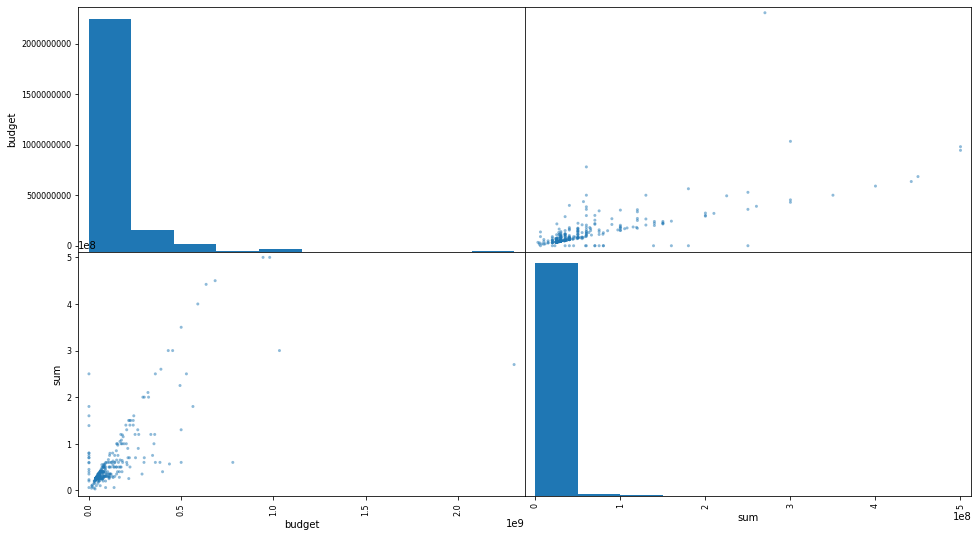

In [37]:
pd.plotting.scatter_matrix(data[['budget']].join((data['refundable_support'] + data['nonrefundable_support']).to_frame(name='sum')), figsize=(16,9))
(data['refundable_support'] + data['nonrefundable_support']).corr(data['budget'])

Корреляция между спонсорскими взносами и бюджетом фильма есть, причем эти числа обычно не равны - фонд кино платит определенный процент суммы, примерно 70% (как следует из графика). Потому заполним наши некорректные значения именно с таким коэффициентом от суммы спонсорских взносов.

In [38]:
data['budget'] = data.apply(lambda x: x['budget'] if ((x['refundable_support'] + x['nonrefundable_support']) <= x['budget']) else (x['refundable_support'] + x['nonrefundable_support'])/0.7, axis=1)

In [39]:
len(data[(data['refundable_support'] + data['nonrefundable_support']) > data['budget']])

0

Собственно, что-то большее сделать с этим столбцом возможным не представляется.

#### Столбец _financing_source_

In [40]:
print_base_info('financing_source')

источник государственного финансирования
count                       332
unique                        3
top       Министерство культуры
freq                        164
Name: financing_source, dtype: object
Уникальных значений: 3


title  pu_number  \
3618                        Ночные стражи  111012116   
3739                                 Мифы  111004317   
3565                    Притяжение (2016)  111018116   
3609                       Все о мужчинах  111012716   
3610                               Ёлки 5  111018016   
3627                              БОЛЬШОЙ  111017416   
3657                    Простая история .  111011816   
3675                             Чудо-юдо  114001817   
3686                                Молот  111011616   
3687  Урфин Джюс и его деревянные солдаты  114000817   

               show_start_date            type  \
3618 2016-07-28 12:00:00+00:00  Художественный   
3739 2017-06-07 12:00:00+00:00  Художественный   
3565 2016-12-16 12:00:00+00:00  Художественный   
3609 2016-08-17 12:00:00+00:00  Художественный   
3610 2016-12-15 12:00:00+00:00  Художественный   
3627 2016-11-22 12:00:00+00:00  Художественный   
3657 2016-07-19 12:00:00+00:00  Художественный   
3675 2017-06-27 12:00:00+00:00    Анимационный   
3686 2016-08-14 12:00:00+00:00  Художественный   
3687 2017-04-06 12:00:00+00:00    Анимационный   

                                           film_studio production_country  \
3618                                      ООО "Крылья"             Россия   
3739          ООО "ХАЙПФИЛМ", ООО "Арт Пикчерс Студия"             Россия   
3565     ООО "Водород 2011",  ООО "Арт Пикчерс Студия"             Россия   
3609              ООО "Фреш-Фильм", ООО "Энджой мувиз"             Россия   
3610                                      ООО "ТаББаК"             Россия   
3627  ЗАО "ПРОДЮСЕРСКАЯ КОМПАНИЯ ВАЛЕРИЯ ТОДОРОВСКОГО"             Россия   
3657                                    ООО "КИНОБЮРО"             Россия   
3675                                   ООО "КиноФирма"             Россия   
3686                       ООО "Русские Золотые Серии"             Россия   
3687         ООО "Студия анимационного кино "Мельница"             Россия   

                                               director  \
3618                                          Э.Веливис   
3739                                       А.Молочников   
3565                                        Ф.Бондарчук   
3609              Л.Марголин, С.Андреасян, М.Жерневский   
3610  Т.Бекмамбетов, И.Джендубаев, А.Котт, А.Шавкеро...   
3627                                      В.Тодоровский   
3657                                        В.Татарский   
3675                                          А.Лукичев   
3686                                   Эген Уулу Нурбек   
3687                    Д.Шмидт, Ф.Дмитриев, В.Торопчин   

                                               producer  \
3618                Р.Дишдишян, В.Горяинов, Л.Ярмольник   
3739  Ф.Бондарчук, Д.Рудовский, И.Стюарт, М.Османн, ...   
3565                           ООО "Арт Пикчерс Студия"   
3609  С.Андреасян, Г.Андреасян, А.Ананикян, М.Галуст...   
3610         Т.Бекмамбетов, И.Стромилова, М.Затуловская   
3627                     В.Тодоровский, А.Златопольский   
3657                                          Ю.Бахшиев   
3675                                    ООО "КиноФирма"   
3686                                         Ю.Сапронов   
3687                             С.Сельянов, А.Боярский   

                             age_restriction  refundable_support  \
3618         «12+» - для детей старше 12 лет          55000000.0   
3739         «16+» - для детей старше 16 лет          25000000.0   
3565         «12+» - для детей старше 12 лет                 0.0   
3609         «16+» - для детей старше 16 лет          10000000.0   
3610           «6+» - для детей старше 6 лет                 0.0   
3627         «12+» - для детей старше 12 лет          10000000.0   
3657         «16+» - для детей старше 16 лет                 0.0   
3675           «6+» - для детей старше 6 лет          20000000.0   
3686         «12+» - для детей старше 12 лет          55000000.0   
3687  «0+» - для любой зрительской аудит

title  pu_number  \
1281                                      Пока еще жива  111005313   
5513                                          Жили-были  111007117   
5575                                            СОФИЧКА  111007717   
5576                                Исповедь содержанки  111007817   
5600                               За гранью реальности  111010817   
5609                                          На районе  111011017   
5620                                       Несокрушимый  111011117   
5639                                    Девушка с косой  111011517   
5661  Детский юмористический киножурнал "ЕРАЛАШ", вы...  111011917   
5663                                     Со дна вершины  111012017   

               show_start_date             type  \
1281 2013-10-11 12:00:00+00:00   Художественный   
5513 2017-10-06 12:00:00+00:00   Художественный   
5575 2017-11-21 12:00:00+00:00   Художественный   
5576 2017-11-30 12:00:00+00:00   Художественный   
5600 2017-11-27 12:00:00+00:00   Художественный   
5609 2018-10-04 12:00:00+00:00   Художественный   
5620 2018-02-22 12:00:00+00:00   Художественный   
5639 2017-12-14 12:00:00+00:00   Художественный   
5661 2017-12-26 12:00:00+00:00   Художественный   
5663 2017-12-27 12:00:00+00:00   Художественный   

                                            film_studio production_country  \
1281  АНО содействия развитию кинематографии "Ангел-...             Россия   
5513         ООО Продюсерский центр "Фёдор Добронравов"             Россия   
5575  Некоммерческий фонд поддержки кинематографа "П...             Россия   
5576  ООО "Корпорация Русская Фильм Группа", ООО "Ма...             Россия   
5600                                     ООО "КИНОДАНЦ"             Россия   
5609                      ООО "КМФ" по заказу ООО "ММЕ"             Россия   
5620                           ООО "Пиманов и партнеры"             Россия   
5639                        ООО Кинокомпания "100фильм"             Россия   
5661                    ООО "Продюсерский центр ЕРАЛАШ"             Россия   
5663                ООО "Продюсерский центр "АЛЬТАИР-Ц"             Россия   

                                               director  \
1281                                         А.Атанесян   
5513                                            Э.Парри   
5575                                        К.Коваленко   
5576                                          Е.Жигаева   
5600                                     А.Богуславский   
5609                                            О.Зуева   
5620                                         К.Максимов   
5639                                           О.Попова   
5661  Е.Соколов, В.Панжев, Г.Курлаев, С.Морозов, М.С...   
5663  Я.Поляруш, Т.Цоцория, К.Кутуев при участии М.А...   

                                               producer  \
1281                   А.Атанесян, М.Бабаханов, Р.Бутко   
5513  Е.Сарычева, Ю.Воронова, М.Мамулина, Ф.Добронравов   
5575                                            Н.Янкин   
5576  ООО "Корпорация Русская Фильм Группа", ООО "Ма...   
5600                             В.Денисюк, Е.Мелентьев   
5609  Р.Дищдишян, ООО "ММЕ", ИП Козловский Д.В., ООО...   
5620                  О.Погодина, А.Пиманов, Д.Анисимов   
5639                            В.Брумберг, В.Сторожева   
5661                    ООО "Продюсерский центр ЕРАЛАШ"   
5663           Т.Цоцория, Р.Витрянюк, К.Кутуев, А.Царик   

                             age_restriction  refundable_support  \
1281         «16+» - для детей старше 16 лет                 0.0   
5513         «12+» - для детей старше 12 лет                 0.0   
5575         «16+» - для детей старше 16 лет                 0.0   
5576             «18+» - запрещено для детей                 0.0   
5600         «12+» - для детей старше 12 лет                 0.0   
5609         «16+» - для детей старше 16 лет                 0.0   
5620         «12+» - для детей старше 12 лет                 0.0   
5639         «

Количество дубликатов (уникальные значения): 7482
Количество дубликатов (все значения): 7486
Текущее число пропусков: 7154
95.56505476890194%


Судя по таблицам, этот столбец непустой только в том случае, если для фильма было предоставлено государственное финансирование. Проверим, так ли это.

In [41]:
cur_data = data[(data['refundable_support'] != 0) | (data['nonrefundable_support'] != 0)]
print_na('financing_source', cur_data)

Текущее число пропусков: 0
0.0%


In [42]:
cur_data = data[(data['refundable_support'] == 0) & (data['nonrefundable_support'] == 0)]
print_na('financing_source', cur_data)

Текущее число пропусков: 7154
100.0%


Наша гипотеза подтвердилась. В таком случае заполним все пропуски значением '-', что, как и в предыдущих столбцах, будет означать то, что источника финансирования просто нет.

In [43]:
data['financing_source'] = data['financing_source'].fillna('-')
print_na('financing_source')

Текущее число пропусков: 0
0.0%


#### Столбец _ratings_

In [44]:
print_base_info('ratings')

рейтинг фильма на КиноПоиске
count    6519.000000
mean        6.488173
std         1.114638
min         1.000000
25%         5.900000
50%         6.600000
75%         7.200000
max         9.900000
Name: ratings, dtype: float64
Уникальных значений: 84


title  pu_number  \
259                                             Прошлое  221030715   
6882                          Животные рядом со Святыми  112003719   
1341                               Сказка о добре и Вре  111008913   
1805                                           Спираль.  111001014   
6616                             ОТ ВОЙНЫ ДО НАШИХ ДНЕЙ  111026518   
6737                                     Колесо времени  111003219   
1053                                   Песочный человек  121029212   
3948                                             Круиз.  211038210   
3585  Машины Страшилки. Серия "Жутчайшая повесть о п...  114003916   
5821                                             Свинья  121007018   

               show_start_date             type  \
259  2015-07-29 12:00:00+00:00   Художественный   
6882 2019-05-03 12:00:00+00:00   Документальный   
1341 2013-11-15 12:00:00+00:00   Художественный   
1805 2014-01-30 12:00:00+00:00   Художественный   
6616 2019-01-21 12:00:00+00:00   Художественный   
6737 2019-03-01 12:00:00+00:00   Художественный   
1053 2012-11-29 12:00:00+00:00   Художественный   
3948 2010-09-03 12:00:00+00:00   Художественный   
3585 2016-12-09 12:00:00+00:00     Анимационный   
5821 2018-04-11 12:00:00+00:00   Художественный   

                                            film_studio  \
259   20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...   
6882                       ООО "Кинопрограмма "XXI век"   
1341                     НП "Студия игрового кино "Лик"   
1805                               ООО "Компания Питон"   
6616                  ИП Вайсман Анатолий Александрович   
6737                                    ООО "БестМедиа"   
1053                            Спотлайт Медиа Продакшн   
3948                ООО "ЮНАЙТЕД МУЛЬТИМЕДИА ПРОДЖЕКТС"   
3585           ООО Студия "АНИМАККОРД", АНИМАККОРД ЛТД.   
5821    Дарк Прекёрсор Продакшен, Филмиран, Хедейт Филм   

           production_country  \
259      Аргентина - Бразилия   
6882                   Россия   
1341                   Россия   
1805                   Россия   
6616                   Россия   
6737                   Россия   
1053                Швейцария   
3948                   Россия   
3585  Россия, Республика Кипр   
5821                     Иран   

                                               director  \
259                                       Эктор Бабенко   
6882                                         Т.Мирошник   
1341                                          Е.Шиляева   
1805                                           А.Волгин   
6616  А.Сазонов, Е.Климович, А.Коломеец, С.Черникова...   
6737                                         Б.Куломзин   
1053                                        Питер Луизи   
3948                                        И.Ромащенко   
3585                                         Д.Червяцов   
5821                                        Мани Хагиги   

                                               producer  \
259            Эктор Бабенко, Оскар Крамер, Хуго Сидмэн   
6882                               В.Есинов, Е.Калинина   
1341                                        К.Терещенко   
1805                                         Е.Ковалева   
6616  Д.Руюежин, Л.Пятницкая, Д.Колеров, Э.Ким, А.Хомич   
6737                                         Б.Куломзин   
1053                           Дэвид Луизи, Питер Луизи   
3948                                     Р.Атамалибеков   
3585                              Д.Ловейко, О.Кузовков   
5821                                        Мани Хагиги   

                             age_restriction  refundable_support  \
259          «16+» - для детей старше 16 лет                 0.0   
6882  «0+» - для любой зрительской аудитории                 0.0   
1341           «6+» - для детей старше 6 лет                 0.0   
1805         «12+» - для детей старше 12 лет                 0.0   
6616         «12+» - для детей старше 12 лет                 0.

title  pu_number           show_start_date  \
3515                  Взломать блогеров  111016616 2016-10-28 12:00:00+00:00   
4678                         Мантикора.  111011510 2010-12-17 12:00:00+00:00   
1535                            Кавказ.  111009413 2013-11-26 12:00:00+00:00   
4794  Приключения в тридесятом царстве.  111006610 2010-06-18 12:00:00+00:00   
4014                        Кукарача 3D  114000111 2011-03-10 12:00:00+00:00   
1025                      Большая Ржака  111003512 2012-07-23 12:00:00+00:00   
5243                       Сказка. Есть  111010611 2011-12-27 12:00:00+00:00   
1226                     Зомби каникулы  111001213 2013-03-29 12:00:00+00:00   
3374                            Дизлайк  111012516 2016-08-05 12:00:00+00:00   
1468                        Черная роза  111004014 2014-04-16 12:00:00+00:00   

                type                               film_studio  \
3515  Художественный                              ООО "ТаББаК"   
4678  Художественный         ООО "Студия спецэффектов "Ацидум"   
1535  Художественный  Юнайтед Мультимедиа Проджектс, Метрополь   
4794  Художественный                   ООО Киностудия "ЮНОСТЬ"   
4014    Анимационный         ЗАО "Продюсерский центр "Парадиз"   
1025  Художественный                        ООО "Авеста филмс"   
5243  Художественный                            ООО "Муви Про"   
1226  Художественный                  ООО Студия "Новая волна"   
3374  Художественный                               ООО "Ангел"   
1468  Художественный  ООО "Кинокомпания Царь", Hollywood Storm   

      production_country                          director  \
3515              Россия                       М.Свешников   
4678              Россия                           Вл.Китт   
1535  Азербайджан-Россия                    Фарид Гумбатов   
4794              Россия                      В.Ивановская   
4014              Россия                       А.Адилханян   
1025              Россия                      В.Москаленко   
5243              Россия  Е.Соломина, А.Баршак, К.Статский   
1226              Россия                          К.Кемниц   
3374              Россия                         П.Руминов   
1468              Россия                         А.Невский   

                               producer  \
3515                      Т.Бекмамбетов   
4678                       В.Музыченков   
1535  Рауф Атамалибеков, Фарид Гумбатов   
4794                        В.Бердочкин   
4014                         Г.Нерсисян   
1025               Р.Арзуманов, В.Малый   
5243  М.Пореченков, А.Перова, М.Королёв   
1226                         С.Торчилин   
3374             П.Руминов, И.Капитонов   
1468                          А.Невский   

                             age_restriction  refundable_support  \
3515           «6+» - для детей старше 6 лет                 0.0   
4678         «16+» - для детей старше 16 лет                 0.0   
1535         «16+» - для детей старше 16 лет                 0.0   
4794  «0+» - для любой зрительской аудитории                 0.0   
4014  «0+» - для любой зрительской аудитории                 0.0   
1025         «16+» - для детей старше 16 лет                 0.0   
5243  «0+» - для любой зрительской аудитории                 0.0   
1226             «18+» - запрещено для детей                 0.0   
3374             «18+» - запрещено для детей                 0.0   
1468         «16+» - для детей старше 16 лет                 0.0   

      nonrefundable_support      budget financing_source  ratings  \
3515             25000000.0  36016269.0        Фонд кино      1.0   
4678                    0.0         0.0                -      1.1   
1535                    0.0         0.0                -      1.1   
4794                    0.0         0.0                -      1.2   
4014                    0.0         0.0                -      1.3   
1025                    0.0         0.0                -      1.4   
5243                    0.0         0

Количество дубликатов (уникальные значения): 7401
Количество дубликатов (все значения): 7481
Текущее число пропусков: 967
12.917445899011488%


Какие незнакомые фильмы в топе рейтинга и какие легендарные (для поклонников творчества BadComedian) - в его конце! То, что фильмы незнакомы, может означать, что они либо относятся к жанру, который будет интересен только определенной группе людей (например, документальные, концерт, спорт), либо это фильм с не самым большим бюджетом, который вследствие этого плохо рекламировался и мало где был показан.

Оставим эти исследования для дальнейших пунктов, а пока подумаем над пропусками. 12% - это не так много, но просто проигнорировать их нельзя. Посмотрим на случайную выборку из этого столбца

In [45]:
data[data['ratings'].isna()].sample(20)

title  pu_number  \
2679                                 Я не оставлю тебя!  111012915   
2266                    Волшебный будильник деда Мороза  111023514   
2845                          Кольца мира. Часть первая  112000216   
1263             Mylene Farmer. Timeless 2013 the Movie  126000914   
3422                                                2+1  121033116   
2127  Свой почерк (Альманах из 6-ти короткометражных...  111002315   
6817                                     Маняшино озеро  111005219   
6344                                           Дина. Ру  112011118   
2950  Машкины Страшилки. Серия "Чудовищная правда о ...  114001116   
6407                                 Албазинские скаски  112012818   
6943                                      #Москва-Руаян  121012819   
6596                          МУЛЬТ в кино. Выпуск № 89  114000119   
2525  Короткометражные фильмы, номинированные на "Ос...  124001815   
7462                         МУЛЬТ в кино. Выпуск № 109  114004919   
5664          Маша и Медведь. Серия "Цирк, да и только"  124004317   
4737  Винченцо Беллини. Норма /По произведению Алекс...  126002010   
6049                            Красная шапочка. Онлайн  111012018   
3378                                 Все остальные вещи  111012616   
6875                                               Лапю  126001319   
1572         Земля в движении: как устроен климат Земли  126002414   

               show_start_date             type  \
2679 2015-08-12 12:00:00+00:00   Художественный   
2266 2014-12-17 12:00:00+00:00   Художественный   
2845 2016-03-22 12:00:00+00:00   Документальный   
1263 2014-03-21 12:00:00+00:00           Прочие   
3422 2016-12-21 12:00:00+00:00   Художественный   
2127 2015-03-05 12:00:00+00:00   Художественный   
6817 2019-03-23 12:00:00+00:00   Художественный   
6344 2018-11-02 12:00:00+00:00   Документальный   
2950 2016-04-25 12:00:00+00:00     Анимационный   
6407 2018-11-10 12:00:00+00:00   Документальный   
6943 2019-07-25 12:00:00+00:00   Художественный   
6596 2019-01-19 12:00:00+00:00     Анимационный   
2525 2015-04-09 12:00:00+00:00     Анимационный   
7462 2019-12-21 12:00:00+00:00     Анимационный   
5664 2017-12-25 12:00:00+00:00     Анимационный   
4737 2010-12-23 12:00:00+00:00           Прочие   
6049 2018-09-27 12:00:00+00:00   Художественный   
3378 2016-08-15 12:00:00+00:00   Художественный   
6875 2019-04-26 12:00:00+00:00           Прочие   
1572 2014-06-11 12:00:00+00:00           Прочие   

                                            film_studio  \
2679                        ИП Кузьмина Вера Викторовна   
2266                                         ООО "РУСЬ"   
2845                                АНО Студия "Остров"   
1263                                          Пате Лайв   
3422  Марс Фильм, Вандом Продюксьон, Пуасон Руж Пикч...   
2127          ООО "Продюсерская фирма Игоря Толстунова"   
6817                           ООО Кинокомпания "Мечта"   
6344                               ООО "АБ-ТВ продакшн"   
2950          ООО Студия "АНИМАККОРД" - АНИМАККОРД ЛТД.   
6407                               Фонд "Петропавловск"   
6943                                    Лева Продюксьон   
6596                                ООО "Мульт в кино"    
2525  Нэшнл Филм энд Телевизьон Шооль, Тонко Хауз, Г...   
7462                                ООО "Мульт в кино"    
5664                                    Анимаккорд Лтд.   
4737                                       Р А И Синема   
6049                                РОО ЭКЦ "Новый дар"   
3378                            Чичканов Егор Сергеевич   
6875                                   Лос Ниньёс Филмз   
1572                                        Спитц, Инк.   

                                     production_country  \
2679                                             Россия   
2266                                             Россия   
2845                                             Россия   
1263                           

Хочется заполнить пропуски средним по довольно большому числу параметром, воспользовавшись методом n ближайших соседей. Однако в текущем виде это будет не совсем корректно. У нас есть дубликаты во многих столбцах, также столбцы с информацией о режиссере и продюссере могут иметь внутри себя несколько фамилий, хотя зачастую первой фамилии достаточно (особенно если это Александр Невский). Мы вернемся к этому пункту чуть позже, когда проведем удаление дубликатов, категоризацию и добавление новых столбцов.

#### Столбец _genres_

In [46]:
print_base_info('genres')

жанр фильма
count      6510
unique      742
top       драма
freq        476
Name: genres, dtype: object
Уникальных значений: 742


title  pu_number  \
6831                                 Сверхъестественное  121006219   
5919                             Русалка. Озеро мертвых  111007618   
7445                                Вальгалла: Рагнарек  121035619   
1696  Перси Джексон и море чудовищ /По произведению ...  121019313   
1655                                             ВИЙ 3D  111010113   
1697  Перси Джексон и море чудовищ /По произведению ...  221011914   
4626  Сумерки. Сага. Затмение /По произведению Стефа...  221152710   
4393  Сумерки. Сага. Затмение /По произведению Стефа...  121011310   
4518  Сумерки. Сага. Затмение /По произведению Стефа...  221142310   
7220                                         Исцеляющая  121026119   

               show_start_date             type  \
6831 2019-04-11 12:00:00+00:00   Художественный   
5919 2018-06-07 12:00:00+00:00   Художественный   
7445 2019-12-19 12:00:00+00:00   Художественный   
1696 2013-07-19 12:00:00+00:00   Художественный   
1655 2013-12-18 12:00:00+00:00   Художественный   
1697 2014-03-27 12:00:00+00:00   Художественный   
4626 2010-12-17 12:00:00+00:00   Художественный   
4393 2010-06-25 12:00:00+00:00   Художественный   
4518 2010-12-03 12:00:00+00:00   Художественный   
7220 2019-10-10 12:00:00+00:00   Художественный   

                                            film_studio  \
6831    Оддфеллоуз Дистрибьюшен Инк., Муви Трейлер Хаус   
5919     ООО "СТГ МЕДИА" по заказу ООО "Киностудия КИТ"   
7445  Профайл Пикчерз, Нордиск Фильмс, Бейкон ОСЛ, С...   
1696  Фокс 2000 Пикчерз, Прана Анимейшн Студиос, Ти ...   
1655                         ООО "Русская Фильм Группа"   
1697  Фокс 2000 Пикчерз, Прана Анимейшн Студиос, Ти ...   
4626  Саммит Интертейнмент, Темпл Хилл Интертейнмент...   
4393  Саммит Интертейнмент, Темпл Хилл Интертейнмент...   
4518  Саммит Интертейнмент, Темпл Хилл Интертейнмент...   
7220     Кавликс Интертейнмент, Филм Грит, Ритмик Филмз   

                     production_country        director  \
6831                             Канада   Джейсон Стоун   
5919                             Россия   С.Подгаевский   
7445  Дания, Норвегия, Швеция, Исландия     Фенар Ахмад   
1696                                США  Тод Фреденталь   
1655                             Россия     О.Степченко   
1697                                США  Тод Фреденталь   
4626                                США     Дэвид Слэйд   
4393                                США     Дэвид Слэйд   
4518                                США     Дэвид Слэйд   
7220                          Австралия     Кори Пирсон   

                                               producer  \
6831          Майкл Бейкер, Крис Фергюсон, Арон Барнетт   
5919                               ООО "Киностудия КИТ"   
7445  Джейкоб Ярек, Джонни Андерсен, Кристиан Хольм-...   
1696    Майкл Бернатан, Крис Коламбус, Карен Розенфельт   
1655                                            unknown   
1697    Майкл Бернатан, Крис Коламбус, Карен Розенфельт   
4626            Билл Баннерман, Марти Бауэн, Вик Годфри   
4393            Билл Баннерман, Марти Бауэн, Вик Годфри   
4518            Билл Баннерман, Марти Бауэн, Вик Годфри   
7220                            Кори Пирсон, Эби Табоун   

                      age_restriction  refundable_support  \
6831  «16+» - для детей старше 16 лет                 0.0   
5919  «16+» - для детей старше 16 лет           8000000.0   
7445  «12+» - для детей старше 12 лет                 0.0   
1696    «6+» - для детей старше 6 лет                 0.0   
1655  «12+» - для детей старше 12 лет                 0.0   
1697    «6+» - для детей старше 6 лет                 0.0   
4626  «16+» - для детей старше 16 лет                 0.0   
4393  «16+» - для детей старше 16 лет                 0.0   
4518  «16+» - для детей старше 16 лет                 0.0   
7220  «16+» - для детей старше 16 лет                 0.0   

      nonrefundable_support      budget financing_source  ratings  \
6831                    0.

title  pu_number  \
2805                      Наруто: Кровавая тюрьма  124002715   
3529  Остров забвения: Харука и волшебное зеркало  124002116   
4375                                        Стоун  221103310   
6354                   Проза бродячих псов. Фильм  124004318   
7069                   Код Гиас: Лелуш Воскресший  124005219   
6022                               Я так не думаю  111011418   
609                                     Грабитель  121005412   
4311                                        Стоун  121018410   
6844                              Последний фильм  121007519   
7203                                       Промар  124006819   

               show_start_date             type  \
2805 2015-07-29 12:00:00+00:00     Анимационный   
3529 2016-05-25 12:00:00+00:00     Анимационный   
4375 2010-10-28 12:00:00+00:00   Художественный   
6354 2018-11-01 12:00:00+00:00     Анимационный   
7069 2019-07-18 12:00:00+00:00     Анимационный   
6022 2018-07-31 12:00:00+00:00   Художественный   
609  2012-02-27 12:00:00+00:00   Художественный   
4311 2010-10-07 12:00:00+00:00   Художественный   
6844 2019-04-09 12:00:00+00:00   Художественный   
7203 2019-09-12 12:00:00+00:00   Художественный   

                                            film_studio production_country  \
2805  Аниплекс, Бандай, Дэнтцу, Шуейша, Студия Пьеро...             Япония   
3529   Дентсу, Фуджи Телевижн Нетуорк, Продакшн Ай.Джи.             Япония   
4375  Мимран Шур Пикчерз, Холли Виерсма Продакшнз, М...                США   
6354                                           Кадокава             Япония   
7069                                            Санрайс             Япония   
6022                                          Д.Филичев             Россия   
609   Николаус Гейрхальтер Филмпродуктион, Петер Хай...   Германия-Австрия   
4311  Мимран Шур Пикчерз, Холли Виерсма Продакшнз, М...                США   
6844                      Юниверсал Пикчерз, Альта-Лайт                США   
7203   Тохо, ИксФлэг, Триггер, Санзижен Анимейшн Студио             Япония   

                 director                                          producer  \
2805      Масахико Мурата                                      Фукаши Азума   
3529         Синсуке Сато  Наото Инаба, Митсухиса Ишикава, Кацудзи Морисита   
4375          Джон Кёрран            Рене Бессон, Дэнни Димборт, Уилл Френч   
6354        Такуя Игараси                                           unknown   
7069        Танигути Горо                                           unknown   
6022           Д.Даниелян                                         Д.Филичев   
609   Беньямин Хайзенберг            Буркхард Альтофф, Николаус Гейрхальтер   
4311          Джон Кёрран            Рене Бессон, Дэнни Димборт, Уилл Френч   
6844        Деннис Хоппер                                         Пол Льюис   
7203       Хироюки Имаиси                  Хироми Вакабаяси, Кацуя Масумото   

                             age_restriction  refundable_support  \
2805         «12+» - для детей старше 12 лет                 0.0   
3529  «0+» - для любой зрительской аудитории                 0.0   
4375         «16+» - для детей старше 16 лет                 0.0   
6354             «18+» - запрещено для детей                 0.0   
7069         «16+» - для детей старше 16 лет                 0.0   
6022         «16+» - для детей старше 16 лет                 0.0   
609          «16+» - для детей старше 16 лет                 0.0   
4311         «16+» - для детей старше 16 лет                 0.0   
6844             «18+» - запрещено для детей                 0.0   
7203         «12+» - для детей старше 12 лет                 0.0   

      nonrefundable_support  budget financing_source  ratings  \
2805                    0.0     0.0                -      6.9   
3529                    0.0     0.0                -      7.0   
4375                    0.0     0.0                -      8.1   
6354                    0.0     0.0    

Количество дубликатов (уникальные значения): 6743
Количество дубликатов (все значения): 7199
Текущее число пропусков: 976
13.037670317926796%


Посмотрим на данные с пропусками

In [47]:
data[data['genres'].isna()].sample(10)

title  pu_number  \
4576                                         Злата Майя  111011110   
3969  Пипец (фильм содержит ненормативную лексику, с...  121006610   
3818                                       Голос матери  111002210   
2552                                           Везучая.  111006815   
5709                                       Это мой папа  111000618   
3562                               Королевская Академия  124005116   
6118                                          Дежурство  111014118   
6318  ПРОКУРОРЫ 4 "СВИНЦОВАЯ ОТТЕПЕЛЬ 61-ГО. ДЕЛО ВА...  112009918   
6997                                            Лукания  121015119   
7025                 Летние каникулы с Машей и Медведем  124004619   

               show_start_date             type  \
4576 2010-12-15 12:00:00+00:00   Художественный   
3969 2010-04-07 12:00:00+00:00   Художественный   
3818 2010-02-25 12:00:00+00:00   Художественный   
2552 2015-04-23 12:00:00+00:00   Художественный   
5709 2018-03-20 12:00:00+00:00   Художественный   
3562 2016-11-17 12:00:00+00:00     Анимационный   
6118 2018-08-17 12:00:00+00:00   Художественный   
6318 2018-10-13 12:00:00+00:00   Документальный   
6997 2019-06-07 12:00:00+00:00   Художественный   
7025 2019-06-30 12:00:00+00:00     Анимационный   

                                           film_studio  \
4576                 ООО "Кинокомпания "Фортуна Фильм"   
3969                    Мандате Интернэшнл, Лайонсгейт   
3818  ООО "Яуза - фильм", ООО Кинокомпания "Телефильм"   
2552                             Киностудия "Мосфильм"   
5709                                   АО "ВайТ Медиа"   
3562                                           Рэйнбоу   
6118                  ИП Фролова Наталья Александровна   
6318            ООО "Фонд национального кино "Патриот"   
6997              Фабрик Интертейнмент, Моливууд Филмз   
7025           Анимаккорд Лтд, ООО Студия "Анимаккорд"   

           production_country  \
4576                   Россия   
3969       США-Великобритания   
3818                   Россия   
2552                     СССР   
5709                   Россия   
3562                   Италия   
6118                   Россия   
6318                   Россия   
6997                   Италия   
7025  Республика Кипр, Россия   

                                               director  \
4576                       Ю.Афанасьев, Э.Архангельская   
3969                                          Мэтью Вон   
3818                                          Х.Нарлиев   
2552                                          О.Ремизов   
5709                                          Ф.Шабанов   
3562                                    Иджинио Страффи   
6118                Н.Фролова (псевдоним Камалов Ленар)   
6318                                          О.Нарлыев   
6997                                     Джиджи Рокатти   
7025  Андрей Беляев, Владислав Байрамгулов, Денис Че...   

                                               producer  \
4576                                        Н.Горяинова   
3969   Адам Боулин, Дарен Голберг, Брэд Питт, Мэтью Вон   
3818                              Н.Парамонова, Ю.Мацюк   
2552                                                  -   
5709                                         Ю.Сумачева   
3562                                          Джоэни Ли   
6118                                          Н.Фролова   
6318                                        М.Журомская   
6997  Джиованни Капальбо, Пилар Сааведра, Манфреди  ...   
7025      Олег Кузовков, Дмитрий Ловейко, Марина Ратина   

                             age_restriction  refundable_support  \
4576         «16+» - для детей старше 16 лет                 0.0   
3969             «18+» - запрещено для детей                 0.0   
3818         «12+» - для детей старше 12 лет                 0.0   
2552         «12+» - для детей старше 12 лет                 0.0   
5709         «12+» - для детей старше 12 лет                 0.0   
3562  

Есть некоторые предположения по поводу заполнения:
* в анимационных фильмах добавлять в жанр 'мультфильм'
* в анимационных фильмах из Японии добавлять в жанр 'аниме'
* в фильмах, название которых содержит слово 'концерт', добавлять жанр 'концерт'

In [48]:
def fillna_custom(row):
    cur_str = ''
    if 'аним' in row['type'].lower():
        cur_str += 'мультфильм'
        if 'япония' in row['production_country'].lower():
            cur_str += ',аниме'
    if 'концерт' in row['title'].lower() or 'concert' in row['title']:
        cur_str += ',концерт'
    if cur_str != '':
        return cur_str
    else:
        return float('nan')
    
data['genres'] = data.apply(lambda row: row['genres'] if not pd.isna(row['genres']) else fillna_custom(row), axis=1)

In [49]:
def fun():
    str = 2

print(str(1))

fun()

print(str(2))

1
2


In [50]:
print_na('genres')

Текущее число пропусков: 709
9.471012556772642%


Удалось немного уменьшить количество пропусков. Как заполнять другие? Вероятно, можно вычленить главного режиссера фильма и заполнить пропуск согласно тому стилю, который этому режиссеру наиболее свойственен. Но для этого нужно, опять-таки, добавить столбцы с дополнительными данными. Попытаемся вернуться к этому столбцу позже, а пока оставим все как есть.

#### Столбец _box_office_

In [51]:
print_base_info('box_office')

сборы в рублях
count    3.158000e+03
mean     7.647870e+07
std      2.403531e+08
min      0.000000e+00
25%      8.623900e+04
50%      2.327988e+06
75%      2.397967e+07
max      3.073569e+09
Name: box_office, dtype: float64
Уникальных значений: 2938


title  pu_number  \
7456                                              Холоп  111021719   
5653                                     Движение вверх  111011817   
6820                                    Мстители: Финал  121005519   
6549                                               Т-34  111024918   
3488  Пираты Карибского моря: Мертвецы не рассказыва...  121009217   
2859                                         Зверополис  124000316   
3755  Тайная жизнь домашних животных. Миньоны против...  124002816   
6274                                              Веном  121022018   
7216                        Малефисента: Владычица тьмы  121026219   
7258                                             Джокер  121027519   

               show_start_date             type  \
7456 2019-12-19 12:00:00+00:00   Художественный   
5653 2017-12-21 12:00:00+00:00   Художественный   
6820 2019-04-29 12:00:00+00:00   Художественный   
6549 2018-12-21 12:00:00+00:00   Художественный   
3488 2017-05-17 12:00:00+00:00   Художественный   
2859 2016-02-15 12:00:00+00:00     Анимационный   
3755 2016-07-05 12:00:00+00:00     Анимационный   
6274 2018-10-04 12:00:00+00:00   Художественный   
7216 2019-10-04 12:00:00+00:00   Художественный   
7258 2019-10-03 12:00:00+00:00   Художественный   

                                            film_studio production_country  \
7456            ООО "МЕМ-МЕДИА" по заказу АО "ВБД Груп"             Россия   
5653              ООО "Студия "ТРИТЭ" Никиты Михалкова"             Россия   
6820                                     Марвел Студиос                США   
6549  ООО "Кинокомпания МАРС-фильм" по заказу ООО "М...             Россия   
3488  Джерри Брукхаймер Филмз, Уолт Дисней Пикчерз, ...                США   
2859  Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз                США   
3755       Иллюминейшн Интертейнмент, Юниверсал Пикчерз                США   
6274  Коламбиа Пикчерз, Марвел Интертейнмент, Паскал...                США   
7216                     Рот Филмз, Уолт Дисней Пикчерз                США   
7258  Брон Студиос, Ди Си Комикс, Джоинт Эффорт, Вил...       США - Канада   

                            director  \
7456                       К.Шипенко   
5653                    А.Мегердичев   
6820         Джо Руссо, Энтони Руссо   
6549                       А.Сидоров   
3488  Йоаким Реннинг, Эспен Сандберг   
2859          Рич Мур, Байрон Ховард   
3755                       Крис Рено   
6274                   Рубен Флейшер   
7216                  Йоаким Роннинг   
7258                    Тодд Филлипс   

                                               producer  \
7456  Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...   
5653  Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...   
6820                                        Кевин Фейги   
6549  А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...   
3488                                  Джерри Брукхаймер   
2859                                      Кларк Спенсер   
3755                               Кристофер Меледандри   
6274                 Ави Арад, Эми Паскаль, Мэтт Толмак   
7216         Анджелина Джоли, Джо Рот, Дункан Хендерсон   
7258  Брэдли Купер, Эмма Тиллинджер Коскофф, Тодд Фи...   

                      age_restriction  refundable_support  \
7456  «12+» - для детей старше 12 лет          25000000.0   
5653    «6+» - для детей старше 6 лет                 0.0   
6820  «16+» - для детей старше 16 лет                 0.0   
6549  «12+» - для детей старше 12 лет          60000000.0   
3488  «16+» - для детей старше 16 лет                 0.0   
2859    «6+» - для детей старше 6 лет                 0.0   
3755    «6+» - для детей старше 6 лет                 0.0   
6274  «16+» - для детей старше 16 лет                 0.0   
7216    «6+» - для детей старше 6 лет                 0.0   
7258      «18+» - запрещено для детей                 0.0   

      nonrefundable_support       budget financing_source  ratings  \
7456             35000000

title  pu_number  \
1782                          Анжелика, маркиза ангелов  121031913   
933                                        Летние войны  124002812   
914     В тумане /По одноименной повести Василя Быкова/  121027712   
1126                                            Марафон  111006712   
2219                       Прогулка по солнечному свету  121011614   
2078                 Курбан-роман. (История с жертвой).  111009614   
237                                            Подранки  111007613   
1387  Экзамен для двоих /По роману Джин Ханфф Корелитц/  121014613   
2685                                    ПУСТЬ ТАК БУДЕТ  111009815   
3994                              Стать Джоном Ленноном  121008610   

               show_start_date            type  \
1782 2013-12-12 12:00:00+00:00  Художественный   
933  2012-10-25 12:00:00+00:00    Анимационный   
914  2012-11-07 12:00:00+00:00  Художественный   
1126 2012-12-18 12:00:00+00:00  Художественный   
2219 2014-06-11 12:00:00+00:00  Художественный   
2078 2014-09-02 12:00:00+00:00  Художественный   
237  2013-10-18 12:00:00+00:00  Художественный   
1387 2013-06-11 12:00:00+00:00  Художественный   
2685 2015-06-01 12:00:00+00:00  Художественный   
3994 2010-05-05 12:00:00+00:00  Художественный   

                                            film_studio  \
1782                  Европа Корп., МонаФилм, ВилмаФилм   
933   Медхауз, Ниппон Телевижн Нетуорк Корпорейшн, К...   
914   Ма Йа Де Фикшн, Лемминг Филм, Беларусьфильм, Д...   
1126                            ООО "Синема Арт Студио"   
2219                         Вертиго Филмз, АйЭм Глобал   
2078                                   ФОНД "ИННОВАЦИЯ"   
237                               Киностудия "Мосфильм"   
1387                                       Депф оф Филд   
2685                ООО ПРОДЮСЕРСКАЯ КОМПАНИЯ "ДЕРЖАВА"   
3994  Авер Медиа, Экосси Филмз, Филм 4, Норс Вест Ви...   

                                     production_country  \
1782                                            Франция   
933                                              Япония   
914   Германия - Нидерланды - Беларусь - Россия - Ла...   
1126                                             Россия   
2219                                     Великобритания   
2078                                             Россия   
237                                                СССР   
1387                                                США   
2685                                             Россия   
3994                              Канада-Великобритания   

                        director  \
1782               Ариэль Зейтун   
933                Мамору Хосода   
914               Сергей Лозница   
1126                  К.Оганесян   
2219  Макс Джива, Дания Пасквини   
2078                     С.Юзеев   
237                    Н.Губенко   
1387                    Пол Вайц   
2685                О.Смольников   
3994              Сэм Тейлор Вуд   

                                               producer  \
1782        Эммануэль Жаклин, Павел Солк, Филипп Херинг   
933   Такафуми Ватанабэ, Такуя Ито, Сэйдзи Окуда, Юи...   
914                                        Хайно Декерт   
1126                                         К.Оганесян   
2219       Кэролайн Леви, Эллан Нибло, Джеймс Ричардсон   
2078                                         М.Галицкая   
237                                                   -   
1387              Пол Вайц, Керри Кохански, Эндрю Миано   
2685  К.Лавров, Ю.Потапова, В.Бутер, С.Прудников, С....   
3994         Роберт Бернштейн, Кевин Лоудер, Дуглас Рэй   

                      age_restriction  refundable_support  \
1782  «16+» - для детей старше 16 лет                 0.0   
933   «12+» - для детей старше 12 лет                 0.0   
914   «12+» - для детей старше 12 лет                 0.0   
1126  «16+» - для детей старше 16 лет                 0.0   
2219  «12+» - для детей старше 12 лет                 0.0   
2078  «12+» - д

Количество дубликатов (уникальные значения): 4547
Количество дубликатов (все значения): 4637
Текущее число пропусков: 4328
57.81458722949506%


Этот столбец - из второй таблицы. Данные для пропусков в нем также можно получить из метода n ближайших соседей, поэтому оставим заполнение пропусков в нем напотом.

### Поиск дубликатов

Еще при просмотре столбцов на предмет заполнения пропусков были обнаружены дубликаты в некоторых столбцах. Избавимся от них.

#### Столбец _type_

In [52]:
data['type'].value_counts()

Художественный                4520
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

Как видим, есть дубликаты. Заменим их.

In [53]:
data['type'] = data['type'].str.strip().astype("category")
data['type'].value_counts()

Художественный                5909
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

#### Столбец _film_studio_

In [54]:
data['film_studio'].value_counts().head(50)

Киностудия "Мосфильм"                                                               341
ООО "Мульт в кино"                                                                   57
Анимаккорд Лтд                                                                       23
ООО "Мульт в кино"                                                                   18
unknown                                                                              18
ФГУП "ТПО "Киностудия "Союзмультфильм"                                               16
ООО "ТаББаК"                                                                         15
Р А И Синема                                                                         14
Опус Арте                                                                            14
ООО "Студия анимационного кино "Мельница"                                            14
ООО "Кинокомпания "СТВ"                                                              13
Пиксар Анимейшн Студиос, Уолт Ди

Попробуем сделать некоторые базовые преобразования

In [55]:
data['film_studio'] = data['film_studio'].str.upper()
data['film_studio'] = data['film_studio'].str.replace('\"|\'', ' ')
data['film_studio'] = data['film_studio'].str.replace('\.', ' ')
data['film_studio'] = data['film_studio'].str.replace('-', ' ')
data['film_studio'] = data['film_studio'].str.replace('ПРИ УЧАСТИИ|ПО ЗАКАЗУ', ',')
data['film_studio'] = data['film_studio'].str.replace('\/', ',')
data['film_studio'] = data['film_studio'].str.replace('\\', ',')
data['film_studio'] = data['film_studio'].str.replace('OOO|ООО|ОАО|ЗАО|ИП|АО|LTD|ЛТД|ФГУП|ТПО|ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ|ИНДИВИДУАЛЬНЫЙ ПРЕДПРИНИМАТЕЛЬ|АНО', ' ')
data['film_studio'] = data['film_studio'].str.replace('КИНОСТУДИЯ|КИНОКОМПАНИЯ|КИНОКОНЦЕРН|КИНО СТУДИЯ|КИНО КОНЦЕРН|ПРОДЮСЕРСКИЙ ЦЕНТР', ' ')
data['film_studio'] = data['film_studio'].str.replace('ЭР ', 'Р ')
data['film_studio'] = data['film_studio'].str.replace('ВАРНЕР ', 'УОРНЕР ')
#data['film_studio'] = data['film_studio'].str.replace(' ПИКЧЕРЗ| МЕДИАЗ| МЕДИА| СИНЕМАЗ| СИНЕМА| АНИМЕЙШЗ| АНИМЕЙШН| ФИЛМЗ| ФИЛЬМ| ФИЛМ| ИНТЕРТЕЙНМЕНТ| МУВИЗ| МУВИ| ИНТЕРНЭШНЛ| КОМПАНИ| ЭНТЕРПРАЙЗИС| ИНТЕРТЭЙНМЕНТ| ИНТЕРТЕЙМЕНТ| ЭНТЕРТЭЙНМЕНТ| ПРОДАКШНЗ| ПРОДАКШН| СТУДИОС| СТУДИО| СТУДИЯ АНИМАЦИОННОГО КИНО| СТУДИЯ| СТУДИЯ КИНО', ' ')
data['film_studio'] = data['film_studio'].str.replace(',,|,,,|,,,,', ',')
data['film_studio'] = data['film_studio'].str.replace(' , | ,|, ', ',')
data['film_studio'] = data['film_studio'].str.replace('  |   |    ', ' ')
data['film_studio'] = data['film_studio'].str.strip()
data['film_studio'].value_counts().head(20)

МОСФИЛЬМ                                             350
МУЛЬТ В КИНО                                          75
АНИМАККОРД                                            27
Р А И СИНЕМА                                          24
ТАББАК                                                18
UNKNOWN                                               18
СОЮЗМУЛЬТФИЛЬМ                                        17
ЛЕНФИЛЬМ                                              16
ЕРАЛАШ                                                16
СТУДИЯ АНИМАЦИОННОГО КИНО МЕЛЬНИЦА                    14
ОПУС АРТЕ                                             14
АЭРОПЛАН                                              14
СТВ                                                   13
ПИКСАР АНИМЕЙШН СТУДИОС,УОЛТ ДИСНЕЙ ПИКЧЕРЗ           13
ДРИМУОРКС АНИМЕЙШН                                    11
ЭНДЖОЙ МУВИЗ                                          11
УОЛТ ДИСНЕЙ ПИКЧЕРЗ                                   11
САНКТ ПЕТЕРБУРГСКАЯ СТУДИЯ ДОКУ

Посмотрим на общий список, составленный из объединения киностудий, работавших над всеми фильмами

In [56]:
def create_all_dict(col):
    studio_set = defaultdict(int)
    for studios in data[col]:
        if pd.isna(studios):
            continue
        for studio in studios.split(','):
            if studio.strip() == '':
                continue
            studio_set[studio.strip()] += 1
    return {k: v for k, v in sorted(studio_set.items(), reverse=True, key=lambda item: item[1])}

all_studios_sorted = create_all_dict('film_studio')

In [57]:
print(len(all_studios_sorted))
all_studios_sorted

10471


{'УОРНЕР БРАЗЕРС': 430,
 'МОСФИЛЬМ': 388,
 'КАНАЛ +': 245,
 'ЮНИВЕРСАЛ ПИКЧЕРЗ': 244,
 'СИНЕ +': 149,
 'ХХ ВЕК ФОКС': 142,
 'ПАРАМАУНТ ПИКЧЕРЗ': 127,
 'НЬЮ ЛАЙН СИНЕМА': 116,
 'КОЛАМБИА ПИКЧЕРЗ': 112,
 'УОЛТ ДИСНЕЙ ПИКЧЕРЗ': 100,
 'ФРАНС ТЕЛЕВИЗЬОН': 95,
 'ФРАНС 2 СИНЕМА': 89,
 'НАЦИОНАЛЬНЫЙ ЦЕНТР КИНЕМАТОГРАФИИ': 82,
 'МУЛЬТ В КИНО': 75,
 'СТУДИО КАНАЛ': 68,
 'ФРАНС 3 СИНЕМА': 60,
 'ГОМОН': 59,
 'МЕТРО ГОЛДВИН МАЙЕР': 58,
 'ВИЛЛИДЖ РОАДШОУ ПИКЧЕРЗ': 58,
 'САММИТ ИНТЕРТЕЙНМЕНТ': 53,
 'СТУДИЯ АНИМАЦИОННОГО КИНО МЕЛЬНИЦА': 45,
 'ТАЧСТОУН ПИКЧЕРЗ': 44,
 'МИЛЛЕНИУМ ФИЛМЗ': 42,
 'РИЛЕЙТИВИТИ МЕДИА': 41,
 'УАЛД БАНЧ': 41,
 'ЛЕДЖЕНДАРИ ПИКЧЕРЗ': 41,
 'ОРИДЖИНАЛ ФИЛМ': 38,
 'БИ БИ СИ': 38,
 'Р А И СИНЕМА': 37,
 'ПАТЭ': 37,
 'АНИМАККОРД': 37,
 'СКОУП ПИКЧЕРЗ': 35,
 'МИРАМАКС': 34,
 'СКОТТ ФРИ ПРОДАКШНЗ': 32,
 'КАНАЛ+': 32,
 'УАЙЛД БАНЧ': 32,
 'РЕЛАТИВИТИ МЕДИА': 32,
 'ИЛЬ ДЕ ФРАНС': 32,
 'ПАРОВОЗ': 32,
 'ФИЛМ И ВАСТ': 31,
 'ТФ1 ФИЛЬМ ПРОДЮКСЬОН': 30,
 'АЭРОПЛАН': 30,
 'УОРКИНГ ТАЙТЛ ФИЛМЗ': 29,

Весьма занимательный список, который, однако, для решения наших задач мало полезен - удалять дубликаты из него займет целую вечность. Вместо этого создадим столбец, который будет содержать киностудию, которая в списке киностудий указана первой (будем надеяться, что заполняли таблицу с учетом здравого смысла).

In [58]:
data['film_studio_main'] = data['film_studio'].str.split(',').str[0].str.strip().astype("category")
data['film_studio_main'].value_counts().head(30)

МОСФИЛЬМ                              383
УОРНЕР БРАЗЕРС                        241
ЮНИВЕРСАЛ ПИКЧЕРЗ                     162
КОЛАМБИА ПИКЧЕРЗ                       87
МУЛЬТ В КИНО                           75
ПАРАМАУНТ ПИКЧЕРЗ                      71
ХХ ВЕК ФОКС                            60
НЬЮ ЛАЙН СИНЕМА                        54
УОЛТ ДИСНЕЙ ПИКЧЕРЗ                    45
АНИМАККОРД                             34
СТУДИЯ АНИМАЦИОННОГО КИНО МЕЛЬНИЦА     34
ГОМОН                                  31
САММИТ ИНТЕРТЕЙНМЕНТ                   30
Р А И СИНЕМА                           26
ТАББАК                                 25
ДРИМУОРКС АНИМЕЙШН                     24
БИ БИ СИ                               23
ТАЧСТОУН ПИКЧЕРЗ                       22
МИЛЛЕНИУМ ФИЛМЗ                        20
СТВ                                    18
UNKNOWN                                18
ЛЕНФИЛЬМ                               18
МЕТРО ГОЛДВИН МАЙЕР                    18
СОЮЗМУЛЬТФИЛЬМ                    

По-прежнему огромное количество студий. Текущей обработки явно недостаточно, чтобы удалить все дубликаты (например, присутствующий в топе Ералаш явно не является студией, а является киножурналом, снимающимся на центральной киностудии детских и юношеских фильмов имени Максима Горького), однако достаточно для того, чтобы посмотреть на статистику студий, которые выпускают наибольшее количество фильмов.

#### Столбец _production_country_

In [59]:
data['production_country'].value_counts()

США                                                                    2172
Россия                                                                 1821
СССР                                                                    347
Франция                                                                 301
Великобритания                                                          257
                                                                       ... 
Аргентина - Мексика - Бразилия - Франция - США                            1
Швеция - США                                                              1
Франция - Германия - Турция - Катар                                       1
Франция-Китай                                                             1
Дания - Канада - Швеция - Франция - Германия - Великобритания - США       1
Name: production_country, Length: 949, dtype: int64

Данные явно нуждаются в обработке, схожей с той, которую мы делали в предыдущем пункте

In [60]:
data['production_country'] = data['production_country'].str.upper()

# с одной стороны - есть гении, заполнившие этот стлбец через дефис без пробелов (в духе СССР-США-ФРАНЦИЯ), 
# с другой - мы огорчаем страну Пуэрто-Рико:(
data['production_country'] = data['production_country'].str.replace(' - |-', ',')

data['production_country'] = data['production_country'].str.replace('ПРИ УЧАСТИИ|ПО ЗАКАЗУ', ',')
data['production_country'] = data['production_country'].str.replace('Ё', 'Е')
data['production_country'] = data['production_country'].str.replace('\/', ',')
data['production_country'] = data['production_country'].str.replace('\\', ',')
data['production_country'] = data['production_country'].str.replace('СЩА', 'США')
data['production_country'] = data['production_country'].str.replace('ГОЛЛАНДИЯ', 'НИДЕРЛАНДЫ')
data['production_country'] = data['production_country'].str.replace('К;АНАДА', 'КАНАДА')
data['production_country'] = data['production_country'].str.replace('ЧЕШСКАЯ', 'ЧЕХИЯ')
data['production_country'] = data['production_country'].str.replace('ФРАЦИЯ', 'ФРАНЦИЯ')
data['production_country'] = data['production_country'].str.replace('ИЗРИЛЬ', 'ИЗРАИЛЬ')
data['production_country'] = data['production_country'].str.replace('CША', 'США')
data['production_country'] = data['production_country'].str.replace('ОБЪЕДИНЕННЫЕ АРАБСКИЕ ЭМИРАТЫ', 'ОАЭ')

# с уважением к соседям
data['production_country'] = data['production_country'].str.replace('БЕЛОРУССИЯ', 'БЕЛАРУСЬ')
data['production_country'] = data['production_country'].str.replace('ВНР', 'ВЕНГРИЯ')
data['production_country'] = data['production_country'].str.replace('Н.ЗЕЛАНДИЯ', 'НОВАЯ ЗЕЛАНДИЯ')
data['production_country'] = data['production_country'].str.replace('ГЕРМАНЯ', 'ГЕРМАНИЯ')
data['production_country'] = data['production_country'].str.replace('БЕНЛЬГИЯ', 'БЕЛЬГИЯ')
data['production_country'] = data['production_country'].str.replace('ПОРРТУГАЛИЯ', 'ПОРТУГАЛИЯ')
data['production_country'] = data['production_country'].str.replace('НОРВЕНИЯ', 'НОРВЕГИЯ')
data['production_country'] = data['production_country'].str.replace('ШРИ,ЛАНКА', 'ШРИ-ЛАНКА')
data['production_country'] = data['production_country'].str.replace('АНГЛИЯ', 'ВЕЛИКОБРИТАНИЯ')
data['production_country'] = data['production_country'].str.replace('ЧССР', 'ЧЕХОСЛОВАКИЯ')
data['production_country'] = data['production_country'].str.replace('ПУЭРТО РИКО', 'ПУЭРТО-РИКО')
data['production_country'] = data['production_country'].str.replace('ПУЭРТО,РИКО', 'ПУЭРТО-РИКО')
data['production_country'] = data['production_country'].str.replace('ЗАПАДНЫЙ БЕРЛИН', 'ФРГ')
data['production_country'] = data['production_country'].str.replace('Ю.КОРЕЯ', 'ЮЖНАЯ КОРЕЯ')

# у просто Кореи 6 фильмов, я проверил - все из Южной Кореи
data['production_country'] = data['production_country'].str.replace('КОРЕЯ', 'ЮЖНАЯ КОРЕЯ')
data['production_country'] = data['production_country'].str.replace('ЮЖНАЯ ЮЖНАЯ', 'ЮЖНАЯ')
data['production_country'] = data['production_country'].str.replace('2019', 'ГЕРМАНИЯ')
data['production_country'] = data['production_country'].str.replace('ПНР', 'ПОЛЬША')
data['production_country'] = data['production_country'].str.replace('КНР', 'КИТАЙ')


data['production_country'] = data['production_country'].str.replace('РЕСПУБЛИКА', ' ')
data['production_country'] = data['production_country'].str.replace(',,|,,,|,,,,', ',')
data['production_country'] = data['production_country'].str.replace(' , | ,|, ', ',')
data['production_country'] = data['production_country'].str.replace('  |   |    ', ' ')
data['production_country'] = data['production_country'].str.strip()

In [61]:
data['production_country'].value_counts()

США                                                        2177
РОССИЯ                                                     1821
СССР                                                        377
ФРАНЦИЯ                                                     302
ВЕЛИКОБРИТАНИЯ                                              259
                                                           ... 
БРАЗИЛИЯ,ГЕРМАНИЯ,ПОРТУГАЛИЯ,ФРАНЦИЯ                          1
ИСПАНИЯ,КАНАДА,ЯПОНИЯ                                         1
США,НИДЕРЛАНДЫ,ФИНЛЯНДИЯ,ВЕЛИКОБРИТАНИЯ,ИТАЛИЯ                1
ШВЕЦИЯ,КУБА                                                   1
ДАНИЯ,КАНАДА,ШВЕЦИЯ,ФРАНЦИЯ,ГЕРМАНИЯ,ВЕЛИКОБРИТАНИЯ,США       1
Name: production_country, Length: 789, dtype: int64

In [62]:
all_countries_sorted = create_all_dict('production_country')
print(len(all_countries_sorted))
all_countries_sorted

104


{'США': 3057,
 'РОССИЯ': 1986,
 'ФРАНЦИЯ': 883,
 'ВЕЛИКОБРИТАНИЯ': 759,
 'ГЕРМАНИЯ': 444,
 'СССР': 408,
 'КАНАДА': 270,
 'ИТАЛИЯ': 251,
 'БЕЛЬГИЯ': 196,
 'ИСПАНИЯ': 195,
 'АВСТРАЛИЯ': 149,
 'КИТАЙ': 123,
 'ЯПОНИЯ': 119,
 'ДАНИЯ': 90,
 'ШВЕЦИЯ': 82,
 'КИПР': 73,
 'ИРЛАНДИЯ': 67,
 'НИДЕРЛАНДЫ': 67,
 'НОРВЕГИЯ': 59,
 'ИНДИЯ': 56,
 'ЮЖНАЯ КОРЕЯ': 55,
 'ШВЕЙЦАРИЯ': 48,
 'АВСТРИЯ': 43,
 'МЕКСИКА': 40,
 'ЛЮКСЕМБУРГ': 39,
 'АРГЕНТИНА': 38,
 'ПОЛЬША': 36,
 'УКРАИНА': 35,
 'ФИНЛЯНДИЯ': 34,
 'НОВАЯ ЗЕЛАНДИЯ': 33,
 'ГОНКОНГ': 33,
 'БРАЗИЛИЯ': 26,
 'ВЕНГРИЯ': 25,
 'ИЗРАИЛЬ': 23,
 'ЧЕХИЯ': 22,
 'ЮАР': 19,
 'КАЗАХСТАН': 15,
 'АРМЕНИЯ': 15,
 'ГРУЗИЯ': 14,
 'ИРАН': 14,
 'БЕЛАРУСЬ': 14,
 'РУМЫНИЯ': 14,
 'ЧИЛИ': 13,
 'ИСЛАНДИЯ': 13,
 'ТАИЛАНД': 12,
 'ТУРЦИЯ': 11,
 'ОАЭ': 11,
 'ЛАТВИЯ': 11,
 'КОЛУМБИЯ': 11,
 'ПОРТУГАЛИЯ': 10,
 'ЭСТОНИЯ': 10,
 'БОЛГАРИЯ': 9,
 'ГДР': 8,
 'ГРЕЦИЯ': 8,
 'ХОРВАТИЯ': 8,
 'МАЛАЙЗИЯ': 8,
 'ИНДОНЕЗИЯ': 7,
 'СЕРБИЯ': 7,
 'УРУГВАЙ': 7,
 'СИНГАПУР': 6,
 'ФРГ': 5,
 'ПУЭРТО-РИКО': 5,
 

В этот раз данных не так много, как в прошлый раз, посему нам удалось устранить все дубликаты в этом столбце. Аналогично предыдущему пункту, заведем столбец, который будет содержать первую в столбце со странами страну (предположим, что ее не просто так указали первой и она главная в этом списке)

In [63]:
data['production_country_main'] = data['production_country'].apply(lambda x: str(x).split(',')[0].strip()).astype("category")
data['production_country_main'].value_counts()

США               2755
РОССИЯ            1912
ФРАНЦИЯ            535
ВЕЛИКОБРИТАНИЯ     443
СССР               408
                  ... 
УЗБЕКИСТАН           1
ОАЭ                  1
ПАКИСТАН             1
ПАРАГВАЙ             1
ЛИВАН                1
Name: production_country_main, Length: 76, dtype: int64

Вряд ли нам понадобятся все эти данные, но для анализа самых производительных стран данных точно хватит.

#### Столбец _director_

In [64]:
data['director'].value_counts().head(50)

О.Семёнова            47
Стивен Содерберг      17
Д.Червяцов            17
Ридли Скотт           16
Тиль Швайгер          14
Вуди Аллен            13
Питер Джексон         13
Клинт Иствуд          13
О.Семёнова            12
Дэвид Финчер          12
Кевин Смит            12
Люк Бессон            12
Стивен Спилберг       12
Кристофер Нолан       11
П.Смирнов             11
Гай Ричи              11
Саймон Уэст           11
Тьерри Гиллиам        10
Роберт Земекис        10
Джеймс Ван            10
Роберт Швентке        10
Л.Гайдай              10
Николас Столлер       10
С.Андреасян           10
Франсуа Озон           9
Дэвид Йейтс            9
Питер Берг             9
unknown                9
Тодд Филлипс           9
Д.Дьяченко             8
Пол Вайц               8
Джастин Лин            8
Том Хупер              8
Георгий Орлов          8
Н.Михалков             8
Мартин Скорсезе        8
Джонатан Либесман      8
Роб Райнер             8
Квентин Тарантино      8
Пол Гринграсс          8


В этом столбце проблемы те же, что и в предыдущих двух, но есть и дополнительная - сокращения имени и отчества. Попробуем привести всех режиссеров к такому виду.

In [65]:
def clear_director_data(col):
    data[col] = data[col].str.upper()
    data[col] = data[col].str.replace(' - | -|- ', ',')
    data[col] = data[col].str.replace('\"|\'', '')
    data[col] = data[col].str.replace('И ДРУГИЕ|И ДР', '')
    data[col] = data[col].str.replace('\/', ',')
    data[col] = data[col].str.replace('\\', ',')
    data[col] = data[col].str.replace(',,|,,,|,,,,', ',')
    data[col] = data[col].str.replace('\.', ' ')
    data[col] = data[col].str.replace(' , | ,|, ', ',')
    data[col] = data[col].str.replace('    |   |  ', ' ')
    data[col] = data[col].str.strip()

def base_clean(col):
    data[col] = data[col].str.upper()
    data[col] = data[col].str.replace('\"|\'', '')
    data[col] = data[col].str.replace(' , | ,|, ', ',')
    data[col] = data[col].str.replace(',,|,,,|,,,,', ',')
    data[col] = data[col].str.replace('    |   |  ', ' ')
    data[col] = data[col].str.strip()
    
clear_director_data('director')

In [66]:
def clear_dir_column(col):
    for i in range(len(data[col])):
        directors = data.loc[i, col]

        #через запятую указаны разные режиссеры
        director_splitted = directors.split(',')
        director_splitted_correct = []
        for director in director_splitted:

            #через точку или пробел указаны имя, фамилия, отчество режиссера
            director_name = director.split(' ')

            # если всего один элемент - значит, указана только фамилия, ее оставляем без изменения
            if len(director_name) == 1:
                director_splitted_correct.append(director_name[0])
                continue

            #если элементов несколько - значит, все, кроме фамилии (которая последняя) сокращаем до одной буквы и точки
            else:
                director_name_correct = []
                for part in director_name[:-1]:
                    if part == '':
                        continue
                    try:
                        director_name_correct.append(part[0] + '.')
                    except:
                        print('Error!', 'i =', i, col + ' =', directors)
                director_name_correct.append(director_name[-1])
                director_splitted_correct.append(''.join(director_name_correct))

        data[col].at[i] = ','.join(director_splitted_correct)
        
clear_dir_column('director')

In [67]:
data['director'].value_counts().head(30)

О.СЕМЁНОВА      63
Д.ЧЕРВЯЦОВ      18
С.СОДЕРБЕРГ     17
Р.СКОТТ         16
С.УАЙТ          15
Т.ШВАЙГЕР       14
П.ДЖЕКСОН       13
В.АЛЛЕН         13
К.ИСТВУД        13
С.СПИЛБЕРГ      12
М.Н.ШЬЯМАЛАН    12
К.СМИТ          12
Л.БЕССОН        12
Д.ФИНЧЕР        12
С.АНДРЕАСЯН     11
Г.РИЧИ          11
П.СМИРНОВ       11
С.УЭСТ          11
К.НОЛАН         11
Р.ШВЕНТКЕ       10
Р.ЗЕМЕКИС       10
Н.СТОЛЛЕР       10
Л.ГАЙДАЙ        10
Т.ГИЛЛИАМ       10
Д.ВАН           10
З.СНАЙДЕР        9
Д.ЙЕЙТС          9
Т.ФИЛЛИПС        9
Ф.ОЗОН           9
И.СТРАФФИ        9
Name: director, dtype: int64

In [68]:
all_directors_sorted = create_all_dict('director')
print(len(all_directors_sorted))
all_directors_sorted

5502


{'О.СЕМЁНОВА': 63,
 'А.МИРОНОВ': 28,
 'Д.ЧЕРВЯЦОВ': 22,
 'Е.САЛАБАЙ': 21,
 'С.СОДЕРБЕРГ': 17,
 'Р.СКОТТ': 16,
 'Т.ШВАЙГЕР': 15,
 'С.УАЙТ': 15,
 'С.АНДРЕАСЯН': 14,
 'К.ИСТВУД': 13,
 'К.СМИТ': 13,
 'П.ДЖЕКСОН': 13,
 'В.ПАНЖЕВ': 13,
 'В.АЛЛЕН': 13,
 'Е.ГОЛОВИН': 13,
 'Т.БЕКМАМБЕТОВ': 12,
 'Л.ГАЙДАЙ': 12,
 'Д.ФИНЧЕР': 12,
 'С.СПИЛБЕРГ': 12,
 'Л.БЕССОН': 12,
 'К.РЕНО': 12,
 'Г.КУРЛАЕВ': 12,
 'М.Н.ШЬЯМАЛАН': 12,
 'А.КОТТ': 12,
 'Г.РИЧИ': 11,
 'К.НОЛАН': 11,
 'С.УЭСТ': 11,
 'Н.СТОЛЛЕР': 11,
 'Р.РОДРИГЕС': 11,
 'Р.ВЕРЕЩАК': 11,
 'П.СМИРНОВ': 11,
 'С.МОРОЗОВ': 10,
 'Р.ЗЕМЕКИС': 10,
 'Д.КОЭН': 10,
 'Р.ШВЕНТКЕ': 10,
 'Т.ГИЛЛИАМ': 10,
 'Г.ОРЛОВ': 10,
 'Д.ВАН': 10,
 'В.ПОНОМАРЁВ': 10,
 'Е.ЧЕРНОВА': 10,
 'В.БАЙРАМГУЛОВ': 10,
 'А.БЕЛЯЕВ': 10,
 'П.БЕРГ': 9,
 'Г.МАРШАЛЛ': 9,
 'Д.ЙЕЙТС': 9,
 'Ф.ОЗОН': 9,
 'Д.ЛУКАС': 9,
 'Р.ДАВЛЕТЬЯРОВ': 9,
 'Т.ХУПЕР': 9,
 'UNKNOWN': 9,
 'И.СТРАФФИ': 9,
 'Т.ФИЛЛИПС': 9,
 'К.ТАРАНТИНО': 9,
 'Е.БАРАНОВ': 9,
 'И.КОЭН': 9,
 'Д.ДЬЯЧЕНКО': 9,
 'З.СНАЙДЕР': 9,
 'Г.ДАНЕЛИЯ': 8,


Добавим столбец с главным режиссером

In [69]:
data['director_main'] = data['director'].apply(lambda x: x.split(',')[0].strip()).astype("category")
data['director_main'].value_counts()

О.СЕМЁНОВА     63
Д.ЧЕРВЯЦОВ     18
С.СОДЕРБЕРГ    17
Р.СКОТТ        16
С.УАЙТ         15
               ..
Л.ДИОГО         1
Л.ДОНТ          1
Л.ДЭЙЛИ         1
Л.ДЭНИЕЛС       1
Я.ЧОПРА         1
Name: director_main, Length: 4426, dtype: int64

#### Столбец _producer_

In [70]:
data['producer'].value_counts().head(50)

-                                                394
unknown                                          174
П.Смирнов                                         67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина     28
С.Сельянов                                        18
Д.Ловейко, О.Кузовков                             17
Кевин Фейги                                       11
Тони Майерс                                       11
А.Тельнов                                         11
Джерри Брукхаймер                                 11
ООО "Продюсерский центр ЕРАЛАШ"                   10
С.Говорухин, Е.Маскина                             9
Н.Мокрицкая                                        9
С.Сельянов, А.Боярский                             9
Э.Пичугин                                          9
Фил Грабски                                        8
Б.Машковцев, С.Струсовский                         8
Тиль Швайгер                                       8
ООО "Стар Медиа Дистрибьюшн"                  

С этим столбцом нужно сделать ровно то же самое, что и со столбцом _director_

In [71]:
clear_director_data('producer')
clear_dir_column('producer')

In [72]:
data['producer'].value_counts().head(30)

-                                394
UNKNOWN                          174
П.СМИРНОВ                         69
О.КУЗОВКОВ,Д.ЛОВЕЙКО,М.РАТИНА     28
С.СЕЛЬЯНОВ                        18
Д.ЛОВЕЙКО,О.КУЗОВКОВ              17
А.ТЕЛЬНОВ                         12
К.ФЕЙГИ                           12
Д.БРУКХАЙМЕР                      11
Т.МАЙЕРС                          11
О.П.Ц.ЕРАЛАШ                      10
Д.БАРРОН,Д.ХЕЙМАН                  9
С.СЕЛЬЯНОВ,А.БОЯРСКИЙ              9
Ф.К.МОСФИЛЬМ                       9
Д.ХЕЙМАН                           9
Э.ПИЧУГИН                          9
Н.МОКРИЦКАЯ                        9
С.ГОВОРУХИН,Е.МАСКИНА              9
Т.ШВАЙГЕР                          8
Ф.ГРАБСКИ                          8
И.ГЕЛАШВИЛИ                        8
А.ГЕРАСИМОВ                        8
О.С.М.ДИСТРИБЬЮШН                  8
Б.МАШКОВЦЕВ,С.СТРУСОВСКИЙ          8
Г.ВАСИЛЬЕВ,М.МЭННИС,И.ПОПОВ        8
Д.БЛУМ,М.БЭЙ,Э.ФОРМ                7
Д.ЛОВЕЙКО                          7
Д

In [73]:
all_producers_sorted = create_all_dict('producer')
print(len(all_producers_sorted))
all_producers_sorted

8613


{'-': 394,
 'UNKNOWN': 174,
 'С.СЕЛЬЯНОВ': 82,
 'П.СМИРНОВ': 70,
 'Д.ЛОВЕЙКО': 66,
 'Д.БЛУМ': 58,
 'О.КУЗОВКОВ': 52,
 'И.ПОПОВ': 47,
 'А.ЗЛАТОПОЛЬСКИЙ': 42,
 'Э.ФЕЛЛНЕР': 41,
 'А.БОЯРСКИЙ': 41,
 'Т.БЕКМАМБЕТОВ': 37,
 'Г.МАЛКОВ': 31,
 'Т.БЕВАН': 30,
 'В.ВОЛЯ': 30,
 'М.РАТИНА': 30,
 'В.ПОЛЯКОВ': 29,
 'Т.ЦЫВАРЕВА': 29,
 'Е.ГОЛОВИН': 29,
 'А.СМЕТАНКИН': 29,
 'Д.СИЛЬВЕР': 28,
 'Д.ХЕЙМАН': 25,
 'М.БЭЙ': 25,
 'Г.ВАСИЛЬЕВ': 25,
 'Л.БЕССОН': 24,
 'В.ГОДФРИ': 24,
 'П.ЧЕРНИН': 24,
 'Р.ДИШДИШЯН': 24,
 'Д.КЛАРК': 23,
 'П.САФРАН': 23,
 'С.РУДИН': 22,
 'Л.Д.БОНАВЕНТУРА': 22,
 'Г.КИНГ': 21,
 'Д.ДЭВИС': 21,
 'Д.ГАРДНЕР': 21,
 'Б.ГРЕЙЗЕР': 20,
 'Д.КОЭН': 20,
 'М.МИССОНЬЕ': 20,
 'С.ЗЕРНОВ': 20,
 'Э.ИЛОЯН': 20,
 'М.МЭННИС': 20,
 'Р.СКОТТ': 19,
 'Т.БИВАН': 19,
 'М.БАУЭН': 19,
 'Д.СИЛВЕР': 19,
 'Т.ШВАЙГЕР': 18,
 'А.ТЕЛЬНОВ': 18,
 'А.КОТЕЛЕВСКИЙ': 18,
 'А.РОДНЯНСКИЙ': 18,
 'Д.Д.АБРАМС': 18,
 'Д.РОТ': 17,
 'П.ДЖЕКСОН': 17,
 'О.ПЕЛИ': 17,
 'С.ГОЛИН': 17,
 'А.УЧИТЕЛЬ': 17,
 'Э.АЛЬТМАЙЕР': 17,
 'А.НОВИКОВ': 17,


In [74]:
data['producer_main'] = data['producer'].apply(lambda x: x.split(',')[0].strip()).astype("category")
data['producer_main'].value_counts()

-              394
UNKNOWN        174
П.СМИРНОВ       69
Д.БЛУМ          53
С.СЕЛЬЯНОВ      39
              ... 
И.МЕРЧАНТ        1
И.ОСИПОВ         1
И.ПЕЛИНСКИЙ      1
И.ПЛИСКО         1
Я.ШЭНЬ           1
Name: producer_main, Length: 3868, dtype: int64

#### Столбец _financing_source_

In [75]:
data['financing_source'].value_counts()

-                                   7154
Министерство культуры                164
Фонд кино                            146
Министерство культуры, Фонд кино      22
Name: financing_source, dtype: int64

Так как в этом столбце мало вариантов, да и обе организации являются государственными и мало чем различающимися по своему функционалу (если бы, например, одна организация занималась фильмами, связанными с историей, а другая - мультфильмами, разделить их имело бы смысл), то мы просто оставим этот столбец как есть

#### Столбец _genres_

In [76]:
data['genres'].value_counts()

драма                           476
комедия                         352
мультфильм                      279
мелодрама,комедия               222
драма,мелодрама,комедия         189
                               ... 
мюзикл,мелодрама,фэнтези          1
документальный,новости,драма      1
семейный,детектив,детский         1
комедия,история,драма             1
мелодрама,история,драма           1
Name: genres, Length: 744, dtype: int64

Проведем базовую обработку на удаление пробелов, приведение к одному регистру и т.д.

In [77]:
clear_director_data('genres')
data['genres'].value_counts()

ДРАМА                           476
КОМЕДИЯ                         352
МУЛЬТФИЛЬМ                      279
МЕЛОДРАМА,КОМЕДИЯ               222
ДРАМА,МЕЛОДРАМА,КОМЕДИЯ         189
                               ... 
МЮЗИКЛ,МЕЛОДРАМА,ФЭНТЕЗИ          1
ДОКУМЕНТАЛЬНЫЙ,НОВОСТИ,ДРАМА      1
СЕМЕЙНЫЙ,ДЕТЕКТИВ,ДЕТСКИЙ         1
КОМЕДИЯ,ИСТОРИЯ,ДРАМА             1
МЕЛОДРАМА,ИСТОРИЯ,ДРАМА           1
Name: genres, Length: 744, dtype: int64

После базовой обработки количество уникальных значений не изменилось. Добавим столбец с главным жанром

In [78]:
all_genres_sorted = create_all_dict('genres')
print(len(all_genres_sorted))
all_genres_sorted

29


{'ДРАМА': 2912,
 'КОМЕДИЯ': 2075,
 'ТРИЛЛЕР': 1455,
 'МЕЛОДРАМА': 1201,
 'БОЕВИК': 1188,
 'МУЛЬТФИЛЬМ': 878,
 'ФЭНТЕЗИ': 792,
 'ПРИКЛЮЧЕНИЯ': 708,
 'КРИМИНАЛ': 700,
 'ФАНТАСТИКА': 653,
 'УЖАСЫ': 638,
 'ДЕТЕКТИВ': 401,
 'БИОГРАФИЯ': 312,
 'СЕМЕЙНЫЙ': 306,
 'ДОКУМЕНТАЛЬНЫЙ': 228,
 'ИСТОРИЯ': 216,
 'ВОЕННЫЙ': 198,
 'МУЗЫКА': 134,
 'МЮЗИКЛ': 111,
 'СПОРТ': 96,
 'ДЕТСКИЙ': 91,
 'АНИМЕ': 75,
 'КОРОТКОМЕТРАЖКА': 53,
 'ВЕСТЕРН': 32,
 'КОНЦЕРТ': 29,
 'ФИЛЬМ-НУАР': 5,
 'ДЛЯ ВЗРОСЛЫХ': 3,
 'НОВОСТИ': 1,
 'РЕАЛЬНОЕ ТВ': 1}

In [79]:
data['genre_main'] = data['genres'].apply(lambda x: x.split(',')[0].strip() if not pd.isna(x) else float('nan')).astype("category")
data['genre_main'].value_counts()

ДРАМА              1688
МУЛЬТФИЛЬМ          796
КОМЕДИЯ             697
БОЕВИК              617
УЖАСЫ               573
ТРИЛЛЕР             521
ФАНТАСТИКА          410
МЕЛОДРАМА           383
ФЭНТЕЗИ             358
ДОКУМЕНТАЛЬНЫЙ      219
АНИМЕ                74
МЮЗИКЛ               64
ДЕТЕКТИВ             56
ПРИКЛЮЧЕНИЯ          55
ВОЕННЫЙ              46
КРИМИНАЛ             39
БИОГРАФИЯ            33
СЕМЕЙНЫЙ             32
ДЕТСКИЙ              28
ИСТОРИЯ              26
КОРОТКОМЕТРАЖКА      13
КОНЦЕРТ              12
СПОРТ                 9
                      9
МУЗЫКА                7
ВЕСТЕРН               7
ДЛЯ ВЗРОСЛЫХ          3
РЕАЛЬНОЕ ТВ           1
ФИЛЬМ-НУАР            1
Name: genre_main, dtype: int64

Судя по словарю со всеми жанрами, дубликатов у нас нет.

#### Окончательное заполнение пропусков в столбцах _ratings, genres, box_office_

Добавим промежуточные столбцы и применим метод k ближайших соседей. Так как наши данные по большей части категориальные, нет смысла делать k больше единицы (потому что среднее категориального признака - штука опасная, и среднее между боевиком и триллером может оказать комедия).

In [80]:
data['age_restriction'] = data['age_restriction'].astype('category')

data['age_restriction_code'] = data['age_restriction'].cat.codes
data['genre_main_code'] = data['genre_main'].cat.codes
data['producer_main_code'] = data['producer_main'].cat.codes
data['director_main_code'] = data['director_main'].cat.codes
data['type_code'] = data['type'].cat.codes
data['production_country_main_code'] = data['production_country_main'].cat.codes
data['film_studio_main_code'] = data['film_studio_main'].cat.codes
data['genre_main_code'] = data['genre_main_code'].apply(lambda x: float('nan') if x == -1 else x)

imputer = KNNImputer(n_neighbors=1)
data_cur = data[['ratings', 'genre_main_code', 'box_office', 'director_main_code', 'producer_main_code', 'film_studio_main_code', 'production_country_main_code', 'age_restriction_code']]
data_cur_transformed = imputer.fit_transform(data_cur)

data_cur_transformed_pd = pd.DataFrame(data=data_cur_transformed, index=data_cur.index, columns=data_cur.columns)

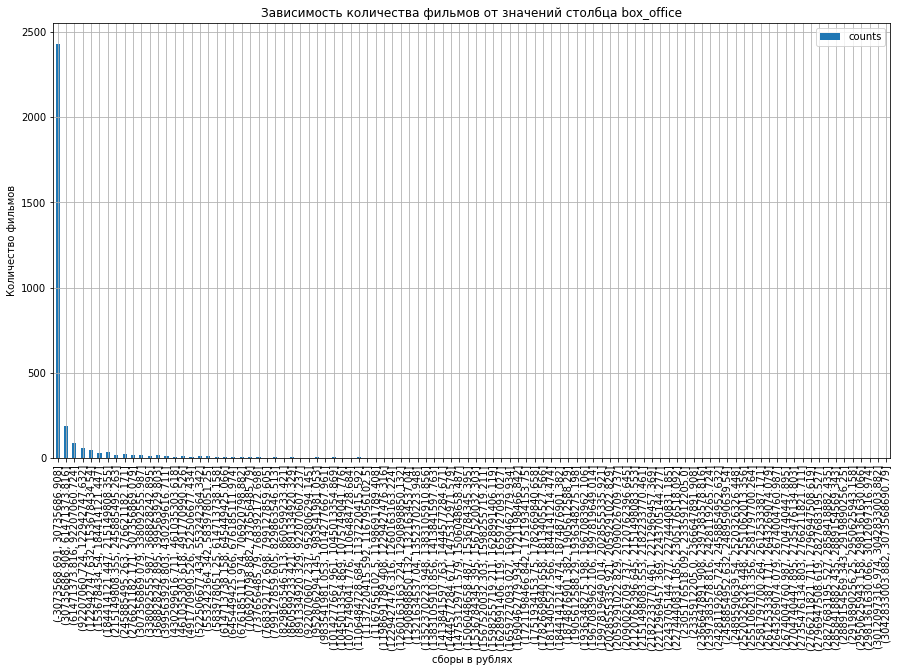

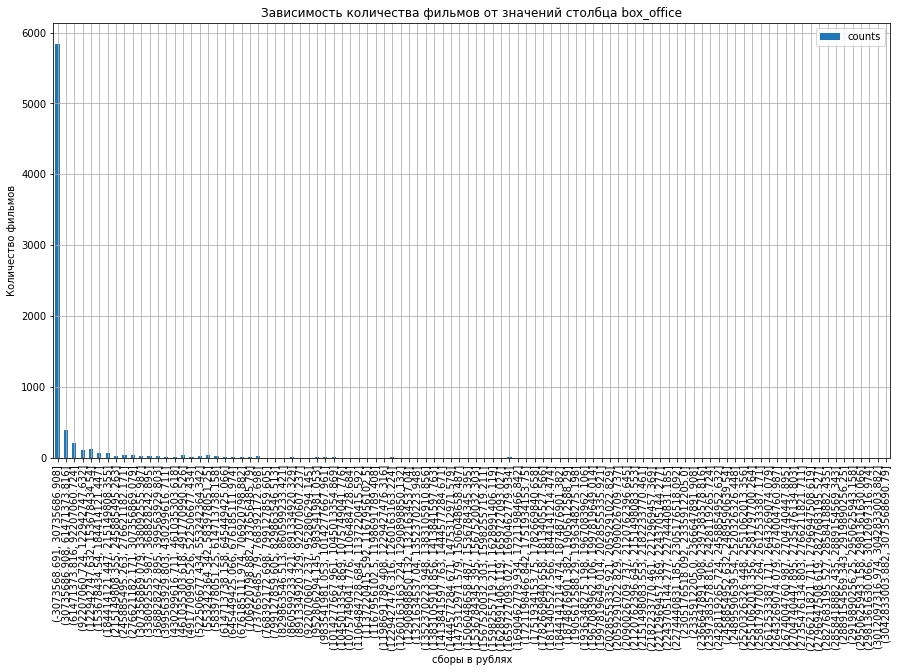

In [81]:
column_describe['genre_main'] = 'главный жанр фильма'
column_describe['genre_main_code'] = column_describe['genre_main'] + ' (код категоризации)'

plotly_bar_plot_sorted_indexes('ratings')
plotly_bar_plot_sorted_indexes('ratings', data_cur_transformed_pd)


plotly_bar_plot_sorted_indexes('genre_main_code')
plotly_bar_plot_sorted_indexes('genre_main_code', data_cur_transformed_pd)

pandas_bar_plot(100,'box_office')
pandas_bar_plot(100,'box_office', data_cur_transformed_pd)

Графики, отвечающие за рейтинг и за главный жанр, выглядят адекватно. Но на заполнение столбца, отвечающее за сборы, будем честными, надеяться не приходится - слишком мало значений было заполнено изначально. Но в любом случае сохраним и этот столбец отдельно просто ради истории.

In [82]:
data['ratings'] = data_cur_transformed_pd['ratings']
print_na('ratings')

genre_dict = dict(enumerate(data['genre_main'].cat.categories))
data['genre_main'] = data_cur_transformed_pd['genre_main_code'].transform(lambda x: genre_dict[x])
print_na('genre_main')

Текущее число пропусков: 0
0.0%
Текущее число пропусков: 0
0.0%


In [83]:
data['box_office_transformed'] = data_cur_transformed_pd['box_office']
print_na('box_office_transformed')

Текущее число пропусков: 0
0.0%


#### Столбец _title_

In [84]:
print('Количество дубликатов (уникальные значения):', data.duplicated(subset=['pu_number']).sum())
print('Количество дубликатов (все значения):', data.duplicated(subset=['pu_number'], keep=False).sum())

base_clean('title')
print('Количество дубликатов (уникальные значения):', data.duplicated(subset=['title']).sum())
print('Количество дубликатов (все значения):', data.duplicated(subset=['title'], keep=False).sum())

Количество дубликатов (уникальные значения): 2
Количество дубликатов (все значения): 4
Количество дубликатов (уникальные значения): 725
Количество дубликатов (все значения): 1290


In [85]:
data[data.duplicated(subset=['title'], keep=False)].sort_values(by='title')

title  pu_number           show_start_date  \
454                  100 МИЛЛИОНОВ ЕВРО  221024616 2016-05-25 12:00:00+00:00   
455                  100 МИЛЛИОНОВ ЕВРО  121013712 2012-06-06 12:00:00+00:00   
5058                          127 ЧАСОВ  221069011 2011-05-18 12:00:00+00:00   
4852                          127 ЧАСОВ  121000811 2011-01-27 12:00:00+00:00   
3130   13 ЧАСОВ: ТАЙНЫЕ СОЛДАТЫ БЕНГАЗИ  121001016 2016-01-15 12:00:00+00:00   
...                                 ...        ...                       ...   
4071  Я НЕНАВИЖУ ДЕНЬ СВЯТОГО ВАЛЕНТИНА  121002010 2010-02-04 12:00:00+00:00   
1703                   Я,СНОВА Я И МАМА  121013116 2016-05-23 12:00:00+00:00   
1704                   Я,СНОВА Я И МАМА  121030213 2013-11-21 12:00:00+00:00   
6379                       ЯН АНТОНЫШЕВ  112011818 2018-11-15 12:00:00+00:00   
6380                       ЯН АНТОНЫШЕВ  112011918 2018-11-15 12:00:00+00:00   

                type                                        film_studio  \
454   Художественный  ПАТЭ,ЭСКВУД,СЕРЕНИТИ ФИЛЬМ,ТФ1 ФИЛЬМ ПРОДЮКСЬО...   
455   Художественный  ПАТЭ,ЭСКВУД,СЕРЕНИТИ ФИЛЬМ,ТФ1 ФИЛЬМ ПРОДЮКСЬО...   
5058  Художественный  ФОКС СЕРЧЛАЙТ ПИКЧЕРЗ,КЛОД ЭЙТ ФИЛМЗ,ФИЛМ ФО,Э...   
4852  Художественный  ФОКС СЕРЧЛАЙТ ПИКЧЕРЗ,КЛОД ЭЙТ ФИЛМЗ,ФИЛМ ФО,Э...   
3130  Художественный  ПАРАМАУНТ,ДАН ФИЛМЗ,ЛАТИНА ПИКЧАРЗ,3 АРТ ИНТЕР...   
...              ...                                                ...   
4071  Художественный  БЛЮ СТАР ПИКЧЕРЗ,АЙ ХЭЙТ ВДЭЙ ПРОДАКШНЗ,АЙ СИ ...   
1703  Художественный  ГОМОН,ЭЛЬ ДЖИ ЭМ ПРОДАКШНЗ,РЕКТАНЛЬ ПРОДЮКСЬОН...   
1704  Художественный  ГОМОН,ЭЛЬ ДЖИ ЭМ ПРОДАКШНЗ,РЕКТАНЛЬ ПРОДЮКСЬОН...   
6379  Документальный                                            UNKNOWN   
6380  Документальный                                            UNKNOWN   

      production_country    director                         producer  \
454              ФРАНЦИЯ     О.БАРРУ                     Р.ГРАНДПЬЕРР   
455              ФРАНЦИЯ     О.БАРРУ                     Р.ГРАНДПЬЕРР   
5058  США,ВЕЛИКОБРИТАНИЯ      Д.БОЙЛ           Б.БЕЛЛЬЮ,Т.РОСС,Г.СМИТ   
4852  США,ВЕЛИКОБРИТАНИЯ      Д.БОЙЛ           Б.БЕЛЛЬЮ,Т.РОСС,Г.СМИТ   
3130                 США       М.БЭЙ                    М.БЭЙ,Э.СТОФФ   
...                  ...         ...                              ...   
4071                 США  Н.ВАРДАЛОС          Д.ЙАННО,М.ШЕРАК,У.ШЕРАК   
1703     ФРАНЦИЯ,БЕЛЬГИЯ   Г.ГАЛЬЕНН  Ж.ДЮПОН,А.ЖИРАР,С.КОЛЬБО-ЖЮСТЕН   
1704     ФРАНЦИЯ,БЕЛЬГИЯ   Г.ГАЛЬЕНН  Ж.ДЮПОН,А.ЖИРАР,С.КОЛЬБО-ЖЮСТЕН   
6379              РОССИЯ   Е.ОКОПНАЯ                      Е.ГЕРАСИМОВ   
6380              РОССИЯ   Е.ОКОПНАЯ                      Е.ГЕРАСИМОВ   

                      age_restriction  refundable_support  \
454   «16+» - для детей старше 16 лет                 0.0   
455   «16+» - для детей старше 16 лет                 0.0   
5058  «16+» - для детей старше 16 лет                 0.0   
4852  «16+» - для детей старше 16 лет                 0.0   
3130      «18+» - запрещено для детей                 0.0   
...                               ...                 ...   
4071  «16+» - для детей старше 16 лет                 0.0   
1703  «16+» - для детей старше 16 лет                 0.0   
1704  «16+» - для детей старше 16 лет                 0.0   
6379  «12+» - для детей старше 12 лет                 0.0   
6380  «12+» - для детей старше 12 лет                 0.0   

      nonrefundable_support  budget financing_source  ratings  \
454                     0.0     0.0                -      6.1   
455                     0.0     0.0                -      6.1   
5058                    0.0     0.0                -      7.7   
4852                    0.0     0.0                -      7.7   
3130                    0.0     0.0                -      6.7   
...                     ...     ...              ...      ...   
4071                    0.0     0.0                -      5.0   
1703                    0.0     0.0       

Аккуратно скомпонуем дубликаты

In [86]:
ser_mode = lambda x: float('nan') if (x.isnull().values.any()) else x.value_counts().index[0]
join_uniq = lambda x: ','.join(set(','.join(x.fillna('')).split(',')))
non_zero_mean = lambda x: max(x) if min(x) == 0 else x.mean()

data = data.groupby('title').agg({'pu_number':'first',
                                 'show_start_date': 'min',
                                 'film_studio': join_uniq,
                                 'production_country': join_uniq,
                                 'director': join_uniq,
                                 'producer': join_uniq,
                                 'age_restriction': ser_mode,
                                 'refundable_support': non_zero_mean,
                                 'nonrefundable_support': non_zero_mean,
                                 'budget': non_zero_mean,
                                 'financing_source': ser_mode,
                                 'ratings': 'mean',
                                 'genres': join_uniq,
                                 'box_office': 'mean',
                                 'film_studio_main': ser_mode,
                                 'production_country_main': ser_mode,
                                 'director_main': ser_mode,
                                 'producer_main': ser_mode,
                                 'genre_main': ser_mode,
                                 'age_restriction_code': ser_mode,
                                 'genre_main_code': ser_mode,
                                 'producer_main_code': ser_mode,
                                 'director_main_code': ser_mode,
                                 'type_code': ser_mode,
                                 'production_country_main_code': ser_mode,
                                 'film_studio_main_code': ser_mode,
                                 'box_office_category': ser_mode,
                                 'box_office_transformed': 'mean',
                                 'type': ser_mode}).reset_index()

In [87]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'A': [1, 1, 2, 2],
                    'B': [1, 2, 3, 4],
                    'C': np.random.randn(4)})



In [88]:
%%time

df.groupby('A').agg(min_B=('B','min'),max_C=('C','max'))

CPU times: user 4.84 ms, sys: 0 ns, total: 4.84 ms
Wall time: 5.04 ms


min_B     max_C
A                 
1      1  0.368407
2      3  0.159377

In [89]:
%%time
df.groupby('A').apply(lambda row : pd.Series({"min_B": row['B'].min(), "max_C":row['C'].max()}))

CPU times: user 6.53 ms, sys: 112 µs, total: 6.64 ms
Wall time: 5.77 ms


min_B     max_C
A                 
1    1.0  0.368407
2    3.0  0.159377

In [90]:
print('Количество дубликатов (уникальные значения):', data.duplicated(subset=['title']).sum())
print('Количество дубликатов (все значения):', data.duplicated(subset=['title'], keep=False).sum())

print('Количество дубликатов (уникальные значения):', data.duplicated(subset=['pu_number']).sum())
print('Количество дубликатов (все значения):', data.duplicated(subset=['pu_number'], keep=False).sum())

Количество дубликатов (уникальные значения): 0
Количество дубликатов (все значения): 0
Количество дубликатов (уникальные значения): 0
Количество дубликатов (все значения): 0


#### Столбец _show_start_date_

В этом столбце нет пропусков, однако нам нужны столбцы с годом выхода фильма и днем недели выхода.

In [91]:
data['year'] = data['show_start_date'].dt.year
column_describe['year'] = 'год выпуска'
data['day_of_week'] = data['show_start_date'].dt.dayofweek
column_describe['day_of_week'] = 'день недели выпуска'
data['month'] = data['show_start_date'].dt.month
column_describe['month'] = 'месяц выпуска'

### Категоризация

In [92]:
data['production_country'] = data['production_country'].astype('category')
data['age_restriction'] = data['age_restriction'].astype('category')
data['financing_source'] = data['financing_source'].astype('category')
data['genres'] = data['genres'].astype('category')
data['film_studio_main'] = data['film_studio_main'].astype('category')
data['production_country_main'] = data['production_country_main'].astype('category')
data['director_main'] = data['director_main'].astype('category')
data['producer_main'] = data['producer_main'].astype('category')
data['genre_main'] = data['genre_main'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6761 entries, 0 to 6760
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype                   
---  ------                        --------------  -----                   
 0   title                         6761 non-null   object                  
 1   pu_number                     6760 non-null   Int64                   
 2   show_start_date               6761 non-null   datetime64[ns, UTC]     
 3   film_studio                   6761 non-null   object                  
 4   production_country            6761 non-null   category                
 5   director                      6761 non-null   object                  
 6   producer                      6761 non-null   object                  
 7   age_restriction               6761 non-null   category                
 8   refundable_support            6761 non-null   float64                 
 9   nonrefundable_support         6761 non-null   float6

### Вывод

Мы исправили следующие проблемы:

* стилистическая ошибка в именовании столбца: puNumber
* неправильный тип данных: show_start_date (object вместо datetime), ratings (object вместо float)
* категоризация: type, age_restriction, genres

Были заполнены пропуски: 
* film_studio, production_country, director - значениями unknown
* financing_source - прочерком (так как его нет)
* producer - прочерками (если продюссера нет, как в фильмах, снятых в СССР) и значениями unknown (если продюссера установить не удалось)
* refundable_support, nonrefundable_support - нулями
* ratings, genres, box_office - с помощью метода k ближайших соседей

Были устранены дубликаты в столбцах pu_number, title, type

Были добавлены столбцы:
* year, month, dayofweek - год, месяц и день недели релиза
* film_studio_main, production_country_main, director_main, producer_main_code - производные столбцы от соответствующих без '\_main' в конце; в тех столбцах, где указано несколько сущностей (несколько продюссеров, жанров и т.д.) столбец с '\_main' хранит одну сущность, которая указана первой

## Исследовательский анализ данных

Посмотрим на то, какое количество фильмов выходило каждый год

In [93]:
plotly_bar_plot_sorted_indexes('year', data)

И по дням недели

In [94]:
#plotly_bar_plot_sorted_indexes('day_of_week', data)

title = 'Зависимость количества фильмов от значений столбца day_of_week'
plot_data = data['day_of_week'].value_counts().sort_index().rename_axis('unique_values').reset_index(name='counts')
plot = px.bar(plot_data, x='unique_values', y='counts', labels={'counts':'Количество фильмов', 'unique_values': column_describe['day_of_week']}, title=title)

plot.update_layout(
    xaxis = dict(
        tickvals = [0, 1, 2, 3, 4, 5, 6],
        ticktext = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    )
)

plot.show()

И по месяцам

In [95]:
#plotly_bar_plot_sorted_indexes('month', data)

title = 'Зависимость количества фильмов от значений столбца month'
plot_data = data['month'].value_counts().sort_index().rename_axis('unique_values').reset_index(name='counts')
plot = px.bar(plot_data, x='unique_values', y='counts', labels={'counts':'Количество фильмов', 'unique_values': column_describe['month']}, title=title)

plot.update_layout(
    xaxis = dict(
        tickvals = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
        ticktext = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    )
)

plot.show()

Теперь посмотрим на количество фильмов по жанрам

In [96]:
plotly_bar_plot_sorted_values('genre_main', data)

Посмотрим также на статистику по всем жанрам, указанным для каждого фильма

In [97]:
all_genres_sorted
dict_data = pd.DataFrame.from_dict(all_genres_sorted, orient='index')
dict_data.columns = ['Количества фильмов']

title = 'Количества фильмов по всем указанным жанрам'
plot = px.bar(dict_data, 
              x=dict_data.index, 
              y=dict_data['Количества фильмов'].values, 
              labels={'y':'Количество фильмов', 'index': 'Жанр'}, 
              title=title)
plot.show()


Определим две группы оценок за фильмы - хорошую и плохую, которые будут различаться медианой.

In [98]:
print('Медианный рейтинг:', data['ratings'].median())
data['is_good_rate'] = data['ratings'].gt(data['ratings'].median())
column_describe['is_good_rate'] = 'хороший рейтинг'

def print_genre_plot(col, col2='is_good_rate', dat=data, height=700):
    title = 'Количества фильмов по столбцу ' + col
    plot_data_1 = dat[dat[col2]][col].value_counts().sort_values(ascending=False).rename_axis('unique_values').reset_index(name='counts')
    plot_data_1[col2] = True

    plot_data_2 = dat[~dat[col2]][col].value_counts().sort_values(ascending=False).rename_axis('unique_values').reset_index(name='counts')
    plot_data_2[col2] = False

    plot_data_1 = pd.concat([plot_data_1, plot_data_2])

    fig = px.bar(plot_data_1, 
                 x="unique_values", 
                 y="counts", 
                 color=col2,
                 labels={'counts':'Количество фильмов', 
                         'unique_values': column_describe[col], 
                         col2: column_describe[col2]},
                 width=1000, 
                 height=height,
                 title=title)
    fig.show()
    
print_genre_plot('genre_main')
#long_df = px.data.medals_long()
#long_df.head(10)

Медианный рейтинг: 6.6


Как можно заметить, комедии и ужасы оцениваются чаще низко, нежели высоко. Обратная ситуация наблюбается с документальными фильмами и аниме. Остальные жанры либо имеют примерно одинаковое количество фильмов с хорошими и плохими оценками, либо недостаточно массово представлены в нашей таблице.

Теперь построим аналогичные графики по годам, чтобы узнать, менялись ли как-то тенденции

In [99]:
for year in sorted(data['year'].unique()):
    cur_data = data[data['year'] == year]
    print('Данные', year, 'года')
    print_genre_plot('genre_main', 'is_good_rate', cur_data)

Данные 2010 года


Данные 2011 года


Данные 2012 года


Данные 2013 года


Данные 2014 года


Данные 2015 года


Данные 2016 года


Данные 2017 года


Данные 2018 года


Данные 2019 года


Что можно сказать по этим графикам? Ужасы и комедии - это те жанры, которые получают в среднем более низкие оценки из года в год. Также исходя из данных последних лет можно сделать выводы, что мультфильмы, фантастика и боевики также не являются перспективным вложением в плане величины оценки фильма. А вот документальные фильмы и аниме, также как и в рейтинге за все года, оцениваются зрителями в целом выше. Однако с ними весьма понятная проблема - это фильмы, рассчитанные на специфичную аудиторию. Поэтому если говорить про жанры - то драма является более стабильным вариантом, имея при этом примерно поровну высоко и низко оцененных фильмов.

Посмотрим также на аналогичную статистику для фильмы, произведенные в России, США и СССР

In [100]:
print('Данные для России')
print_genre_plot('genre_main', 'is_good_rate', data[data['production_country_main'] == 'РОССИЯ'])

print('Данные для США')
print_genre_plot('genre_main', 'is_good_rate', data[data['production_country_main'] == 'США'])

print('Данные для СССР')
print_genre_plot('genre_main', 'is_good_rate', data[data['production_country_main'] == 'СССР'])

Данные для России


Данные для США


Данные для СССР


Графики содержат интересные особенности. Во-первых, бытующее мнение о том, что советские фильмы значительно лучше современных российских, подтверждается и оценками на Кинопоиске. Во-вторых - хотя в обеих странах драмы являются доминирующим жанром, США является основным поставщиком боевиков, фантастики, фильмов ужаса и триллеров, в то время как в России чаще снимают мультфильмы и комедии. Об СССР сложно что-то сказать - драмы сильно опережают все остальные жанры.

In [101]:
column_describe['director_main'] = 'главный режиссер'
cur_data = data[data['director_main'].isin(data['director_main'].value_counts().sort_values(ascending=False).head(50).index)]
cur_data['director_main'] = cur_data['director_main'].astype(str)
print_genre_plot('director_main', 'is_good_rate', cur_data)
#print(data['director_main'].value_counts().sort_values(ascending=False).head(10).index)
#data[data['director_main'].isin(data['director_main'].value_counts().sort_values(ascending=False).head(10).index)]

Среди режиссеров, входящих в топ-50 по числу фильмов, лидерство по количеству фильмов с хорошим рейтингом принадлежит как известным американским (Вуди Аллен, Стивен Спилберг и т.д.), так и советским (Леонид Гайдай, Юрий Озеров, Георгий Данелия и др.). А вот с российскими не задалось - в топе только Д.Червяцов (режиссер мультфильмов "Маша и Медведи" - мультфильм может и неплохой, но все высокие оценки именно за него) и В.Пономарев (снимал "Мульт личности" - я про такой не знаю, но товарищ явно снимал серии удачнее, чем его коллега О.Семёнова). Никита Михалков, Тимур Бекмабетов, Сарек Андреасян - все они не в левой части этого графика (а график, как видно, отсортирован в порядке количества удачных фильмов). 

Посмотрим теперь на успешность студий

In [102]:
column_describe['film_studio_main'] = 'главная студия'
cur_data = data[data['film_studio_main'].isin(data['film_studio_main'].value_counts().sort_values(ascending=False).head(50).index)]
cur_data['film_studio_main'] = cur_data['film_studio_main'].astype(str)
print_genre_plot('film_studio_main', 'is_good_rate', cur_data, 1100)

Вне конкуренции Мосфильм, вслед за ним - известные американские киностудии (Уорнер Бразерс, Юниверсал Пикчерз и т.д.). С российскими студиями все очень плохо.

Посмотрим на зависимость оценок от года и месяца выпуска. Оценки выразим в виде диаграммы размаха.

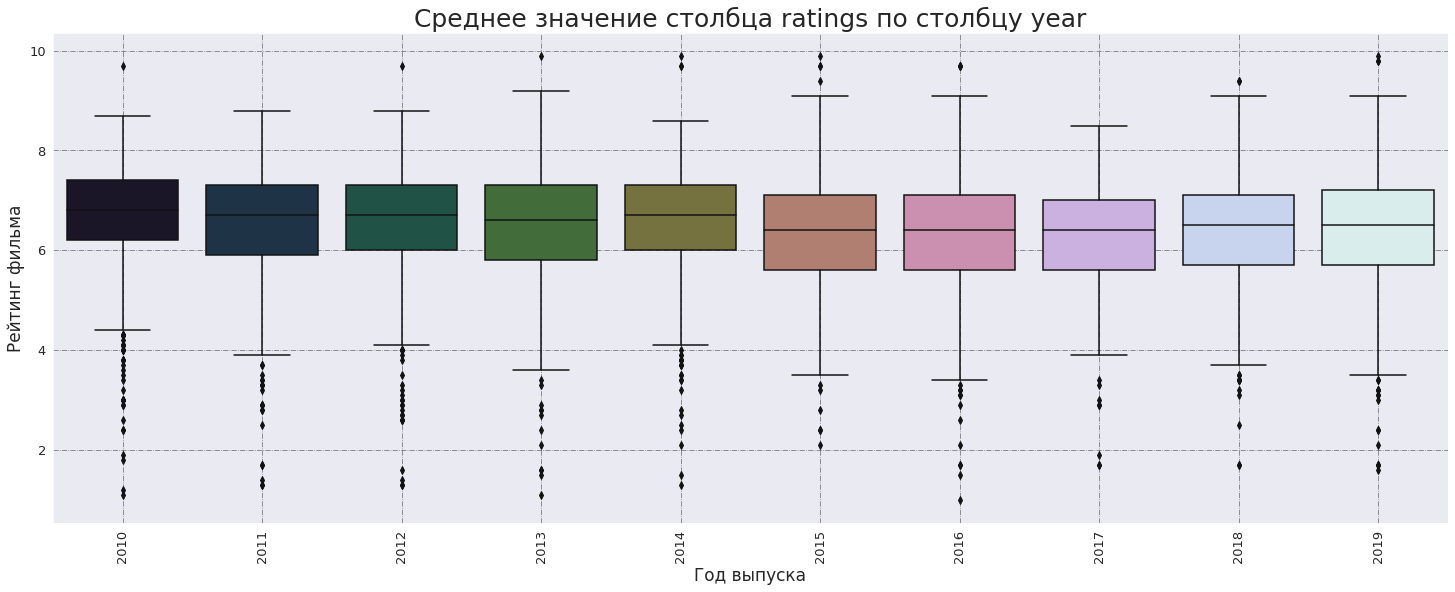

In [103]:
def boxplot_by_param(col1, col2, showfliers=True):
    plt.figure(figsize = (25,9))
    sns.set_style('darkgrid')

    fig = sns.boxplot( x=data[col2], y=data[col1], palette = "cubehelix", showfliers = showfliers)

    plt.ylabel('Рейтинг фильма', fontsize = 17)
    plt.xlabel('Год выпуска', fontsize = 17)
    plt.xticks(rotation = 90, fontsize = 13)
    plt.yticks(fontsize = 13)
    plt.title('Среднее значение столбца ' + col1 + ' по столбцу ' + col2, fontsize = 25)
    plt.grid(True, alpha = 0.5, linestyle = '-.', color = '#000000')
    plt.show()
    
boxplot_by_param('ratings', 'year')

Картинка по оценкам не очень отличается из года в год. Также посмотрим на зависимость рейтинга от жанра

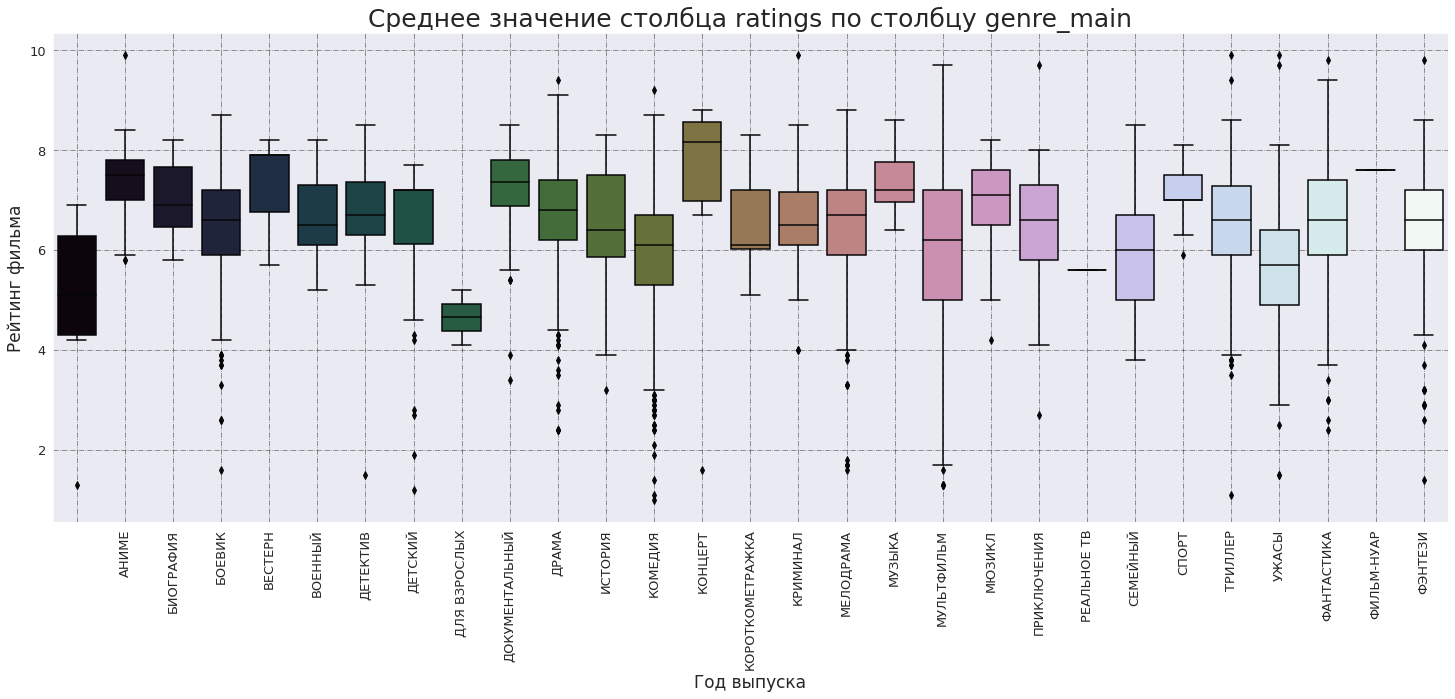

In [104]:
boxplot_by_param('ratings', 'genre_main')

Из этой диаграмы, используя предыдущую информацию, можно сделать довольно простой вывод - чем более популярный жанр, тем больше в нем разброс оценок.

 А что со сборами?

Данные с выбросами


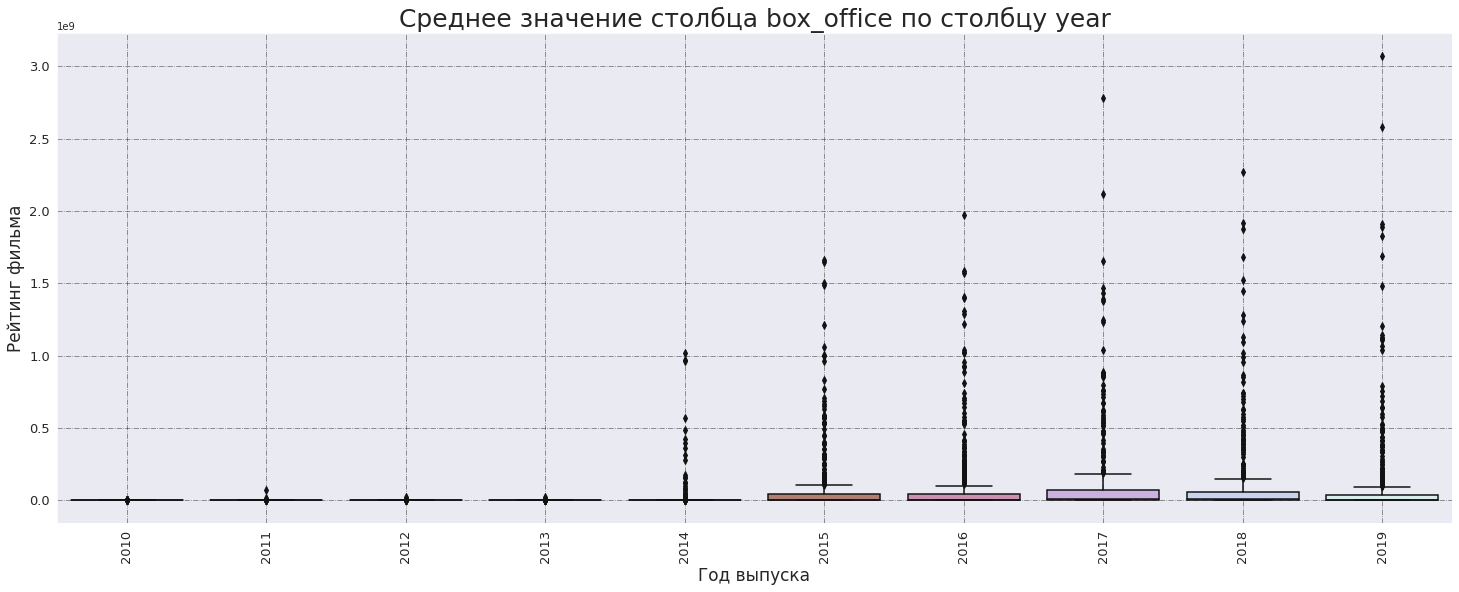

Данные без выбросов


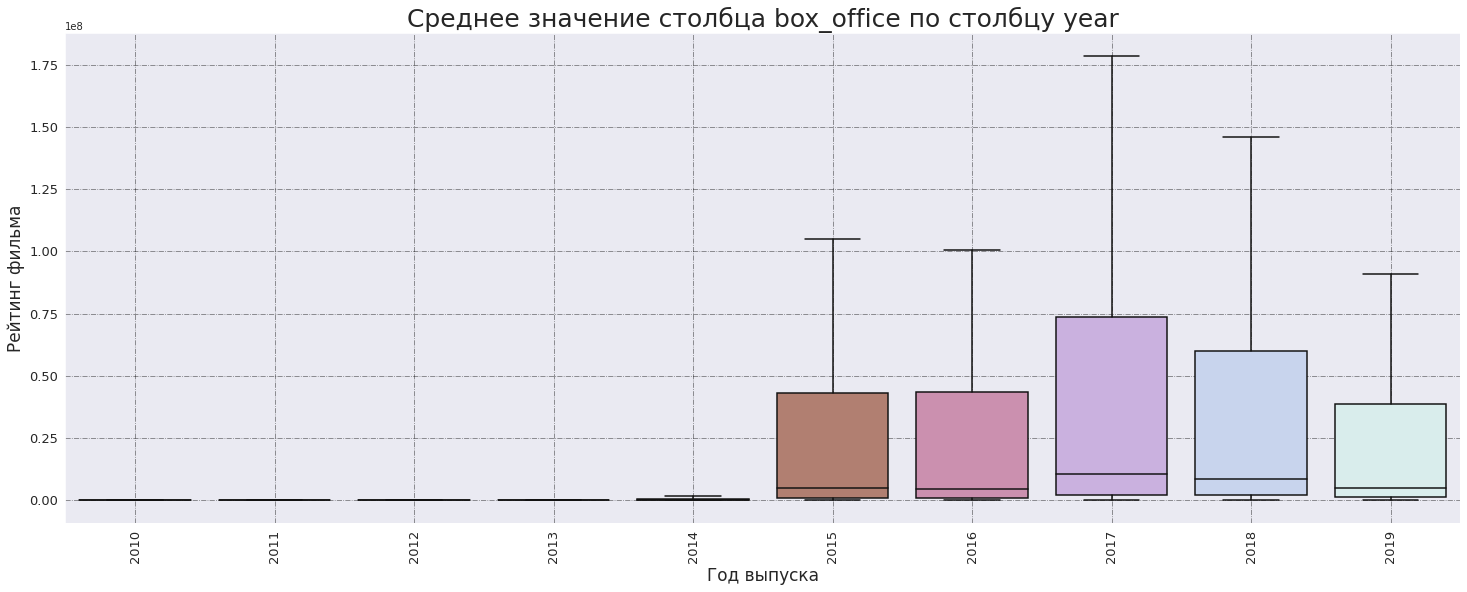

In [105]:
print('Данные с выбросами')
boxplot_by_param('box_office', 'year')
print('Данные без выбросов')
boxplot_by_param('box_office', 'year', False)

Можно заметить, что в отношении сборов была тенденция на повышение до 2017го года, но после этого начался спад. Однако выбросы дают понять, что максимальные значения сборов в целом не уменьшаются.

Также посмотрим на суммарные сборы за год

In [106]:
cur_data = data.groupby('year')['box_office'].sum().sort_index()

title = 'Зависимость сборов со всех фильмов от года'
plot_data = cur_data.rename_axis('unique_values').reset_index(name='counts')
plot = px.bar(plot_data, 
              x='unique_values', 
              y='counts', 
              labels={'counts':'Сборы', 
                      'unique_values': 'год'}, 
              title=title)
plot.show()

Посмотрим также на данные по количеству фильмов, доле фильмов с известной информацией о сборах, а также данные о средней и максимальной стоимости фильма по годам.

In [107]:
cur_data_box = data[data['box_office'] > 0].groupby('year')['pu_number'].count().sort_index()

title = 'Зависимость количества фильмов с известными данными о сборах от года'
plot_data = cur_data_box.rename_axis('unique_values').reset_index(name='counts')
plot = px.bar(plot_data, 
              x='unique_values', 
              y='counts', 
              labels={'counts':'Количество фильмов', 
                      'unique_values': 'год'}, 
              title=title)
plot.show()

In [108]:
cur_data_all = data.groupby('year')['pu_number'].count().sort_index()

title = 'Зависимость количества фильмов от года'
plot_data = cur_data_all.rename_axis('unique_values').reset_index(name='counts')
plot = px.bar(plot_data, 
              x='unique_values', 
              y='counts', 
              labels={'counts':'Количество фильмов', 
                      'unique_values': 'год'}, 
              title=title)
plot.show()

In [109]:
cur_data = cur_data_box/cur_data_all

title = 'Зависимость доли фильмов с известной информацией о сборах от года'
plot_data = cur_data.rename_axis('unique_values').reset_index(name='counts')
plot = px.bar(plot_data, 
              x='unique_values', 
              y='counts', 
              labels={'counts':'Доля фильмов', 
                      'unique_values': 'год'}, 
              title=title)
plot.show()

In [110]:
cur_data = data[data['box_office'] > 0].groupby('year')['box_office'].mean().sort_index()

title = 'Зависимость среднего количества сборов с показов фильмов от года'
plot_data = cur_data.rename_axis('unique_values').reset_index(name='counts')
plot = px.bar(plot_data, 
              x='unique_values', 
              y='counts', 
              labels={'counts':'Средние сборы', 
                      'unique_values': 'год'}, 
              title=title)
plot.show()

In [111]:
cur_data = data[data['box_office'] > 0].groupby('year')['box_office'].max().sort_index()

title = 'Зависимость максимального количества сборов с показов фильмов от года'
plot_data = cur_data.rename_axis('unique_values').reset_index(name='counts')
plot = px.bar(plot_data, 
              x='unique_values', 
              y='counts', 
              labels={'counts':'Максимальные сборы', 
                      'unique_values': 'год'}, 
              title=title)
plot.show()

Видно, что с 10го по 14й год доля фильмов с известными данными о сборах несколько меньше, чем в другие года. Однако как показывают графики со средними и максимальными сборами за год - выборка фильмов из этих лет, для которых известны сборы, скорее всего не является случайной, ибо данные слишком сильно отличаются от данных за 2015-2019гг. Скорее всего, пропущены фильмы с большими кассовыми сборами. Так или иначе, какие-то выводы о сборах за 2010-2014гг делать по нашей таблице некорректно.

Сделаем отдельные графики для России и США

In [112]:
print('РОССИЯ')
cur_data = data[data['production_country_main'] == 'РОССИЯ'].groupby('year')['box_office'].sum().sort_index()

title = 'Зависимость сборов со всех фильмов от года'
plot_data = cur_data.rename_axis('unique_values').reset_index(name='counts')
plot = px.bar(plot_data, 
              x='unique_values', 
              y='counts', 
              labels={'counts':'Сборы', 
                      'unique_values': 'год'}, 
              title=title)
plot.show()

print('США')
cur_data = data[data['production_country_main'] == 'США'].groupby('year')['box_office'].sum().sort_index()

title = 'Зависимость сборов со всех фильмов от года'
plot_data = cur_data.rename_axis('unique_values').reset_index(name='counts')
plot = px.bar(plot_data, 
              x='unique_values', 
              y='counts', 
              labels={'counts':'Сборы', 
                      'unique_values': 'год'}, 
              title=title)
plot.show()

РОССИЯ


США


Сборы американских фильмов значительно выше - несмотря на гораздо большую поддержку СМИ (думаю, ни у кого нет сомнений, что российские фильмы в России рекламируются чаще). Учитывая графики выше - качество фильмов значительно ниже.

In [113]:
def show_all_income(col1, col2, col3, data=data):
    cur_data = data.groupby([col1, col2])[col3].sum().sort_index().reset_index(level=[0,1])

    title = 'Зависимость столбца' + col3 + ' со всех фильмов от столбца ' + col1 + '  и ' + col2
    plot_data = cur_data
    plot = px.bar(plot_data, 
                  x=col1, 
                  y=col3, 
                  color=col2,
                  labels={col3:column_describe[col3], 
                          col1: column_describe[col1],
                          col2: column_describe[col2]}, 
                  title=title)
    plot.show()
    
show_all_income('year', 'genre_main', 'box_office')

Как видно, самые кассовые жанры - мультфильмы и фантастика. Чуть менее успешные - фэнтази, боевики и комедии.

Построим аналогичные графики для России и США

In [114]:
print('ДАННЫЕ ДЛЯ РОССИИ')
show_all_income('year', 'genre_main', 'box_office', data[data['production_country_main'] == 'РОССИЯ'])
print('ДАННЫЕ ДЛЯ США')
show_all_income('year', 'genre_main', 'box_office', data[data['production_country_main'] == 'США'])

ДАННЫЕ ДЛЯ РОССИИ


ДАННЫЕ ДЛЯ США


Очень интересные графики. Из них видно, что основные доходы от российских фильмов приносят комедии и драмы, а от американских - фантастика, мультфильмы, фэнтази и боевики (в общем, то, что в России снимают плохо).

Проверим, какое соотношение доходов между фильмами с различными возрастными ограничениями

In [115]:
print('ДАННЫЕ ДЛЯ ВСЕХ СТРАН')
show_all_income('year', 'age_restriction', 'box_office', data)
print('ДАННЫЕ ДЛЯ РОССИИ')
show_all_income('year', 'age_restriction', 'box_office', data[data['production_country_main'] == 'РОССИЯ'])
print('ДАННЫЕ ДЛЯ США')
show_all_income('year', 'age_restriction', 'box_office', data[data['production_country_main'] == 'США'])

ДАННЫЕ ДЛЯ ВСЕХ СТРАН


ДАННЫЕ ДЛЯ РОССИИ


ДАННЫЕ ДЛЯ США


Статистика подсказывает, что среди российских фильмов больше всего доходов приносят фильмы с ограничением 12+. Среди американских фильмов с переменным успехом, но все же лидирует категория 16+. Общая статистика по всем фильмам не дает определенного ответа о популярности - для каждого ограничения были взлеты и падения по сборам. Единственное неудачное ограничение - это 0+ и 18+. Возможно по ним просто недостаточно данных, но за фильмы 18+ можно сказать, что они очень ограничены в рекламе, так что даже большое их количество вряд ли приведет к повышенным средним сборам за фильм по сравнению с фильмами в других возрастных ограничениях.

#### Вывод

Мы построили большое количество графиков и сделали различные выводы:
* были построены графики количества выпускаемых фильмов по годам, месяцам и дням недели, а также по жанрам (главным и суммарно), по режиссерам, продюссерам и киностудиям (50 самых "работоспособных" - с наибольшим количеством выпущенных фильмов); большинство из этих графиков были повторены как для фильмов со всех стран сразу, так и отдельно для фильмов только из США, только из России и только из СССР
* была определена медиана рейтинга фильмов (6.7), на основании которой фильмы были поделены на фильмы с высоким и фильмы с низким рейтингами; было посчитано и визуализировано количество и соотношение между этими группами по годам, жанрам, режиссерам, продюссерам, киностудиям, возрастным ограничениям; большинство из этих графиков были повторены как для фильмов со всех стран сразу, так и отдельно для фильмов только из США, только из России и только из СССР
* также была исследованы кассовые сборы; была исследована и визуализирована их зависимость от года выпуска фильма, жанра и возрастных ограничений; все эти графики были повторены как для фильмов со всех стран сразу, так и отдельно для фильмов только из США, только из России и только из СССР

Основные выводы, которые можно сделать из этих графиков:
* самые популярные жанры - драма, комедия, мелодрама, трилер и боевик
* комедии и ужасы оцениваются чаще низко, нежели высоко; обратная ситуация наблюбается с документальными фильмами и аниме. Остальные жанры либо имеют примерно одинаковое количество фильмов с хорошими и плохими оценками, либо недостаточно массово представлены в нашей таблице.
* ужасы и комедии - это те жанры, которые получают в среднем более низкие оценки из года в год. Также исходя из данных последних лет можно сделать выводы, что мультфильмы, фантастика и боевики также не являются перспективным вложением в плане величины оценки фильма. А вот документальные фильмы и аниме, также как и в рейтинге за все года, оцениваются зрителями в целом выше. Однако с ними весьма понятная проблема - это фильмы, рассчитанные на специфичную аудиторию. Поэтому если говорить про жанры - то драма является более стабильным вариантом, имея при этом примерно поровну высоко и низко оцененных фильмов.
* бытующее мнение о том, что советские фильмы значительно лучше современных российских, подтверждается и оценками на Кинопоиске
* хотя в обеих странах драмы являются доминирующим жанром, США является основным поставщиком боевиков, фантастики, фильмов ужаса и триллеров, в то время как в России чаще снимают мультфильмы и комедии. Об СССР сложно что-то сказать - драмы сильно опережают все остальные жанры.
* среди режиссеров, входящих в топ-50 по числу фильмов, лидерство по количеству фильмов с хорошим рейтингом принадлежит как известным американским (Вуди Аллен, Стивен Спилберг и т.д.), так и советским (Леонид Гайдай, Юрий Озеров, Георгий Данелия и др.). А вот с российскими не задалось - в топе только Д.Червяцов (режиссер мультфильмов "Маша и Медведи" - мультфильм может и неплохой, но все высокие оценки именно за него) и В.Пономарев (снимал "Мульт личности" - я про такой не знаю, но товарищ явно снимал серии удачнее, чем его коллега О.Семёнова). Никита Михалков, Тимур Бекмабетов, Сарек Андреасян - все они не в левой части этого графика (а график, как видно, отсортирован в порядке количества удачных фильмов). 
* что касается киностудий, то вне конкуренции Мосфильм, вслед за ним - известные американские киностудии (Уорнер Бразерс, Юниверсал Пикчерз и т.д.). С российскими студиями все очень плохо.
* картинка диаграмм размаха по оценкам не очень отличается из года в год
* чем более популярный жанр, тем больше в нем разброс оценок и тем шире диаграмма размаха
* в отношении сборов была тенденция на повышение до 2017го года, но после этого начался спад. Однако выбросы дают понять, что максимальные значения сборов в целом не уменьшаются; это подтверждает и график суммарных сборов за все фильмы
* сборы американских фильмов значительно выше - несмотря на гораздо большую поддержку СМИ (думаю, ни у кого нет сомнений, что российские фильмы в России рекламируются чаще). Учитывая выводы выше - качество наших фильмов значительно уступает американским
* основные доходы от российских фильмов приносят комедии и драмы, а от американских - фантастика, мультфильмы, фэнтази и боевики (в общем, то, что в России снимают плохо)
* среди российских фильмов больше всего доходов приносят фильмы с ограничением 12+. Среди американских фильмов с переменным успехом, но все же лидирует категория 16+. Общая статистика по всем фильмам не дает определенного ответа о популярности - для каждого ограничения были взлеты и падения по сборам. Единственное неудачное ограничение - это 0+ и 18+. Возможно по ним просто недостаточно данных, но за фильмы 18+ можно сказать, что они очень ограничены в рекламе, так что даже большое их количество вряд ли приведет к повышенным средним сборам за фильм по сравнению с фильмами в других возрастных ограничениях

## Исследование фильмов, которые получили государственную поддержку

От фильмов, которые государство посредством министерства культуры и фонда кино спонсирует, есть некоторые ожидания, которые могут выражаться следующими величинами:

* высокий рейтинг 

Тут все понятно. Чем выше рейтинг фильма - тем лучше фильм, тем выше престиж и министерства культуры, и России в области кинематографа

* высокие сборы 

Если фильм, пусть даже с небольшим рейтингом, окупился - это как минимум не является бесполезной тратой денег. Фильмы с высокими кассовыми сборами также влияют на престиж.

* историческая и культурная ценность

Фильмы могут рассказывать об истории и выполнять просветительскую функцию. Даже не самый лучший фильм с невысокими сборами может быть полезен в этом смысле.

К сожалению, из этих величин последнюю мы оценить никак не можем. Даже фильмы, которые рекламируются как исторические и снятые по документам, могут на деле оказаться профанацией - мы никак не можем вычленить эту информацию. Оставим подобную оценку экспертам, а сами оценим рейтинг и сборы.

Для начала выберем ту часть датасета, которая нам интересна - строки, где сумма столбцов _refundable_support и nonrefundable_support_ не равна нулю

In [116]:
cur_data = data[data['refundable_support'] + data['nonrefundable_support'] > 0]
cur_data.describe()

pu_number  refundable_support  nonrefundable_support        budget  \
count  3.320000e+02        3.320000e+02           3.320000e+02  3.320000e+02   
mean   1.116330e+08        1.186446e+07           4.898099e+07  1.332193e+08   
std    5.743442e+06        2.491656e+07           5.998012e+07  1.873938e+08   
min    1.110001e+08        0.000000e+00           0.000000e+00  8.571429e+06   
25%    1.110049e+08        0.000000e+00           2.500000e+07  4.615397e+07   
50%    1.110105e+08        0.000000e+00           3.000000e+07  7.459255e+07   
75%    1.110178e+08        1.500000e+07           4.037500e+07  1.500021e+08   
max    2.140101e+08        1.800000e+08           4.000000e+08  2.305074e+09   

          ratings    box_office  age_restriction_code  genre_main_code  \
count  332.000000  3.180000e+02            332.000000       317.000000   
mean     6.029217  1.324347e+08              2.117470        14.239748   
std      1.165655  3.348370e+08              1.132357         6.244435   
min      1.000000  1.550000e+03              0.000000         2.000000   
25%      5.300000  1.236676e+06              1.000000        10.000000   
50%      6.200000  1.572007e+07              2.000000        12.000000   
75%      6.725000  1.063730e+08              3.000000        18.000000   
max      9.400000  3.073569e+09              4.000000        28.000000   

       producer_main_code  director_main_code   type_code  \
count          332.000000          332.000000  332.000000   
mean          1942.680723         1912.234940    4.506024   
std           1241.386208         1343.548267    1.490137   
min              0.000000            7.000000    0.000000   
25%            665.250000          503.000000    5.000000   
50%           2314.000000         1923.500000    5.000000   
75%           3071.500000         3069.000000    5.000000   
max           3838.000000         4417.000000    5.000000   

       production_country_main_code  film_studio_main_code  \
count                    332.000000             332.000000   
mean                      53.015060            1996.415663   
std                        0.274411             982.858601   
min                       53.000000               4.000000   
25%                       53.000000            1327.500000   
50%                       53.000000            1995.000000   
75%                       53.000000            2942.500000   
max                       58.000000            3777.000000   

       box_office_transformed         year  day_of_week       month  
count            3.320000e+02   332.000000   332.000000  332.000000  
mean             1.277585e+08  2016.683735     2.542169    6.834337  
std              3.285720e+08     1.666982     1.406083    3.460563  
min              1.550000e+03  2011.000000     0.000000    1.000000  
25%              1.165568e+06  2015.000000     2.000000    4.000000  
50%              1.504978e+07  2016.500000     3.000000    6.500000  
75%              1.035421e+08  2018.000000     3.000000   10.000000  
max              3.073569e+09  2019.000000     6.000000   12.000000

### Сборы фильмов, получивших государственную поддержку

Cоздадим столбец, который будет отражать окупаемость фильмов с поддержкой государства. В нем будет храниться разность между сборами и бюджетом фильма.

In [117]:
cur_data['profit'] = cur_data['box_office'] - cur_data['budget']
column_describe['is_paid_off'] = 'разница между сборами и бюджетом'
cur_data['profit'].describe()

count    3.180000e+02
mean    -1.447990e+06
std      3.151070e+08
min     -1.971477e+09
25%     -7.245775e+07
50%     -4.125415e+07
75%     -9.652985e+06
max      2.913569e+09
Name: profit, dtype: float64

Как видно, большинство фильмов не окупается - все квартили обоих столбцов отрицательные. Получим точную долю фильмов, которые собрали больше, чем их бюджет и больше, чем полученные от государства деньги

In [118]:
print(100*cur_data[cur_data['profit'] >= 0]['profit'].count()/cur_data['profit'].count(), '%', sep='')

23.270440251572328%


In [119]:
100 * (cur_data['profit'] >= 0).mean()

22.289156626506024

Введем еще дополнительныq булев столбца для удобства визуализации - отражающий, окупился ли фильм. Вместе со столбцом, отражающим, является ли оценка фильма хорошей, вся наша дальнейшая работа сведется примерно к той же, что была в предыдущем пункте - строить графики уже готовыми функциями и делать из них выводы

In [120]:
cur_data['is_paid_off'] = cur_data['profit'] >= 0
column_describe['is_paid_off'] = 'фильм окупился'

In [121]:
print_genre_plot('genre_main', 'is_paid_off', cur_data, 800)

Комедии и драмы - самые популярные жанры фильмов, которые поддерживаются государством. Единственный жанр, где количество окупаемых фильмов больше, чем неокупаемых - спорт, но в нем представлено всего три фильма. В остальных жанрах доля неокупаемых заметно превышает долю окупаемых.

In [122]:
cur_data['director_main'] = cur_data['director_main'].astype(str)
cur_data_tmp = cur_data[cur_data['director_main'].isin(cur_data['director_main'].value_counts().sort_values(ascending=False).head(50).index)]

print_genre_plot('director_main', 'is_paid_off', cur_data_tmp)

Всего одиннадцати режиссерам удалось снять окупаемых фильмов больше, чем неокупаемых. Дмитрию Дьяченко удалось снять сразу четыре коммерчески успешных и ни одного неокупившегося, еще семи (Т.Бекмабетов, В.Ровенский, С.Подгаевский, Р.Гигинеишвили, Д.Киселев, Л.Марголин и Р.Прыгунов) - по два фильма, которые окупились, и ни одного неокупившегося.

In [123]:
column_describe['producer_main'] = 'главный продюсер'
cur_data['producer_main'] = cur_data['producer_main'].astype(str)
cur_data_tmp = cur_data[cur_data['producer_main'].isin(cur_data['producer_main'].value_counts().sort_values(ascending=False).head(50).index)]

print_genre_plot('producer_main', 'is_paid_off', cur_data_tmp)

Семерым продюссерам удалось помочь создать больше успешных, нежели неуспешных фильмов. Среди них отметим Эдуарда Илояна (7 успешных фильмов против двух неуспешных), Леонида Верещагина и Петра Анурова (2 удачных фильма и ни одного неудачного)

In [124]:
column_describe['film_studio_main'] = 'главный продюсер'
cur_data['film_studio_main'] = cur_data['film_studio_main'].astype(str)
cur_data_tmp = cur_data[cur_data['film_studio_main'].isin(cur_data['film_studio_main'].value_counts().sort_values(ascending=False).head(50).index)]

print_genre_plot('film_studio_main', 'is_paid_off', cur_data_tmp)

Среди успешных студий можно отметить сразу десять. Среди них студия Т.Бекмамбетова "Базелевс" (на графике у нее старое название Таббак - под их руководством были сняты оба "Дозора" Лукьяненко, а также печально известного "Горько-2") и кинокомпания Кинослово.

### Рейтинг фильмов, получивших государственную поддержку

Для начала посмотрим на общие количество фильмов с хорошим рейтингом

In [125]:
print(100*cur_data[cur_data['is_good_rate']]['profit'].count()/cur_data['profit'].count(), '%', sep='')

29.87421383647799%


Ситуация на несколько процентов лучше, чем с окупаемостью, однако по-прежнему плачевна. Ну что же, посмотрим на графики

In [126]:
print_genre_plot('genre_main', 'is_good_rate', cur_data)

Как показывает график, есть несколько жанров, в которых вероятность появления хорошего фильма весьма велика. Все детские фильмы, концерты, аниме и документальные фильмы получили хорошие оценки (с оговоркой, что в трех последних жанрах представлено всего по одному фильму). Больше половины хороших фильмов получаются в жанре фэнтези, спорте, биографии, детективах. А вот с приключениями, ужасами, трилерами, мелодрамами и комедиями ловить нечего - значительная их часть имеет рейтинг ниже медианного.

In [127]:
cur_data_tmp = cur_data[cur_data['director_main'].isin(cur_data['director_main'].value_counts().sort_values(ascending=False).head(50).index)]
print_genre_plot('director_main', 'is_good_rate', cur_data_tmp)

В список успешных режиссеров попали Сарек Андреасян (кажется, я что-то напутал при мердже дубликатов - иначе это не объяснить!), А.Якимчук, К.Шипенко, С.Мокрицкий.

In [128]:
cur_data_tmp = cur_data[cur_data['producer_main'].isin(cur_data['producer_main'].value_counts().sort_values(ascending=False).head(50).index)]
print_genre_plot('producer_main', 'is_good_rate', cur_data_tmp)

Среди лучших продюссеров - С.Кикнавелидзе, И.Угольников и Л.Верещагин (один из продюссеров "Движения вверх" - одной из профанаций истории, о которой я выше писал). 

In [129]:
cur_data_tmp = cur_data[cur_data['film_studio_main'].isin(cur_data['film_studio_main'].value_counts().sort_values(ascending=False).head(50).index)]
print_genre_plot('film_studio_main', 'is_good_rate', cur_data_tmp)

Среди успешных студий - "Белое зеркало" и "Новое время".

### Вывод

Мы оценили успешность фильмов, на которые выделили государственные деньги, по двум признакам - окупаемость и оценки выше медианных. Согласно построенным графикам и данных - все плохо и с окупаемостью, и с оценками. Всего несколько режисеров и киностудий после такой ужасной статистики заслуживают государственной поддержки, нужно искать новых молодых режиссеров.

## Общий вывод

Здесь будет вкратце описано, что было сделано в данной работе и какие выводы сделаны.

После первичного осмотра данных и слияния двух таблиц в одну обнаружились проблемы со столбцами. Мы исправили следующие проблемы:

* стилистическая ошибка в именовании столбца: puNumber
* неправильный тип данных: show_start_date (object вместо datetime), ratings (object вместо float)
* категоризация: type, age_restriction, genres

Были заполнены пропуски: 
* film_studio, production_country, director - значениями unknown
* financing_source - прочерком (так как его нет)
* producer - прочерками (если продюссера нет, как в фильмах, снятых в СССР) и значениями unknown (если продюссера установить не удалось)
* refundable_support, nonrefundable_support - нулями
* ratings, genres, box_office - с помощью метода k ближайших соседей

Были устранены дубликаты в столбцах pu_number, title, type

Были добавлены столбцы:
* year, month, dayofweek - год, месяц и день недели релиза
* film_studio_main, production_country_main, director_main, producer_main_code - производные столбцы от соответствующих без '\_main' в конце; в тех столбцах, где указано несколько сущностей (несколько продюссеров, жанров и т.д.) столбец с '\_main' хранит одну сущность, которая указана первой

После обработки данных мы визуализировали и изучили закономерности в данных. Мы построили большое количество графиков:
* были построены графики количества выпускаемых фильмов по годам, месяцам и дням недели, а также по жанрам (главным и суммарно), по режиссерам, продюссерам и киностудиям (50 самых "работоспособных" - с наибольшим количеством выпущенных фильмов); большинство из этих графиков были повторены как для фильмов со всех стран сразу, так и отдельно для фильмов только из США, только из России и только из СССР
* была определена медиана рейтинга фильмов (6.7), на основании которой фильмы были поделены на фильмы с высоким и фильмы с низким рейтингами; было посчитано и визуализировано количество и соотношение между этими группами по годам, жанрам, режиссерам, продюссерам, киностудиям, возрастным ограничениям; большинство из этих графиков были повторены как для фильмов со всех стран сразу, так и отдельно для фильмов только из США, только из России и только из СССР
* также была исследованы кассовые сборы; была исследована и визуализирована их зависимость от года выпуска фильма, жанра и возрастных ограничений; все эти графики были повторены как для фильмов со всех стран сразу, так и отдельно для фильмов только из США, только из России и только из СССР

Основные выводы, которые можно сделать из этих графиков:
* самые популярные жанры - драма, комедия, мелодрама, трилер и боевик
* комедии и ужасы оцениваются чаще низко, нежели высоко; обратная ситуация наблюбается с документальными фильмами и аниме. Остальные жанры либо имеют примерно одинаковое количество фильмов с хорошими и плохими оценками, либо недостаточно массово представлены в нашей таблице.
* ужасы и комедии - это те жанры, которые получают в среднем более низкие оценки из года в год. Также исходя из данных последних лет можно сделать выводы, что мультфильмы, фантастика и боевики также не являются перспективным вложением в плане величины оценки фильма. А вот документальные фильмы и аниме, также как и в рейтинге за все года, оцениваются зрителями в целом выше. Однако с ними весьма понятная проблема - это фильмы, рассчитанные на специфичную аудиторию. Поэтому если говорить про жанры - то драма является более стабильным вариантом, имея при этом примерно поровну высоко и низко оцененных фильмов.
* бытующее мнение о том, что советские фильмы значительно лучше современных российских, подтверждается и оценками на Кинопоиске
* хотя в обеих странах драмы являются доминирующим жанром, США является основным поставщиком боевиков, фантастики, фильмов ужаса и триллеров, в то время как в России чаще снимают мультфильмы и комедии. Об СССР сложно что-то сказать - драмы сильно опережают все остальные жанры.
* среди режиссеров, входящих в топ-50 по числу фильмов, лидерство по количеству фильмов с хорошим рейтингом принадлежит как известным американским (Вуди Аллен, Стивен Спилберг и т.д.), так и советским (Леонид Гайдай, Юрий Озеров, Георгий Данелия и др.). А вот с российскими не задалось - в топе только Д.Червяцов (режиссер мультфильмов "Маша и Медведи" - мультфильм может и неплохой, но все высокие оценки именно за него) и В.Пономарев (снимал "Мульт личности" - я про такой не знаю, но товарищ явно снимал серии удачнее, чем его коллега О.Семёнова). Никита Михалков, Тимур Бекмабетов, Сарек Андреасян - все они не в левой части этого графика (а график, как видно, отсортирован в порядке количества удачных фильмов). 
* что касается киностудий, то вне конкуренции Мосфильм, вслед за ним - известные американские киностудии (Уорнер Бразерс, Юниверсал Пикчерз и т.д.). С российскими студиями все очень плохо.
* картинка диаграмм размаха по оценкам не очень отличается из года в год
* чем более популярный жанр, тем больше в нем разброс оценок и тем шире диаграмма размаха
* в отношении сборов была тенденция на повышение до 2017го года, но после этого начался спад. Однако выбросы дают понять, что максимальные значения сборов в целом не уменьшаются; это подтверждает и график суммарных сборов за все фильмы
* сборы американских фильмов значительно выше - несмотря на гораздо большую поддержку СМИ (думаю, ни у кого нет сомнений, что российские фильмы в России рекламируются чаще). Учитывая выводы выше - качество наших фильмов значительно уступает американским
* основные доходы от российских фильмов приносят комедии и драмы, а от американских - фантастика, мультфильмы, фэнтази и боевики (в общем, то, что в России снимают плохо)
* среди российских фильмов больше всего доходов приносят фильмы с ограничением 12+. Среди американских фильмов с переменным успехом, но все же лидирует категория 16+. Общая статистика по всем фильмам не дает определенного ответа о популярности - для каждого ограничения были взлеты и падения по сборам. Единственное неудачное ограничение - это 0+ и 18+. Возможно по ним просто недостаточно данных, но за фильмы 18+ можно сказать, что они очень ограничены в рекламе, так что даже большое их количество вряд ли приведет к повышенным средним сборам за фильм по сравнению с фильмами в других возрастных ограничениях

После этого мы изучили фильмы, которые получали государственную поддержку. Вот выводы которые были сделаны по ее итогу:
* всего 22% фильмов, получивших государственную поддержку, окупаются, и всего 29% имеют рейтинг выше медианного
* государство спонсирует примерно 70% общего бюджета фильма
* остались неясными причины, по которым тот или иной фильм получает деньги на возвратной или безвозвратной основе

Общие рекомендации, которые никто не будет читать, но которые на основании выводов выше можно рекомендовать министерству культуры:
* деньги на возвратной основе есть смысл давать на комедии - они являются самыми популярными и самыми окупаемыми среди российских фильмов. Высоких оценок и художественной ценности от них ждать смысла нет, однако если выделить деньги умеющим людям (вроде Жоры Крыжовникова) - по крайней мере деньги имеют большие шансы вернуться
* деньги на безвозвратной основе есть смысл давать на драмы, военные, исторические и документальные фильмы - они с высокой вероятностью будут иметь высокий рейтинг и будут полезны для культурного развития; однако, рекомендаций по конкретным фамилиям тут выдавать нет смысла - сейчас фильм с высоким рейтингом получится только от очень известного режиссера с тонной рекламы на федеральных каналах, а это те ресурсы, затраты на которые полностью оценить не получится. Нужно искать новые таланты, которые наш анализ табличек едва ли выловит. Однако это не проблема - добросовестные и талантливые режиссеры (Ю.Быков, В.Шамиров и т.д.) на слуху и так. 